[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Disclaimer

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the accompanying [Blog Post](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Dec 22 19:33:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.9/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install -q ultralytics==8.2.103

In [6]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 106.8 MB/s eta 0:00:00


In [7]:
from roboflow import Roboflow

rf = Roboflow(api_key="z7u5GD3nn2SM9FsgIdwC")
project = rf.workspace("grnt-dosyas-inde-nesne-saym").project("nesne-sayimi-rzayf")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Nesne-Sayimi-2 in yolov8:: 100%|██████████| 13760/13760 [00:18<00:00, 762.40it/s] 


In [8]:
!ls

Nesne-Sayimi-2


In [9]:
!find . -maxdepth 3 -name "data.yaml"

./Nesne-Sayimi-2/data.yaml


In [10]:
!pip uninstall -y numpy
!pip install numpy==1.26.4

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [1]:
!pip install -q ultralytics==8.2.103

In [2]:
from ultralytics import YOLO

In [3]:
!find . -name "data.yaml"

./Nesne-Sayimi-2/data.yaml


In [4]:
!ls

Nesne-Sayimi-2


In [5]:
!mkdir -p /content/datasets
!mv Nesne-Sayimi-2 /content/datasets/

In [6]:
!ls /content/datasets

Nesne-Sayimi-2


In [7]:
!ls /content/datasets/Nesne-Sayimi-2

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/datasets/Nesne-Sayimi-2/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0,
    project="runs",
    name="nesne_sayimi"
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 112MB/s]


New https://pypi.org/project/ultralytics/8.3.241 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Nesne-Sayimi-2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs, name=nesne_sayimi, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

100%|██████████| 755k/755k [00:00<00:00, 28.0MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/Nesne-Sayimi-2/train/labels... 6015 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6015/6015 [00:07<00:00, 843.90it/s]

train: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/train/images/scene1-1668-_jpg.rf.0b338cb1b5691de61eac89db8d3953ad.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/train/images/scene1-1668-_jpg.rf.76cc3cfc114814b845488bf8628b4811.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/train/images/scene1-1668-_jpg.rf.a8d0d6586ebdff654b56db52aecb61a9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/train/images/scene1-1711-_jpg.rf.0a4a3e43f0ea1621e35c7839c4b53b44.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/train/images/scene1-1711-_jpg.rf.26d04d31de8de815bd6487835cf55105.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/train/images/scene1-1711-_jpg.rf.76891fabf577eb7e4eedf85544832ef1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/train/images/scene1-1744-_jpg.rf.6daa57f10b37bfed3ecf93

train: New cache created: /content/datasets/Nesne-Sayimi-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/datasets/Nesne-Sayimi-2/valid/labels... 576 images, 0 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:02<00:00, 246.22it/s]

val: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/valid/images/scene1-1780-_jpg.rf.ab1992b0c356cf1deb653727507be5e0.jpg: 1 duplicate labels removed


val: New cache created: /content/datasets/Nesne-Sayimi-2/valid/labels.cache
Plotting labels to runs/nesne_sayimi/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/nesne_sayimi
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       4.1G     0.9913      1.274     0.9625        519        640: 100%|██████████| 376/376 [06:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.69it/s]

                   all        576      13254      0.809      0.577      0.647      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.44G      0.786     0.6153     0.8844        722        640: 100%|██████████| 376/376 [06:48<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.97it/s]

                   all        576      13254      0.834      0.789       0.83      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.64G     0.7238     0.5306     0.8664        898        640: 100%|██████████| 376/376 [06:43<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.73it/s]


                   all        576      13254      0.936      0.893      0.923      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.28G     0.6913     0.4861     0.8595        444        640: 100%|██████████| 376/376 [06:39<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.80it/s]

                   all        576      13254      0.897      0.913      0.927      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.32G     0.6609     0.4565     0.8507        590        640: 100%|██████████| 376/376 [06:39<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.78it/s]

                   all        576      13254      0.951      0.913      0.935      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.56G     0.6418     0.4335     0.8466        396        640: 100%|██████████| 376/376 [06:36<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]

                   all        576      13254      0.945      0.914      0.931      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.35G      0.621     0.4131     0.8433        631        640: 100%|██████████| 376/376 [06:38<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.77it/s]

                   all        576      13254      0.928      0.928      0.929      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.63G     0.6038     0.4015     0.8388        742        640: 100%|██████████| 376/376 [06:33<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.86it/s]

                   all        576      13254      0.925      0.935      0.942      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.76G     0.5941     0.3913     0.8365        604        640: 100%|██████████| 376/376 [06:33<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.79it/s]

                   all        576      13254       0.94      0.922      0.945      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.44G      0.594     0.3874     0.8364        781        640: 100%|██████████| 376/376 [06:32<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]

                   all        576      13254      0.945      0.944      0.939      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.25G     0.5759     0.3738     0.8319        698        640: 100%|██████████| 376/376 [06:31<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]

                   all        576      13254      0.948       0.93      0.935      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.95G      0.566     0.3684     0.8301        594        640: 100%|██████████| 376/376 [06:36<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.98it/s]

                   all        576      13254      0.944      0.928      0.937      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.96G     0.5611     0.3632     0.8296        545        640: 100%|██████████| 376/376 [06:33<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.76it/s]

                   all        576      13254      0.947      0.932      0.944      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.32G     0.5524      0.356     0.8274        522        640: 100%|██████████| 376/376 [06:32<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.78it/s]

                   all        576      13254      0.923      0.935      0.937      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.58G     0.5472      0.352     0.8266        518        640: 100%|██████████| 376/376 [06:36<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.99it/s]

                   all        576      13254      0.932      0.934      0.936      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.56G     0.5362     0.3458     0.8247        479        640: 100%|██████████| 376/376 [06:25<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.79it/s]

                   all        576      13254      0.951      0.942       0.94      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.92G      0.532     0.3423     0.8247        611        640: 100%|██████████| 376/376 [06:29<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.04it/s]

                   all        576      13254      0.946      0.941      0.937      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.72G     0.5302     0.3409     0.8228        521        640: 100%|██████████| 376/376 [06:35<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:10<00:00,  1.73it/s]

                   all        576      13254      0.953      0.938      0.946      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       5.6G     0.5207     0.3342     0.8224        610        640: 100%|██████████| 376/376 [06:38<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]

                   all        576      13254      0.946      0.941      0.938       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.17G     0.5157     0.3308     0.8202        376        640: 100%|██████████| 376/376 [06:32<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]

                   all        576      13254      0.948       0.94      0.938      0.819


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.95G     0.4967     0.3191     0.8182        290        640: 100%|██████████| 376/376 [03:51<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.31it/s]

                   all        576      13254      0.955      0.943      0.948       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.89G     0.4809     0.3092      0.815        393        640: 100%|██████████| 376/376 [03:49<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.38it/s]

                   all        576      13254      0.945      0.945      0.941      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.26G     0.4728     0.3046     0.8131        238        640: 100%|██████████| 376/376 [03:49<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.09it/s]

                   all        576      13254       0.95      0.943      0.938      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.88G      0.463     0.2979     0.8121        328        640: 100%|██████████| 376/376 [03:49<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.24it/s]

                   all        576      13254      0.951      0.942      0.946      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.18G     0.4576     0.2942     0.8108        285        640: 100%|██████████| 376/376 [03:52<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.95it/s]

                   all        576      13254       0.95      0.942       0.95      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.83G     0.4498     0.2898     0.8094        249        640: 100%|██████████| 376/376 [03:53<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.30it/s]

                   all        576      13254      0.944      0.938      0.938      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.95G     0.4409     0.2841     0.8088        378        640: 100%|██████████| 376/376 [03:50<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.01it/s]

                   all        576      13254      0.953      0.938       0.95      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.27G     0.4345     0.2802     0.8066        325        640: 100%|██████████| 376/376 [03:50<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.37it/s]

                   all        576      13254       0.95      0.941      0.951      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.95G     0.4295     0.2765     0.8059        294        640: 100%|██████████| 376/376 [03:50<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.99it/s]

                   all        576      13254      0.949       0.94      0.948      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.01G     0.4248     0.2728     0.8046        353        640: 100%|██████████| 376/376 [03:52<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.33it/s]

                   all        576      13254      0.949      0.944      0.946      0.839



30 epochs completed in 2.935 hours.
Optimizer stripped from runs/nesne_sayimi/weights/last.pt, 6.2MB
Optimizer stripped from runs/nesne_sayimi/weights/best.pt, 6.2MB

Validating runs/nesne_sayimi/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


                   all        576      13254       0.95      0.941      0.951      0.844
                   bus         45         50      0.969       0.92      0.957       0.84
                   car        559      10304      0.986      0.964      0.988      0.927
              kamyonet         59         66      0.996      0.924       0.95      0.797
               minibus         58         91      0.823      0.956      0.882      0.745
                 truck        168       2743      0.977      0.939      0.979       0.91
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/nesne_sayimi


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a7c150d9a60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
!pwd
!ls -lah /content
!ls -lah /content/runs

# Tüm best.pt'leri bul
!find /content/runs -type f -name "best.pt" -print

# Birden fazla varsa en yenisini üstte göstermek için:
!find /content/runs -type f -name "best.pt" -printf '%TY-%Tm-%Td %TH:%TM %p\n' | sort -r | head -n 10


/content
total 6.3M
drwxr-xr-x 1 root root 4.0K Dec 22 19:38 .
drwxr-xr-x 1 root root 4.0K Dec 22 19:31 ..
drwxr-xr-x 4 root root 4.0K Dec  9 14:41 .config
drwxr-xr-x 3 root root 4.0K Dec 22 19:37 datasets
drwxr-xr-x 3 root root 4.0K Dec 22 19:38 runs
-rw-r--r-- 1 root root 6.3M Dec 22 19:38 yolov8n.pt
total 16K
drwxr-xr-x 3 root root 4.0K Dec 22 19:38 .
drwxr-xr-x 1 root root 4.0K Dec 22 19:38 ..
drwxr-xr-x 3 root root 4.0K Dec 22 22:35 nesne_sayimi
/content/runs/nesne_sayimi/weights/best.pt
2025-12-22 22:35 /content/runs/nesne_sayimi/weights/best.pt


In [10]:
!ls -lh /content/runs/nesne_sayimi/weights


total 12M
-rw-r--r-- 1 root root 6.0M Dec 22 22:35 best.pt
-rw-r--r-- 1 root root 6.0M Dec 22 22:35 last.pt


In [11]:
from google.colab import files
files.download("/content/runs/nesne_sayimi/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from ultralytics import YOLO
import os, glob
from collections import Counter

# 1) Eğitilmiş modeli yükle (senin run adın: runs/nesne_sayimi)
MODEL_PATH = "/content/runs/nesne_sayimi/weights/best.pt"
model = YOLO(MODEL_PATH)

# 2) Test klasörü (gerekirse burayı değiştir)
TEST_IMAGES_DIR = "/content/datasets/Nesne-Sayimi-2/test/images"
image_paths = sorted(glob.glob(os.path.join(TEST_IMAGES_DIR, "*.*")))

print("Toplam test görüntüsü:", len(image_paths))
if len(image_paths) == 0:
    raise FileNotFoundError(f"Test klasöründe görüntü bulunamadı: {TEST_IMAGES_DIR}")

# İstersen buradan seç:
idx = 0
img_path = image_paths[idx]
print("Kullanılan görüntü:", img_path)

# 3) Tahmin (çıktıyı kaydet)
# save=True -> etiketli görseli runs/detect/predict... altına yazar
results = model.predict(
    source=img_path,
    imgsz=640,
    conf=0.25,
    iou=0.7,
    save=True
)

# 4) Sınıf isimleri ve sayım
names = model.names  # {0:'bus', 1:'car', ...}
cls_ids = results[0].boxes.cls.tolist()  # örn [1,1,4,4,1...]
counts = Counter(names[int(i)] for i in cls_ids)

print("Bu görüntüdeki sayımlar:", dict(counts))
print("Toplam nesne:", sum(counts.values()))


Toplam test görüntüsü: 283
Kullanılan görüntü: /content/datasets/Nesne-Sayimi-2/test/images/scene1-1009-_jpg.rf.8097400d25ae2f72e82e896c48e3113a.jpg

image 1/1 /content/datasets/Nesne-Sayimi-2/test/images/scene1-1009-_jpg.rf.8097400d25ae2f72e82e896c48e3113a.jpg: 384x640 23 trucks, 40.4ms
Speed: 2.2ms preprocess, 40.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
Bu görüntüdeki sayımlar: {'truck': 23}
Toplam nesne: 23


In [15]:
from ultralytics import YOLO
import os, glob
import pandas as pd
from collections import Counter
from tqdm import tqdm

# 1) Eğitilmiş modeli yükle (senin run adın)
MODEL_PATH = "/content/runs/nesne_sayimi/weights/best.pt"
model = YOLO(MODEL_PATH)

# 2) Test klasörü (gerekirse burayı kendi dataset yoluna göre değiştir)
TEST_IMAGES_DIR = "/content/datasets/Nesne-Sayimi-2/test/images"
image_paths = sorted(glob.glob(os.path.join(TEST_IMAGES_DIR, "*.*")))

print("Test görüntü sayısı:", len(image_paths))
if len(image_paths) == 0:
    raise FileNotFoundError(f"Test klasöründe görüntü yok: {TEST_IMAGES_DIR}")

names = model.names  # {0:'bus',1:'car',2:'kamyonet',3:'minibus',4:'truck'}
class_names = list(names.values())
print("Sınıf isimleri:", class_names)

# 3) Her görüntü için sayım
records = []

for img_path in tqdm(image_paths, desc="Predict"):
    results = model.predict(
        source=img_path,
        imgsz=640,
        conf=0.25,
        iou=0.7,
        verbose=False
    )

    # sınıf id’leri
    cls_ids = results[0].boxes.cls.tolist() if results and results[0].boxes is not None else []
    counts = Counter(names[int(i)] for i in cls_ids)

    row = {"image": os.path.basename(img_path), "total": int(sum(counts.values()))}
    for cn in class_names:
        row[cn] = int(counts.get(cn, 0))

    records.append(row)

# 4) DataFrame + kaydet
df = pd.DataFrame(records)

# Kolon sırası (image, total, sonra sınıflar)
df = df[["image", "total"] + class_names]

OUT_CSV = "/content/test_counts.csv"
df.to_csv(OUT_CSV, index=False)

print("Kaydedildi:", OUT_CSV)
df.head()


Test görüntü sayısı: 283
Sınıf isimleri: ['bus', 'car', 'kamyonet', 'minibus', 'truck']


Predict: 100%|██████████| 283/283 [00:05<00:00, 52.89it/s]

Kaydedildi: /content/test_counts.csv


image  total  bus  car  \
0  scene1-1009-_jpg.rf.8097400d25ae2f72e82e896c48...     23    0    0   
1  scene1-101-_jpg.rf.74c2e1fd99eff6ccb89d36e18b0...     22    0   22   
2  scene1-1060-_jpg.rf.186592b3278cf49fba9dc7ae36...     22    0   22   
3  scene1-1069-_jpg.rf.b04508aecdccb51bf3e8357a67...     22    0   22   
4  scene1-1077-_jpg.rf.6f7a058a9ae5d36d822aa98b92...     22    0   22   

   kamyonet  minibus  truck  
0         0        0     23  
1         0        0      0  
2         0        0      0  
3         0        0      0  
4         0        0      0

In [16]:
from datetime import datetime

OUT_CSV = f"/content/test_sayim_sonuclari_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
df.to_csv(OUT_CSV, index=False)
print("CSV kaydedildi:", OUT_CSV)


CSV kaydedildi: /content/test_sayim_sonuclari_20251222_225129.csv


In [17]:
from ultralytics import YOLO

# 1) Eğitilmiş modeli yükle (senin run klasörün)
model = YOLO("/content/runs/nesne_sayimi/weights/best.pt")

# 2) Validasyon veya test çalıştır
metrics = model.val(
    data="/content/datasets/Nesne-Sayimi-2/data.yaml",  # eğitimde kullandığın data.yaml
    split="val",   # istersen "test"
    conf=0.25,
    iou=0.7
)

# 3) Özet metrikler
print("Özet sonuçlar:")
print(metrics.results_dict)

# 4) İstersen sınıf isimleri
print("Sınıflar:", model.names)


Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/Nesne-Sayimi-2/valid/labels.cache... 576 images, 0 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/datasets/Nesne-Sayimi-2/valid/images/scene1-1780-_jpg.rf.ab1992b0c356cf1deb653727507be5e0.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:13<00:00,  2.68it/s]


                   all        576      13254      0.951      0.941      0.954      0.865
                   bus         45         50      0.968       0.92      0.958      0.864
                   car        559      10304      0.986      0.964      0.983      0.938
              kamyonet         59         66          1      0.924      0.962      0.832
               minibus         58         91      0.823      0.956      0.893      0.772
                 truck        168       2743      0.976      0.939      0.973      0.917
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
Özet sonuçlar:
{'metrics/precision(B)': 0.9507866510737338, 'metrics/recall(B)': 0.9407853449600072, 'metrics/mAP50(B)': 0.9536351296435488, 'metrics/mAP50-95(B)': 0.8646766874237845, 'fitness': 0.8735725316457609}
Sınıflar: {0: 'bus', 1: 'car', 2: 'kamyonet', 3: 'minibus', 4: 'truck'}


In [18]:
from ultralytics import YOLO
from collections import Counter

MODEL_PATH = "runs/nesne_sayimi/weights/best.pt"   # kendi best.pt yolun
IMG_PATH   = "/content/datasets/Nesne-Sayimi-2/valid/images/scene1-1780-_jpg.rf.ab1992b0c356cf1deb653727507be5e0.jpg"

model = YOLO(MODEL_PATH)

results = model.predict(
    source=IMG_PATH,
    conf=0.25,
    imgsz=640,
    save=True,             # tahminli görsel kaydeder
    project="runs",
    name="image_test"
)

names = model.names
cls_ids = [int(b.cls[0]) for b in results[0].boxes]
counts = Counter(names[i] for i in cls_ids)

print("Görüntü:", IMG_PATH)
print("Sınıf sayımları:", dict(counts))
print("Toplam nesne:", sum(counts.values()))



image 1/1 /content/datasets/Nesne-Sayimi-2/valid/images/scene1-1780-_jpg.rf.ab1992b0c356cf1deb653727507be5e0.jpg: 384x640 72 cars, 6.9ms
Speed: 2.2ms preprocess, 6.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/image_test
Görüntü: /content/datasets/Nesne-Sayimi-2/valid/images/scene1-1780-_jpg.rf.ab1992b0c356cf1deb653727507be5e0.jpg
Sınıf sayımları: {'car': 72}
Toplam nesne: 72


In [19]:
from ultralytics import YOLO
import os, glob
import pandas as pd
from collections import Counter

MODEL_PATH = "runs/nesne_sayimi/weights/best.pt"
TEST_DIR   = "/content/datasets/Nesne-Sayimi-2/valid/images"  # veya test/images

model = YOLO(MODEL_PATH)
names = model.names

image_paths = sorted(glob.glob(os.path.join(TEST_DIR, "*.*")))
print("Görüntü sayısı:", len(image_paths))

records = []
for img_path in image_paths:
    r = model.predict(img_path, conf=0.25, imgsz=640, verbose=False)[0]
    cls_ids = [int(b.cls[0]) for b in r.boxes]
    counts = Counter(names[i] for i in cls_ids)

    row = {"image": os.path.basename(img_path), "total": sum(counts.values())}
    for cls_name in names.values():
        row[cls_name] = counts.get(cls_name, 0)

    records.append(row)

df = pd.DataFrame(records)
out_csv = "image_sayim_sonuclari.csv"
df.to_csv(out_csv, index=False)
print("CSV kaydedildi:", out_csv)
df.head()


Görüntü sayısı: 576
CSV kaydedildi: image_sayim_sonuclari.csv


image  total  bus  car  \
0  scene1-1-_jpg.rf.f3df67578a10079b1a1157fe8c249...     22    0   22   
1  scene1-1000-_jpg.rf.0791a63b1d23c8b12a63a549eb...     23    0    0   
2  scene1-1020-_jpg.rf.ad506f859d4362eac3abb42764...     23    0    0   
3  scene1-1024-_jpg.rf.44cd1c666fe4b544c955e930b5...     23    0    0   
4  scene1-1033-_jpg.rf.c4a94b8232e90d37cce772653a...     23    0    0   

   kamyonet  minibus  truck  
0         0        0      0  
1         0        0     23  
2         0        0     23  
3         0        0     23  
4         0        0     23

In [20]:
!ls -lah runs/nesne_sayimi
!ls -lah runs/nesne_sayimi/*.png


total 8.7M
drwxr-xr-x 3 root root 4.0K Dec 22 22:35 .
drwxr-xr-x 5 root root 4.0K Dec 22 22:56 ..
-rw-r--r-- 1 root root 1.6K Dec 22 19:38 args.yaml
-rw-r--r-- 1 root root 132K Dec 22 22:35 confusion_matrix_normalized.png
-rw-r--r-- 1 root root 129K Dec 22 22:35 confusion_matrix.png
-rw-r--r-- 1 root root 201K Dec 22 22:36 events.out.tfevents.1766432310.d84b6120bba9.1569.0
-rw-r--r-- 1 root root 158K Dec 22 22:35 F1_curve.png
-rw-r--r-- 1 root root 193K Dec 22 19:38 labels_correlogram.jpg
-rw-r--r-- 1 root root 126K Dec 22 19:38 labels.jpg
-rw-r--r-- 1 root root 136K Dec 22 22:35 P_curve.png
-rw-r--r-- 1 root root 140K Dec 22 22:35 PR_curve.png
-rw-r--r-- 1 root root 151K Dec 22 22:35 R_curve.png
-rw-r--r-- 1 root root  11K Dec 22 22:35 results.csv
-rw-r--r-- 1 root root 283K Dec 22 22:35 results.png
-rw-r--r-- 1 root root 751K Dec 22 19:39 train_batch0.jpg
-rw-r--r-- 1 root root 722K Dec 22 19:39 train_batch1.jpg
-rw-r--r-- 1 root root 831K Dec 22 19:39 train_batch2.jpg
-rw-r--r-- 1 r

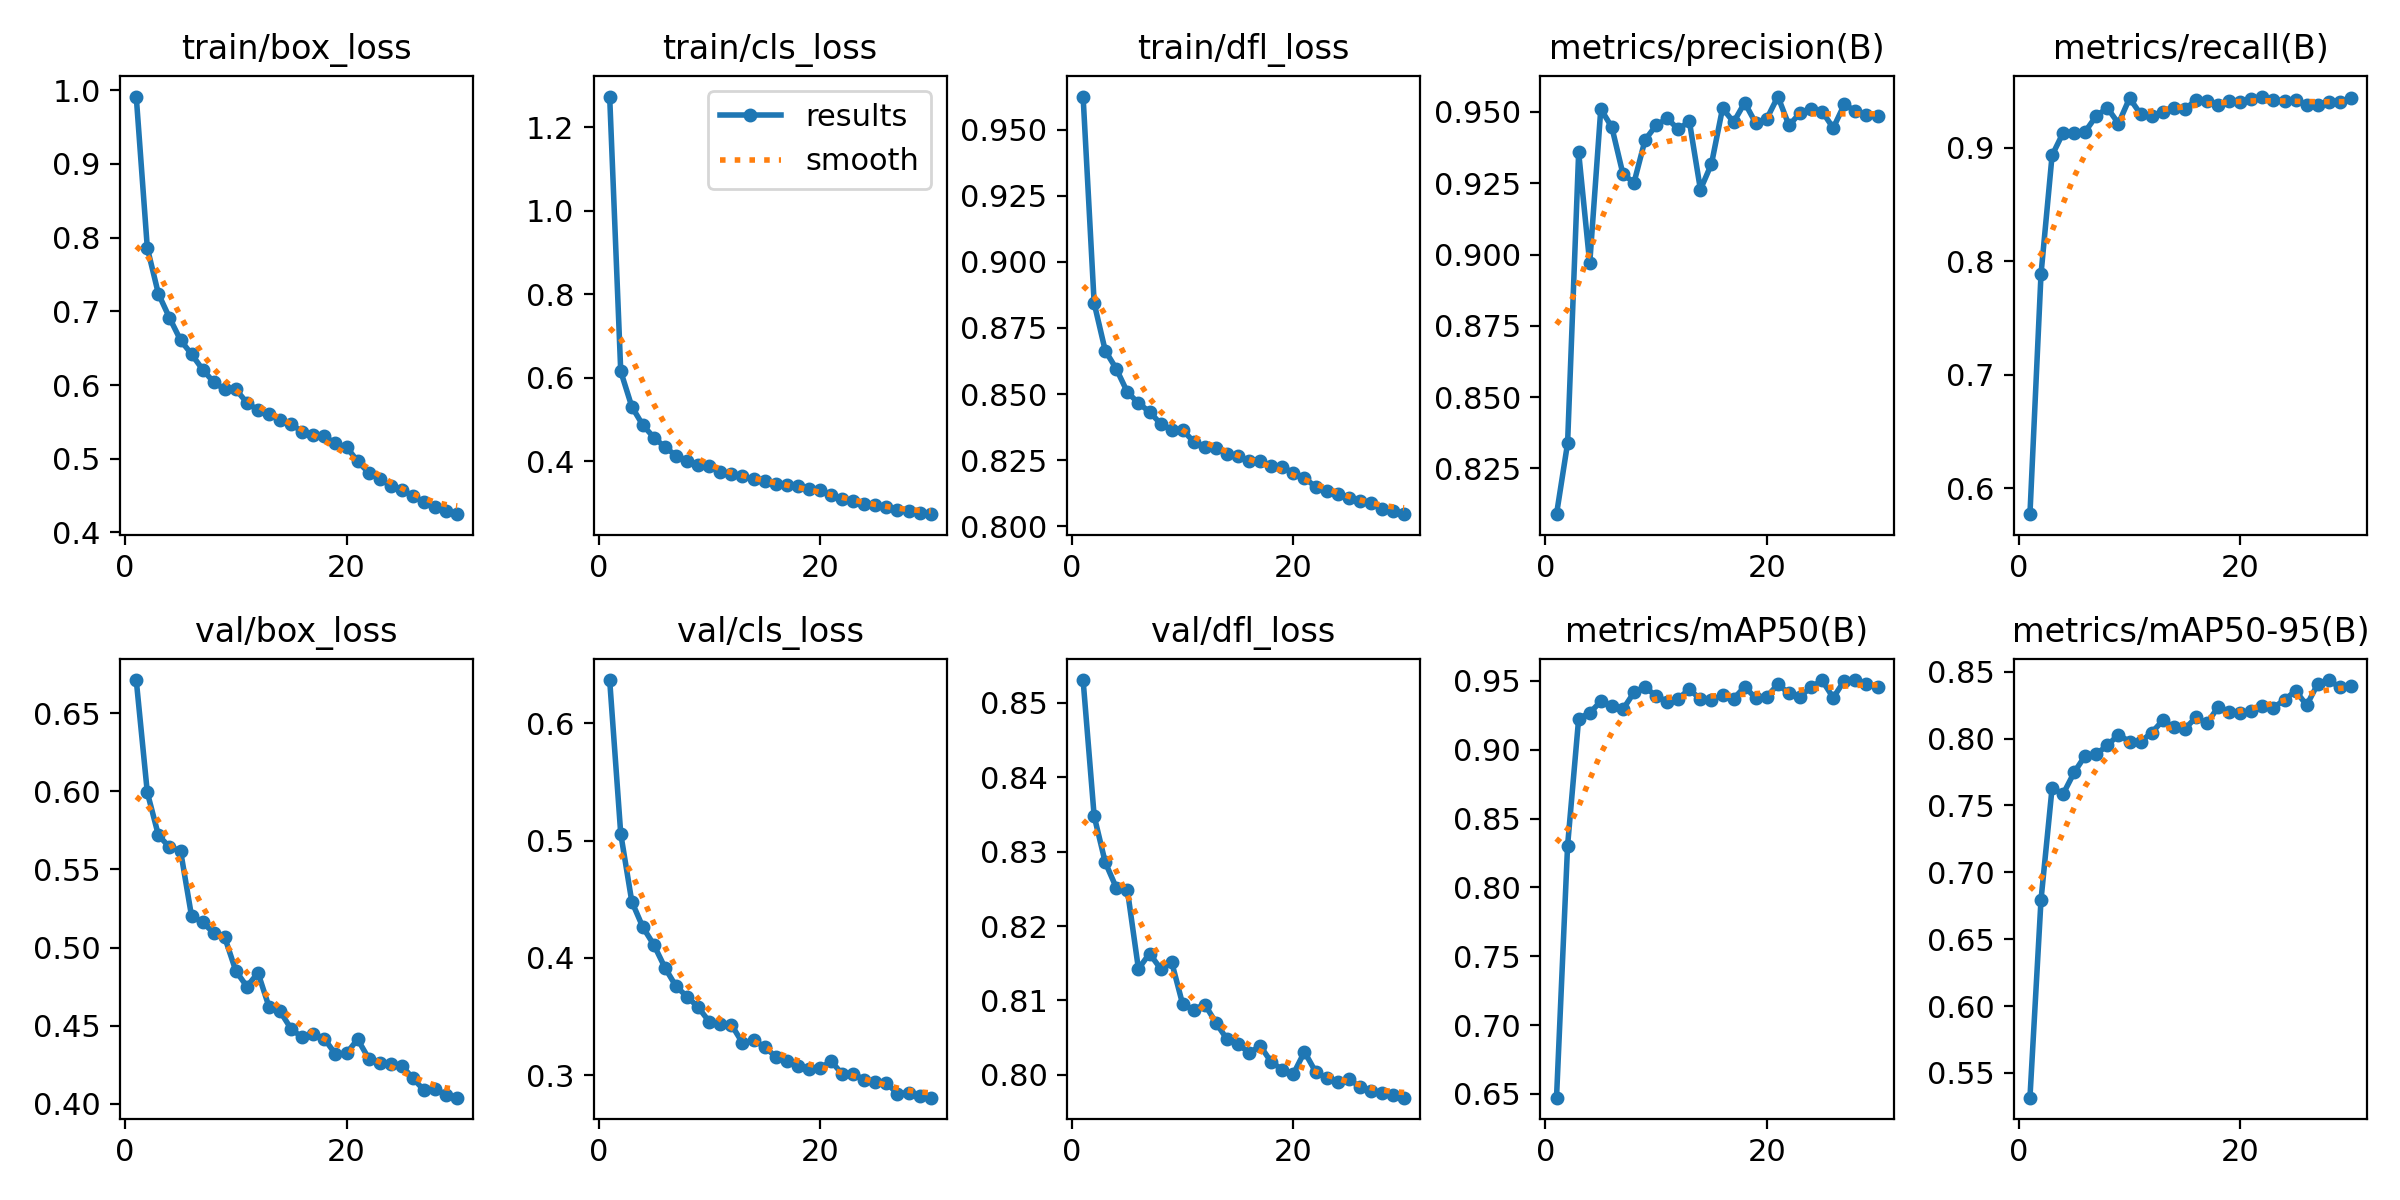

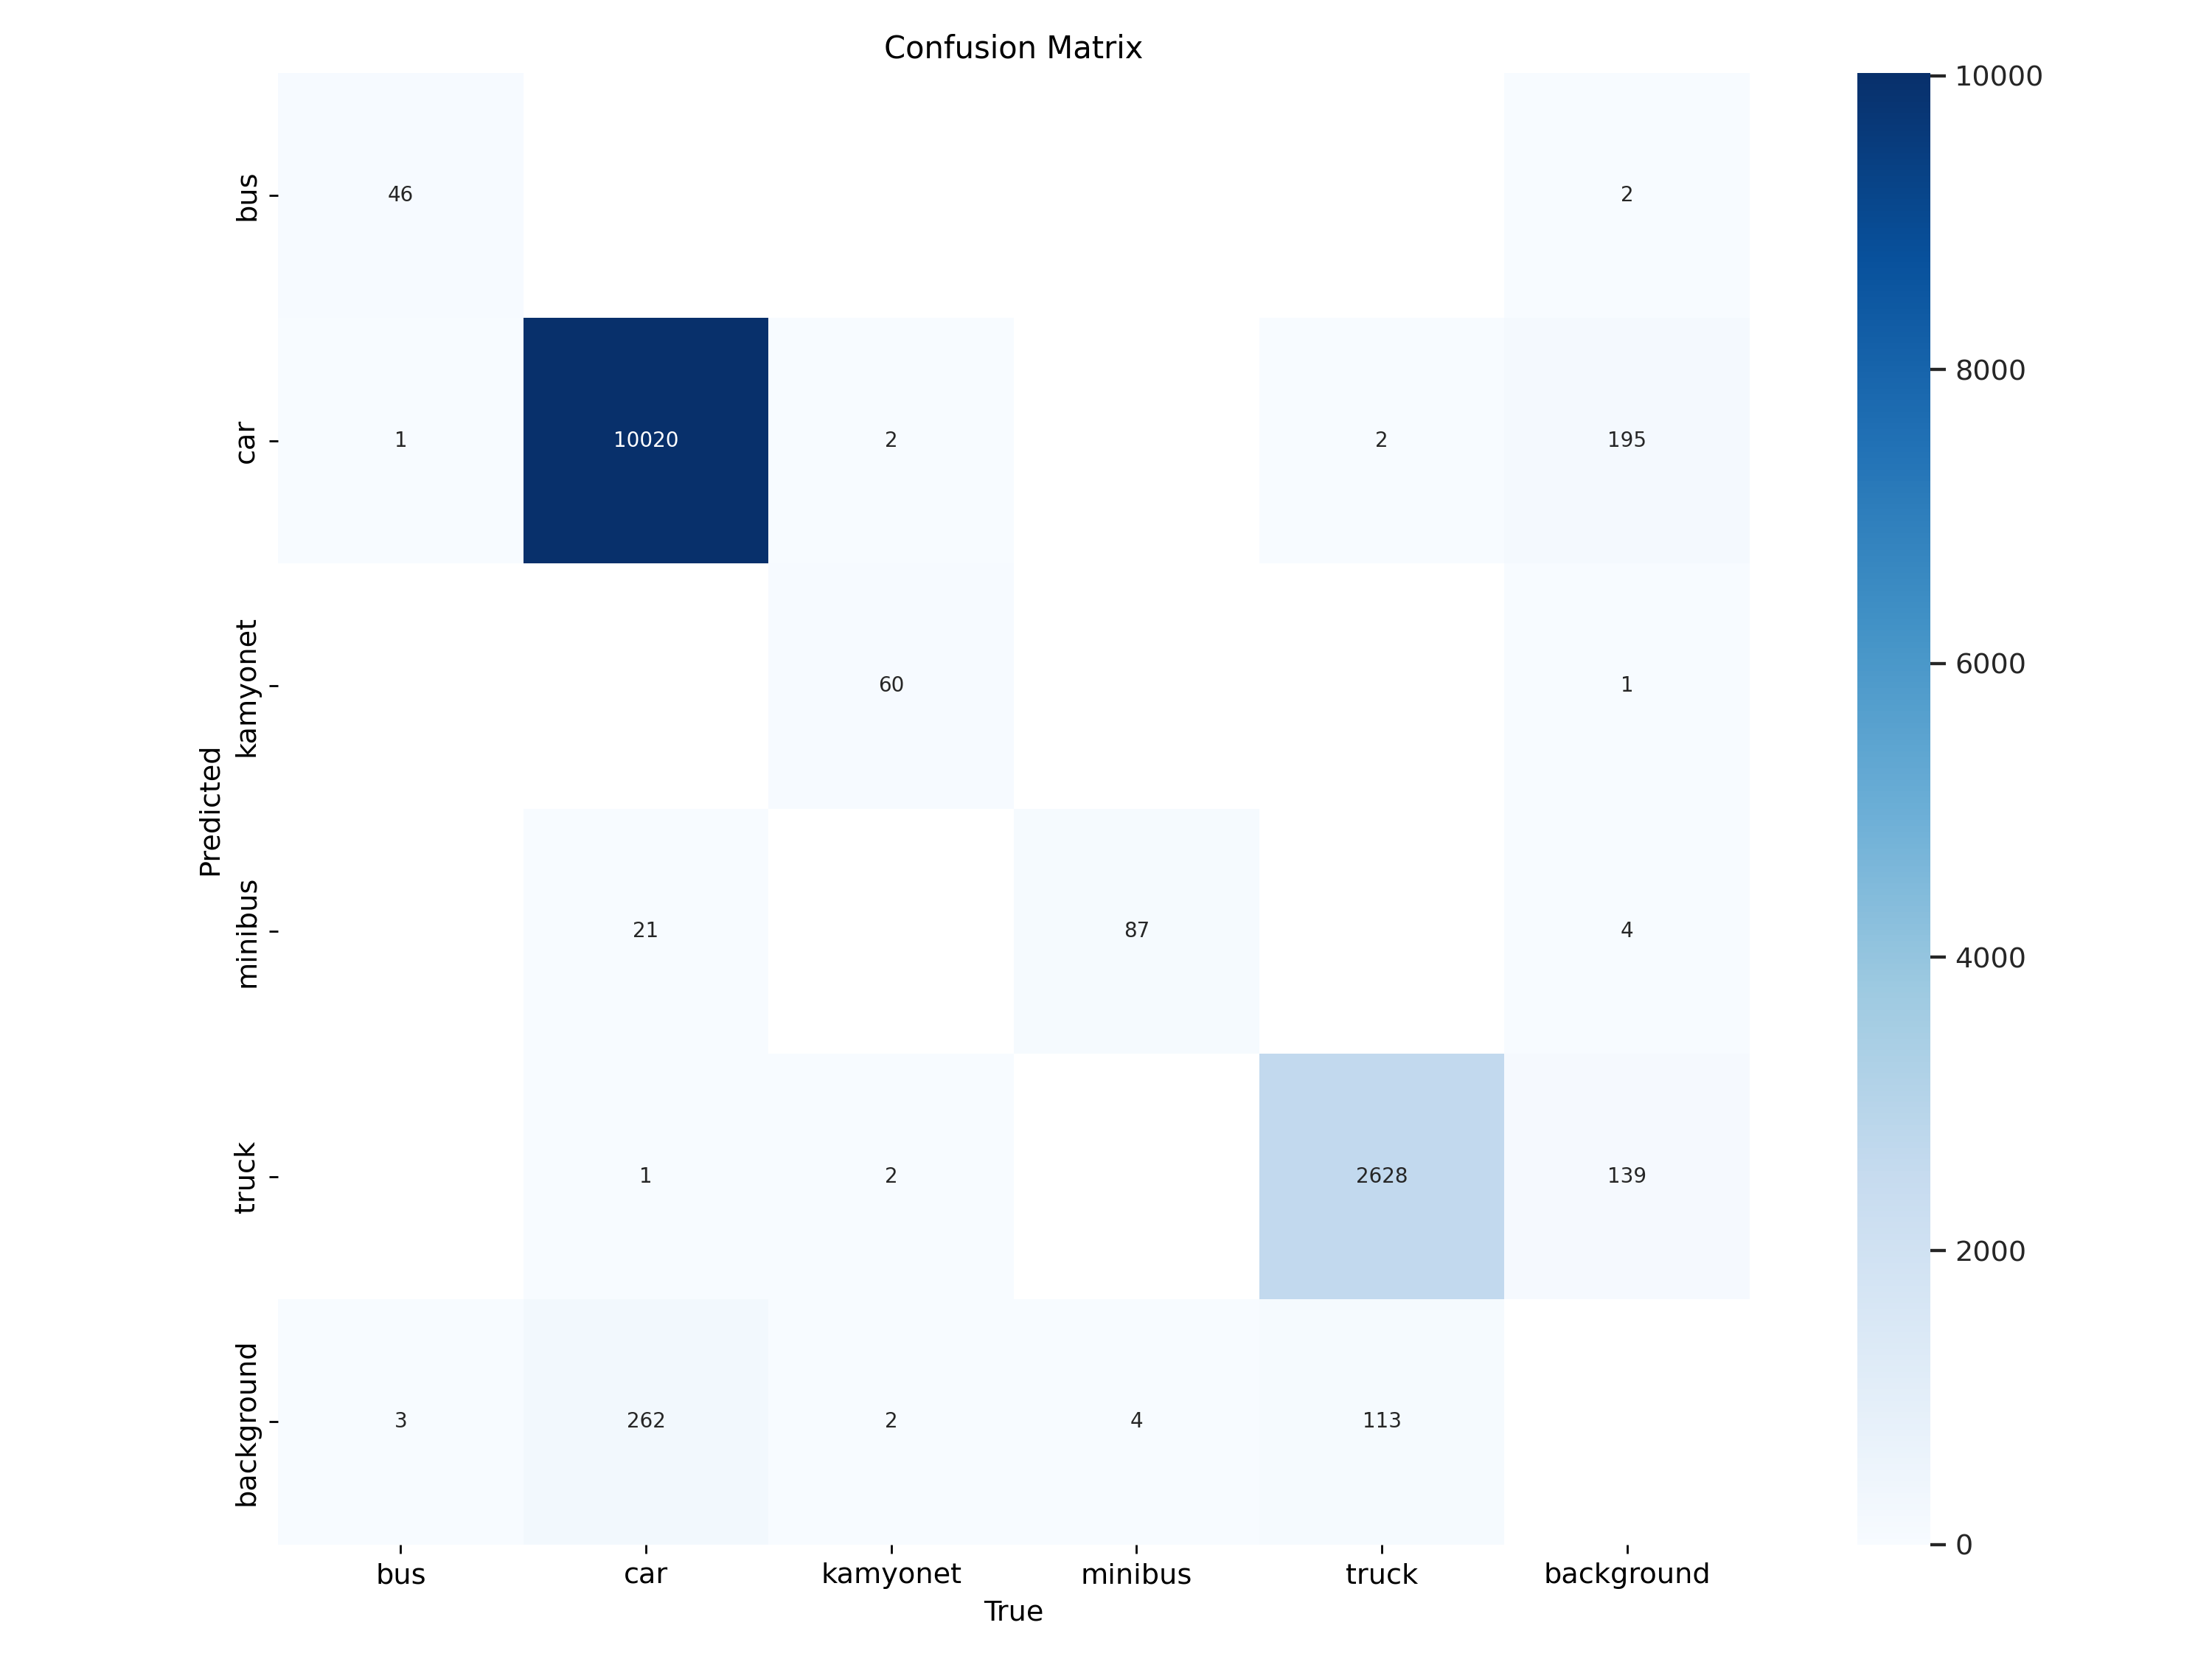

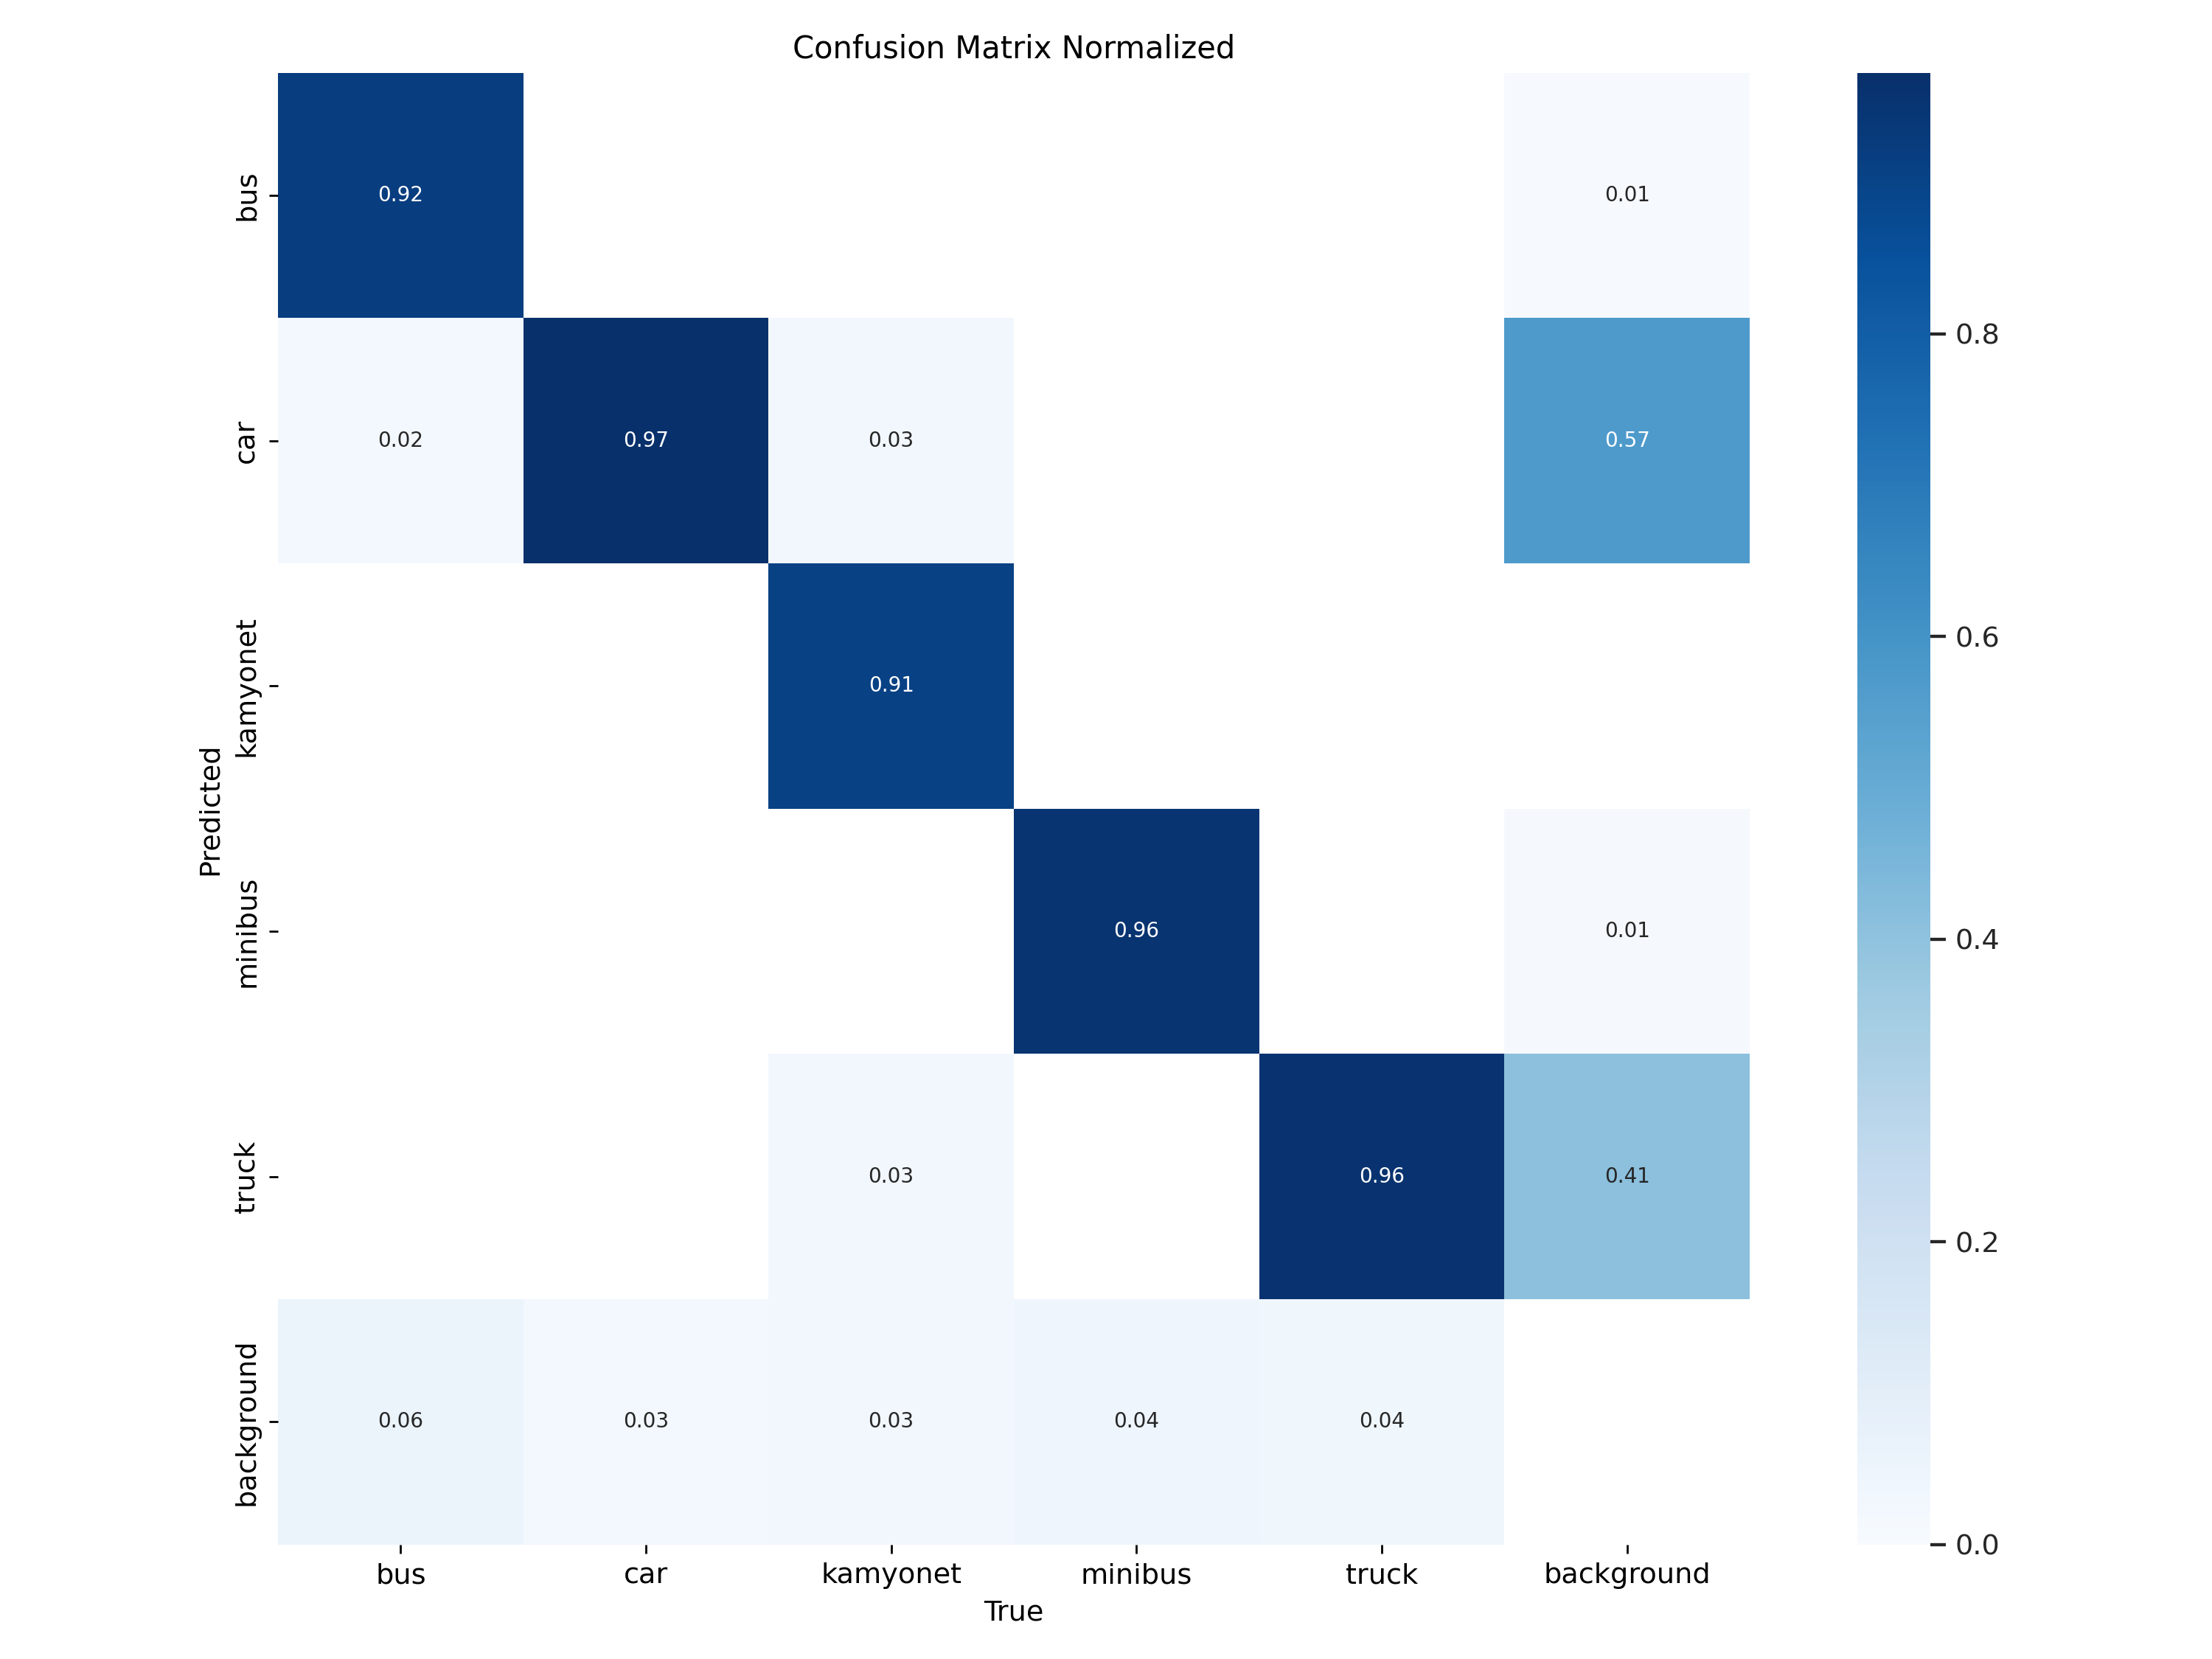

In [21]:
from PIL import Image
from IPython.display import display

display(Image.open("runs/nesne_sayimi/results.png"))
display(Image.open("runs/nesne_sayimi/confusion_matrix.png"))
display(Image.open("runs/nesne_sayimi/confusion_matrix_normalized.png"))


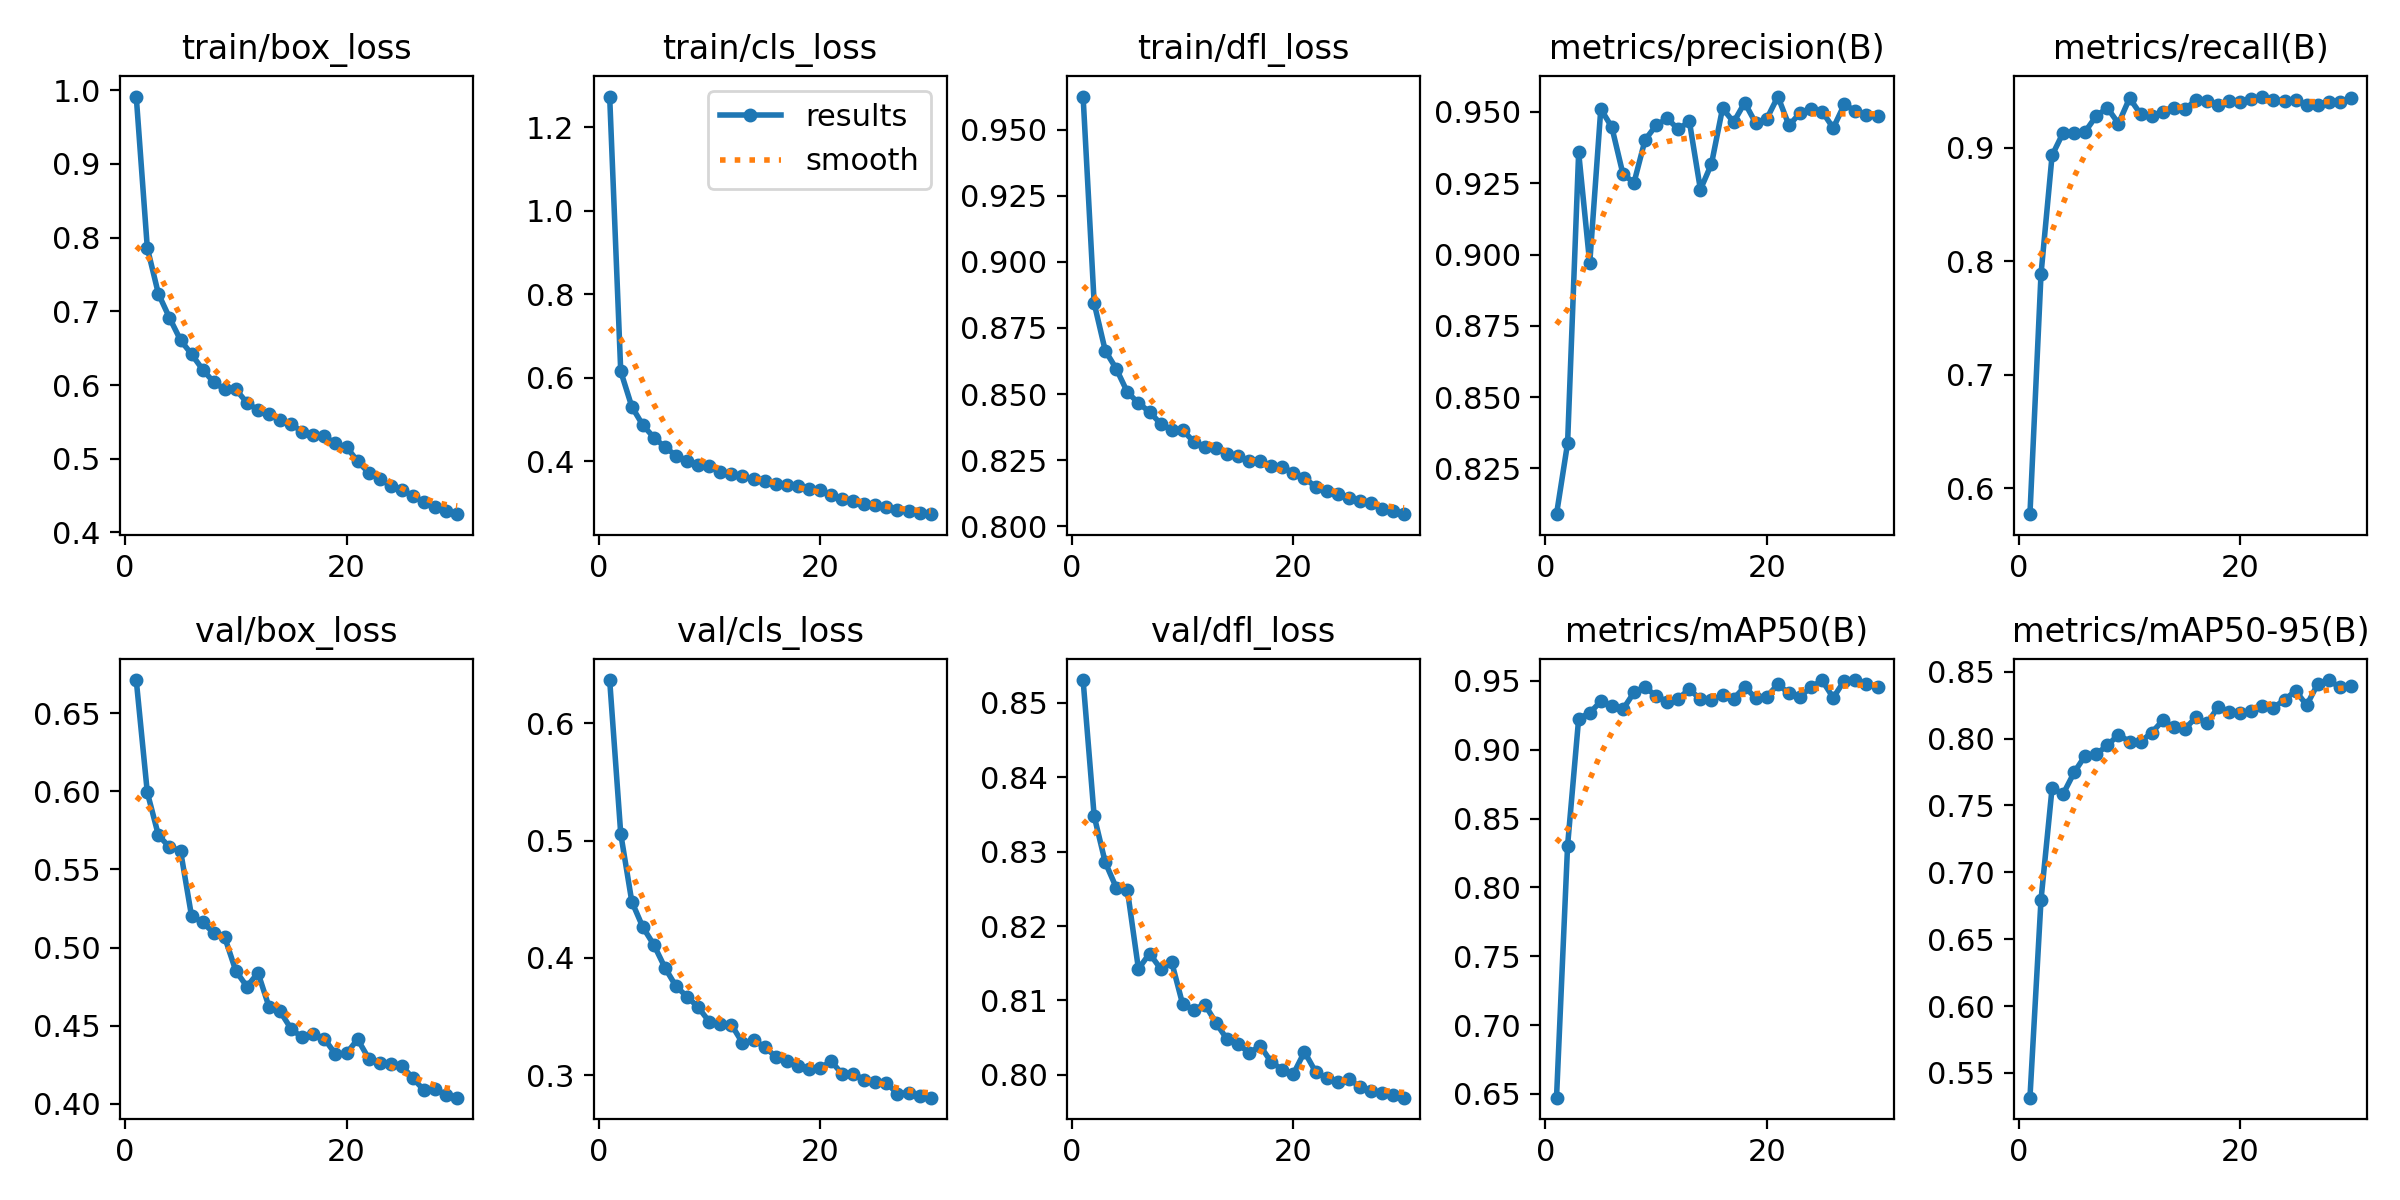

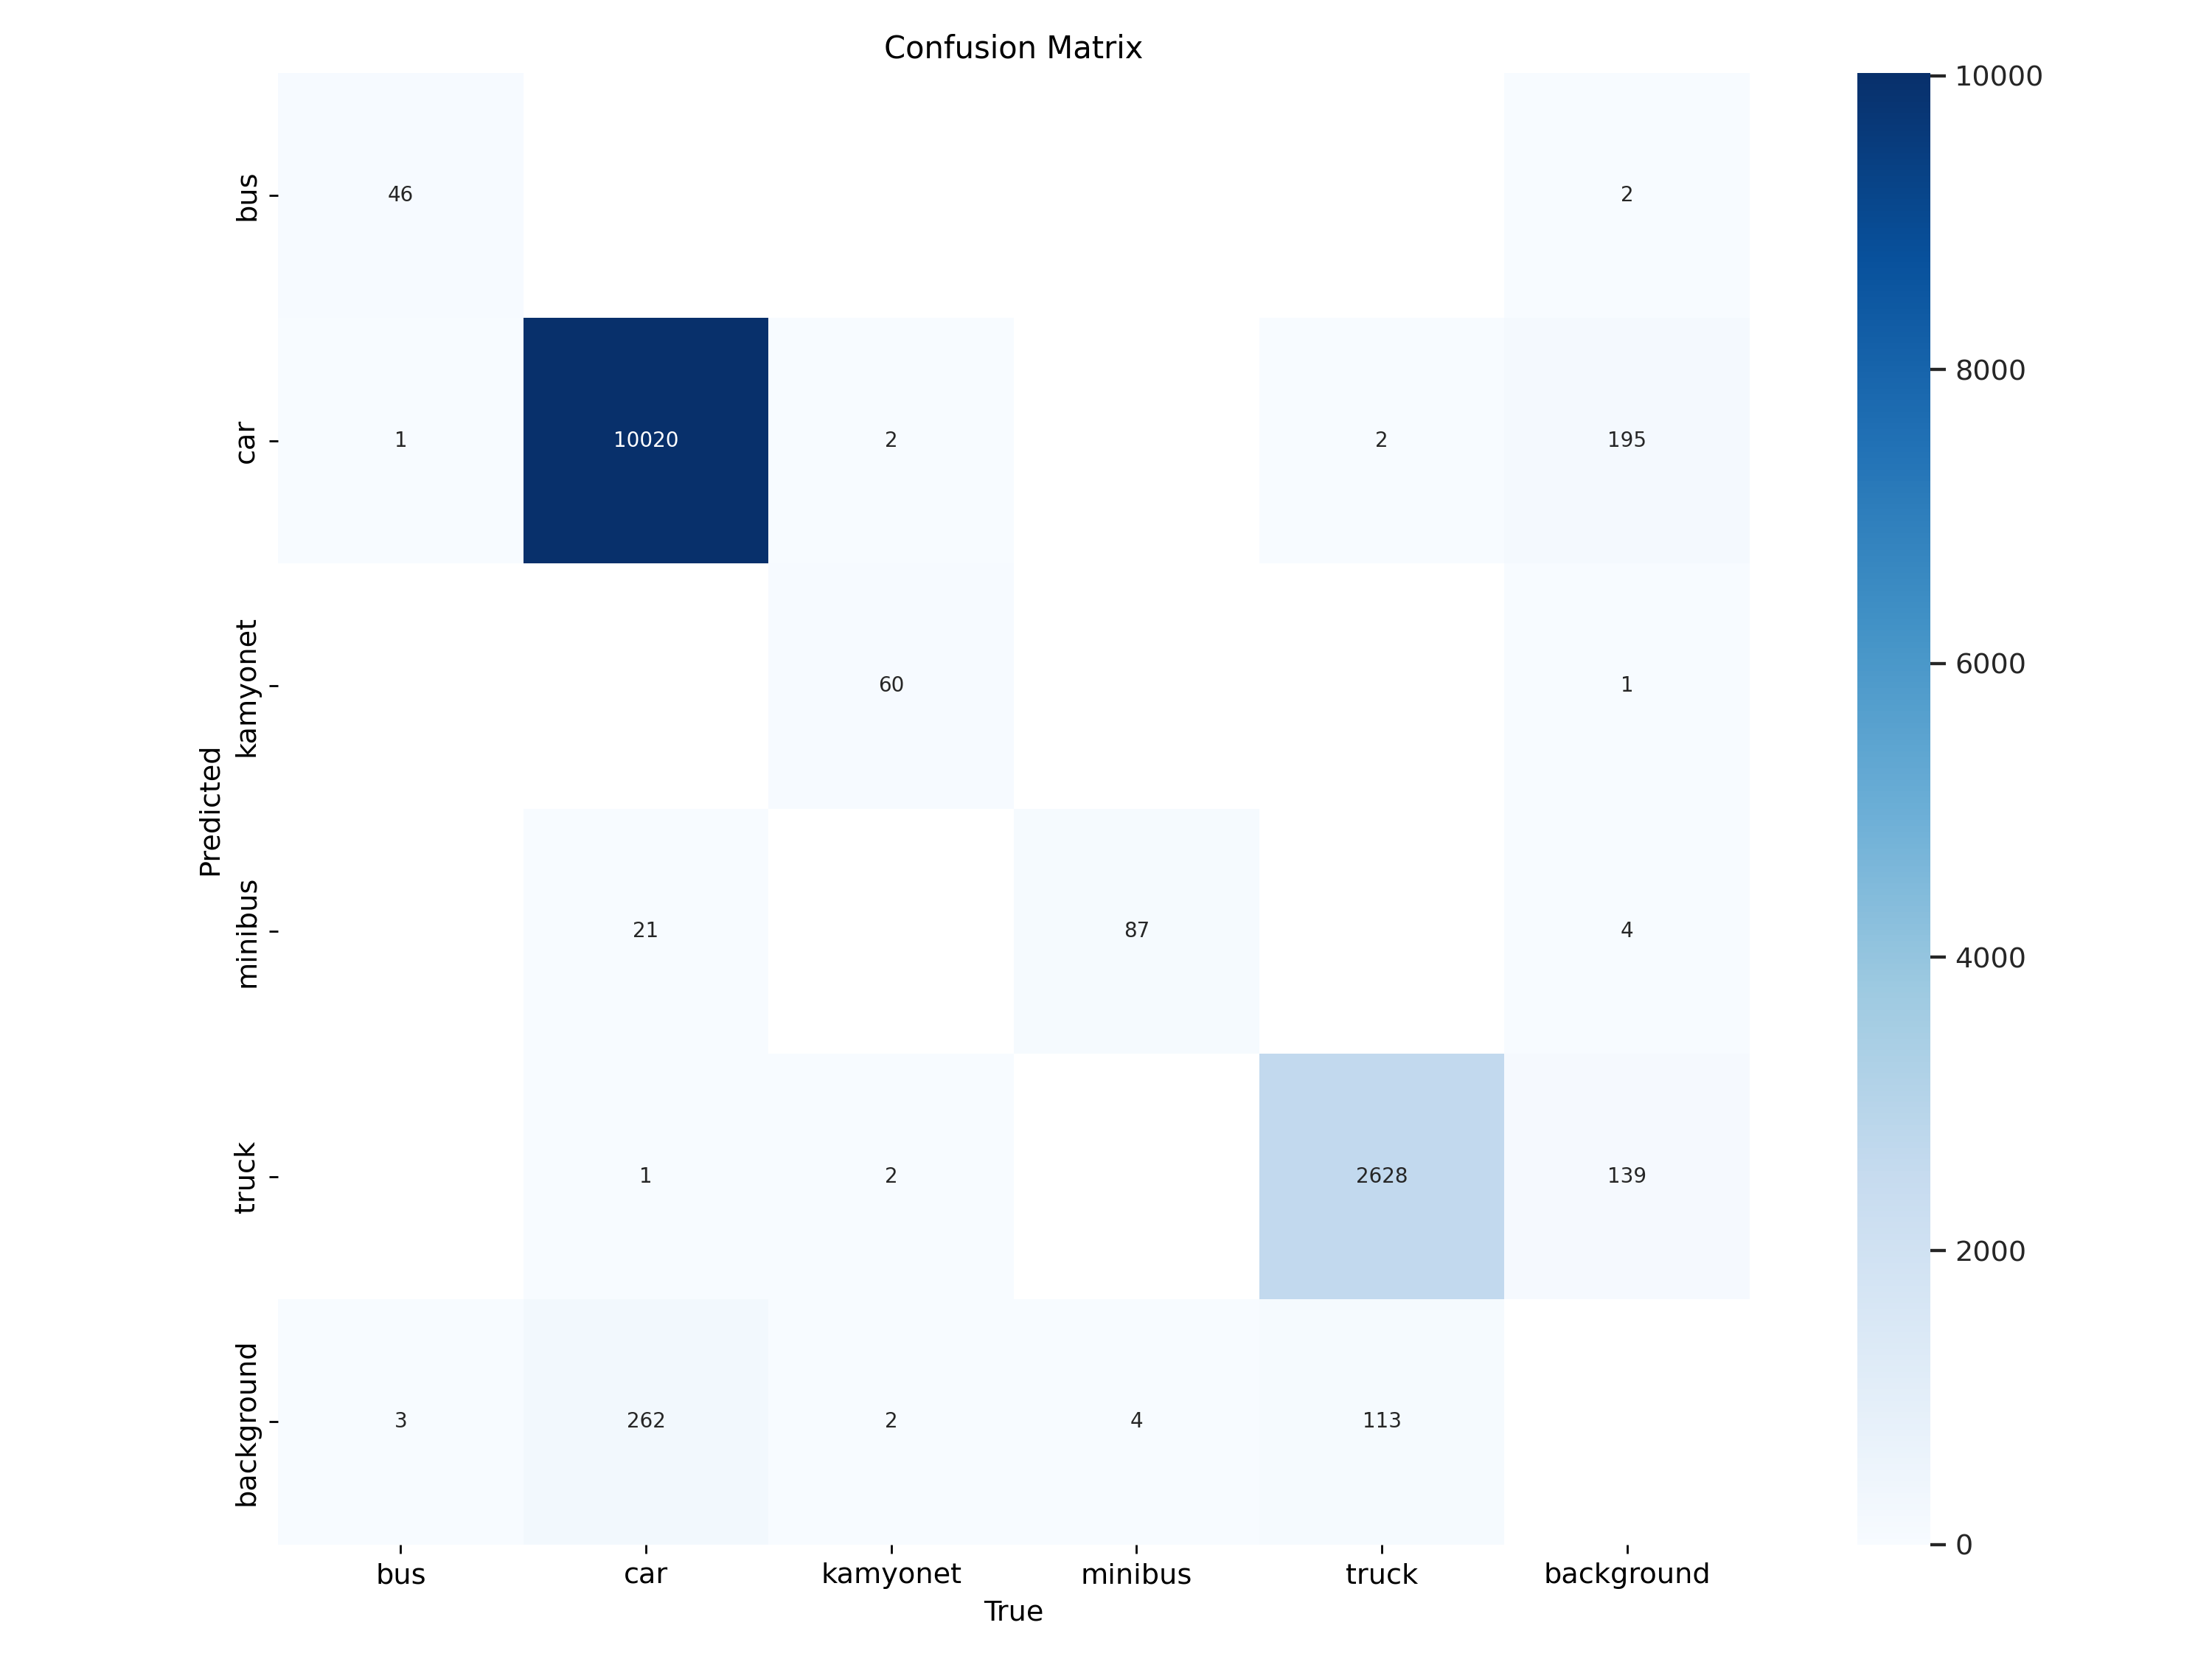

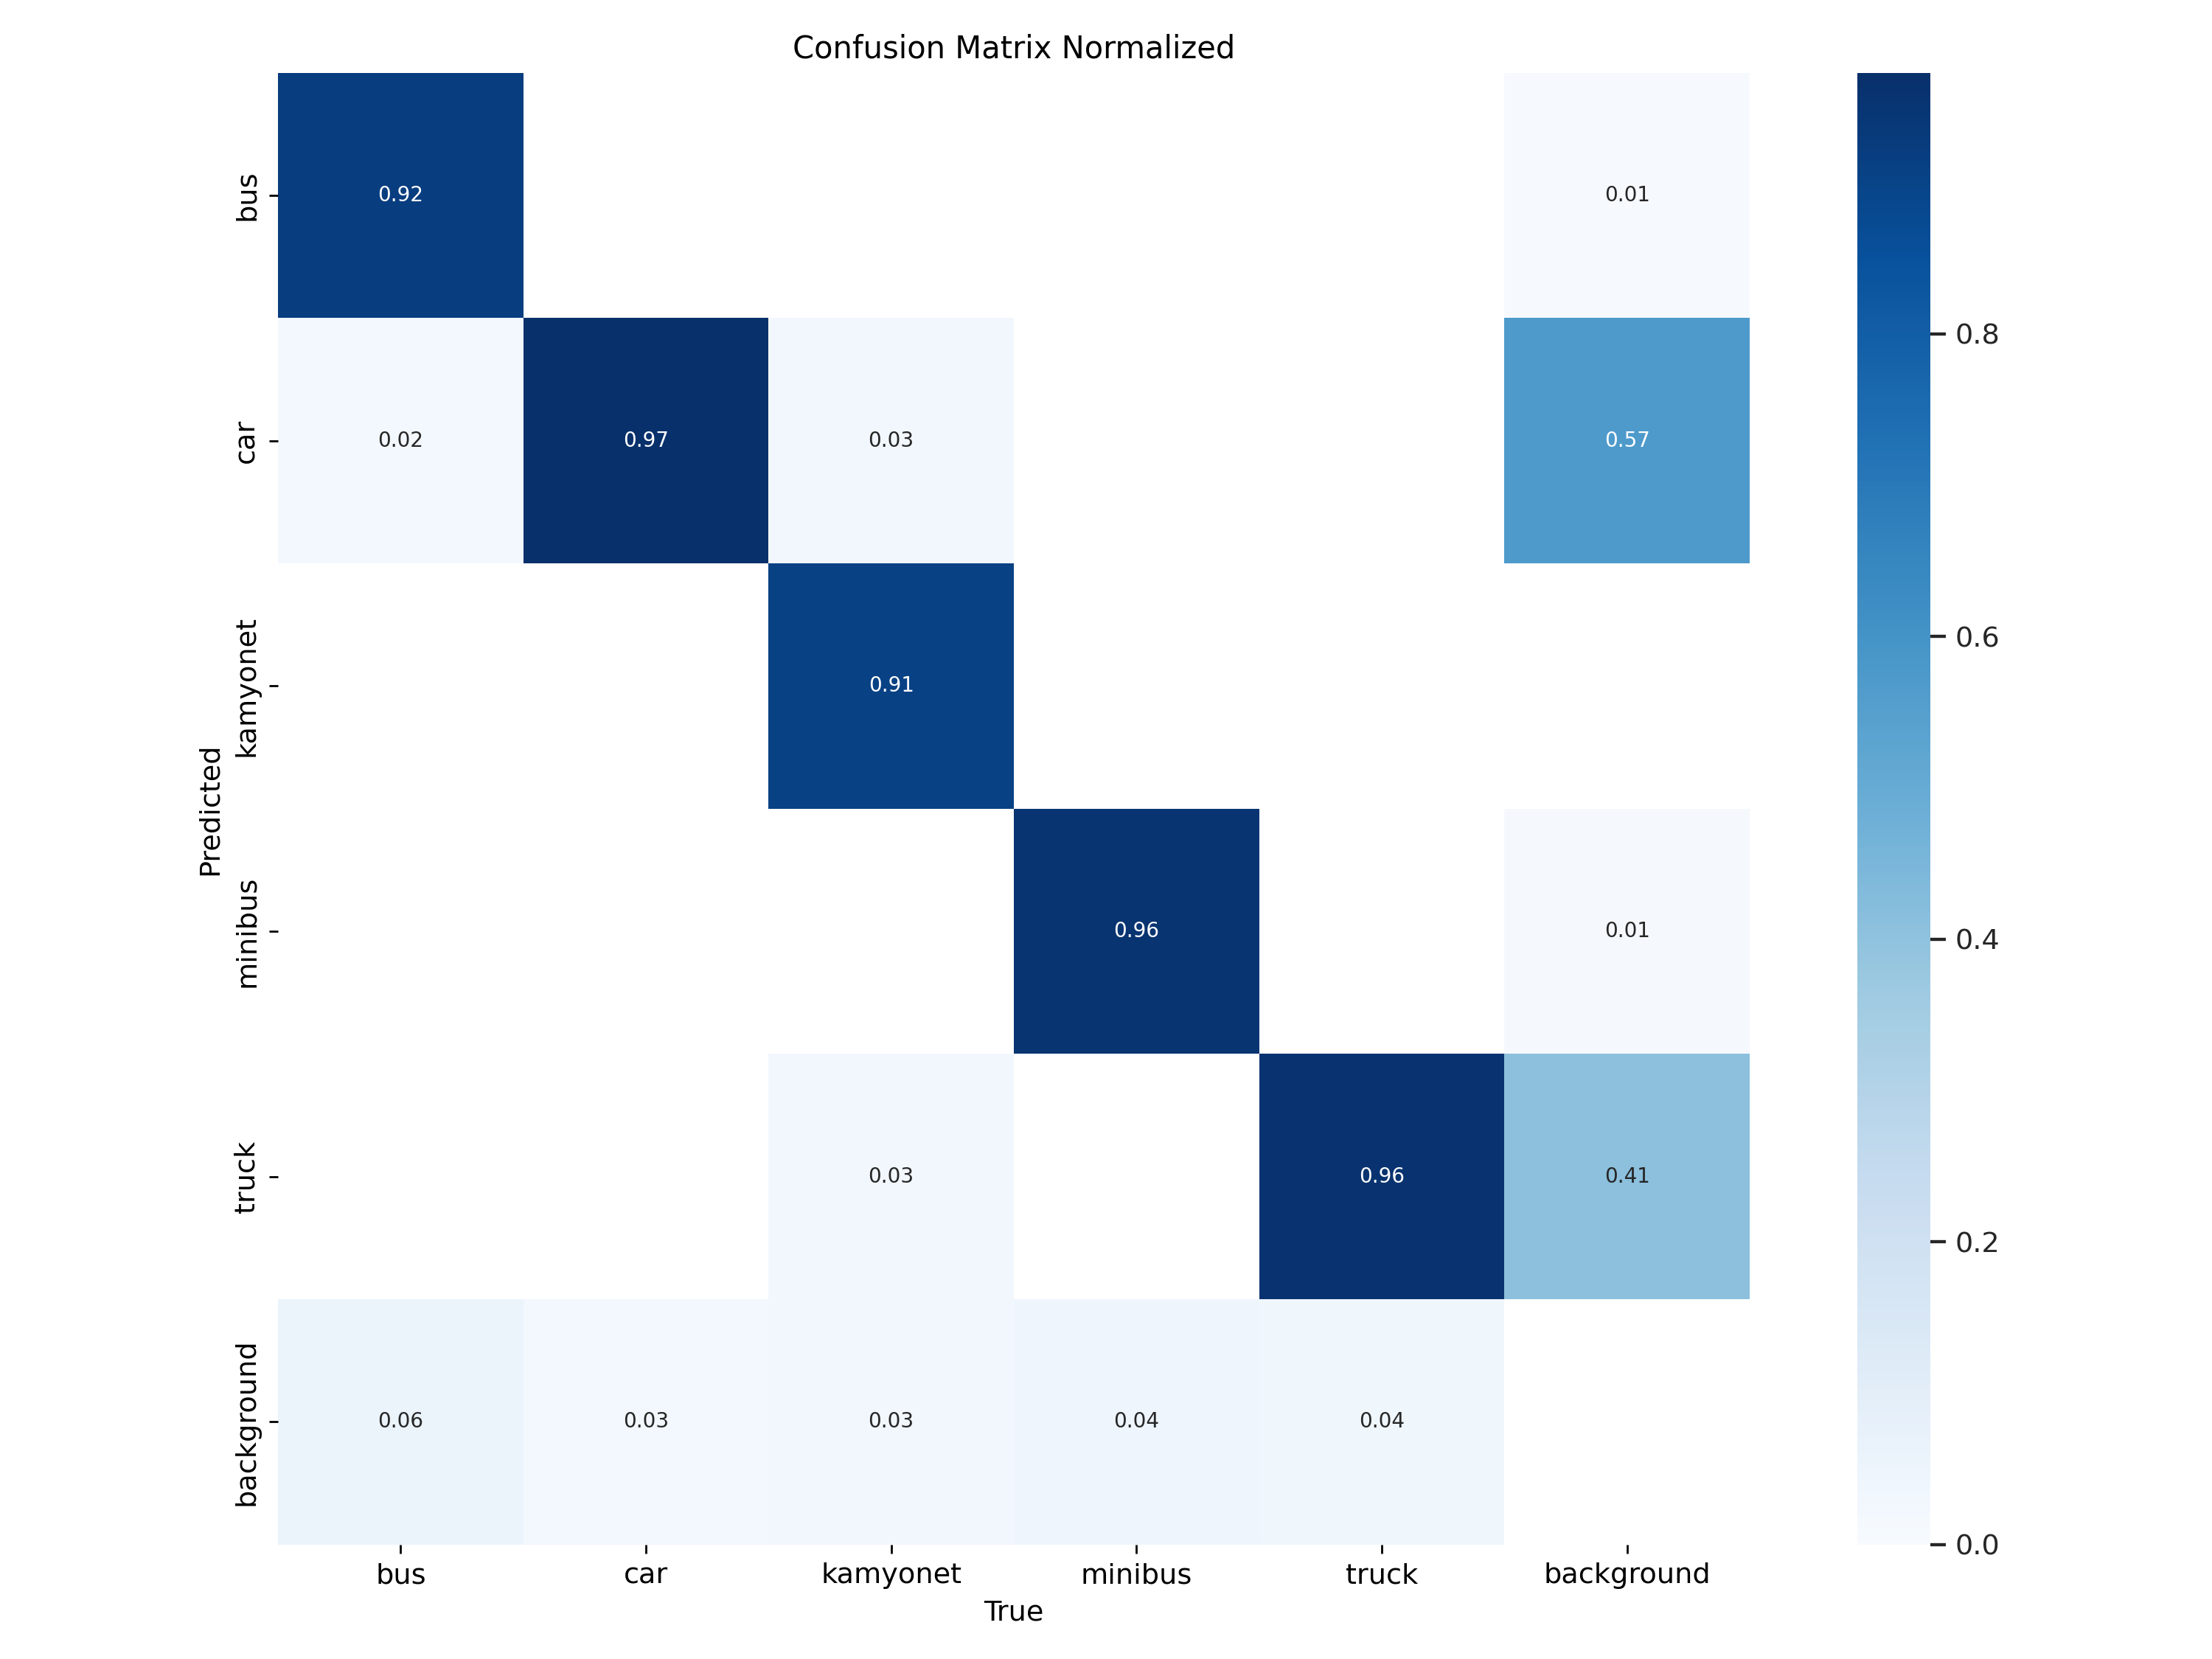

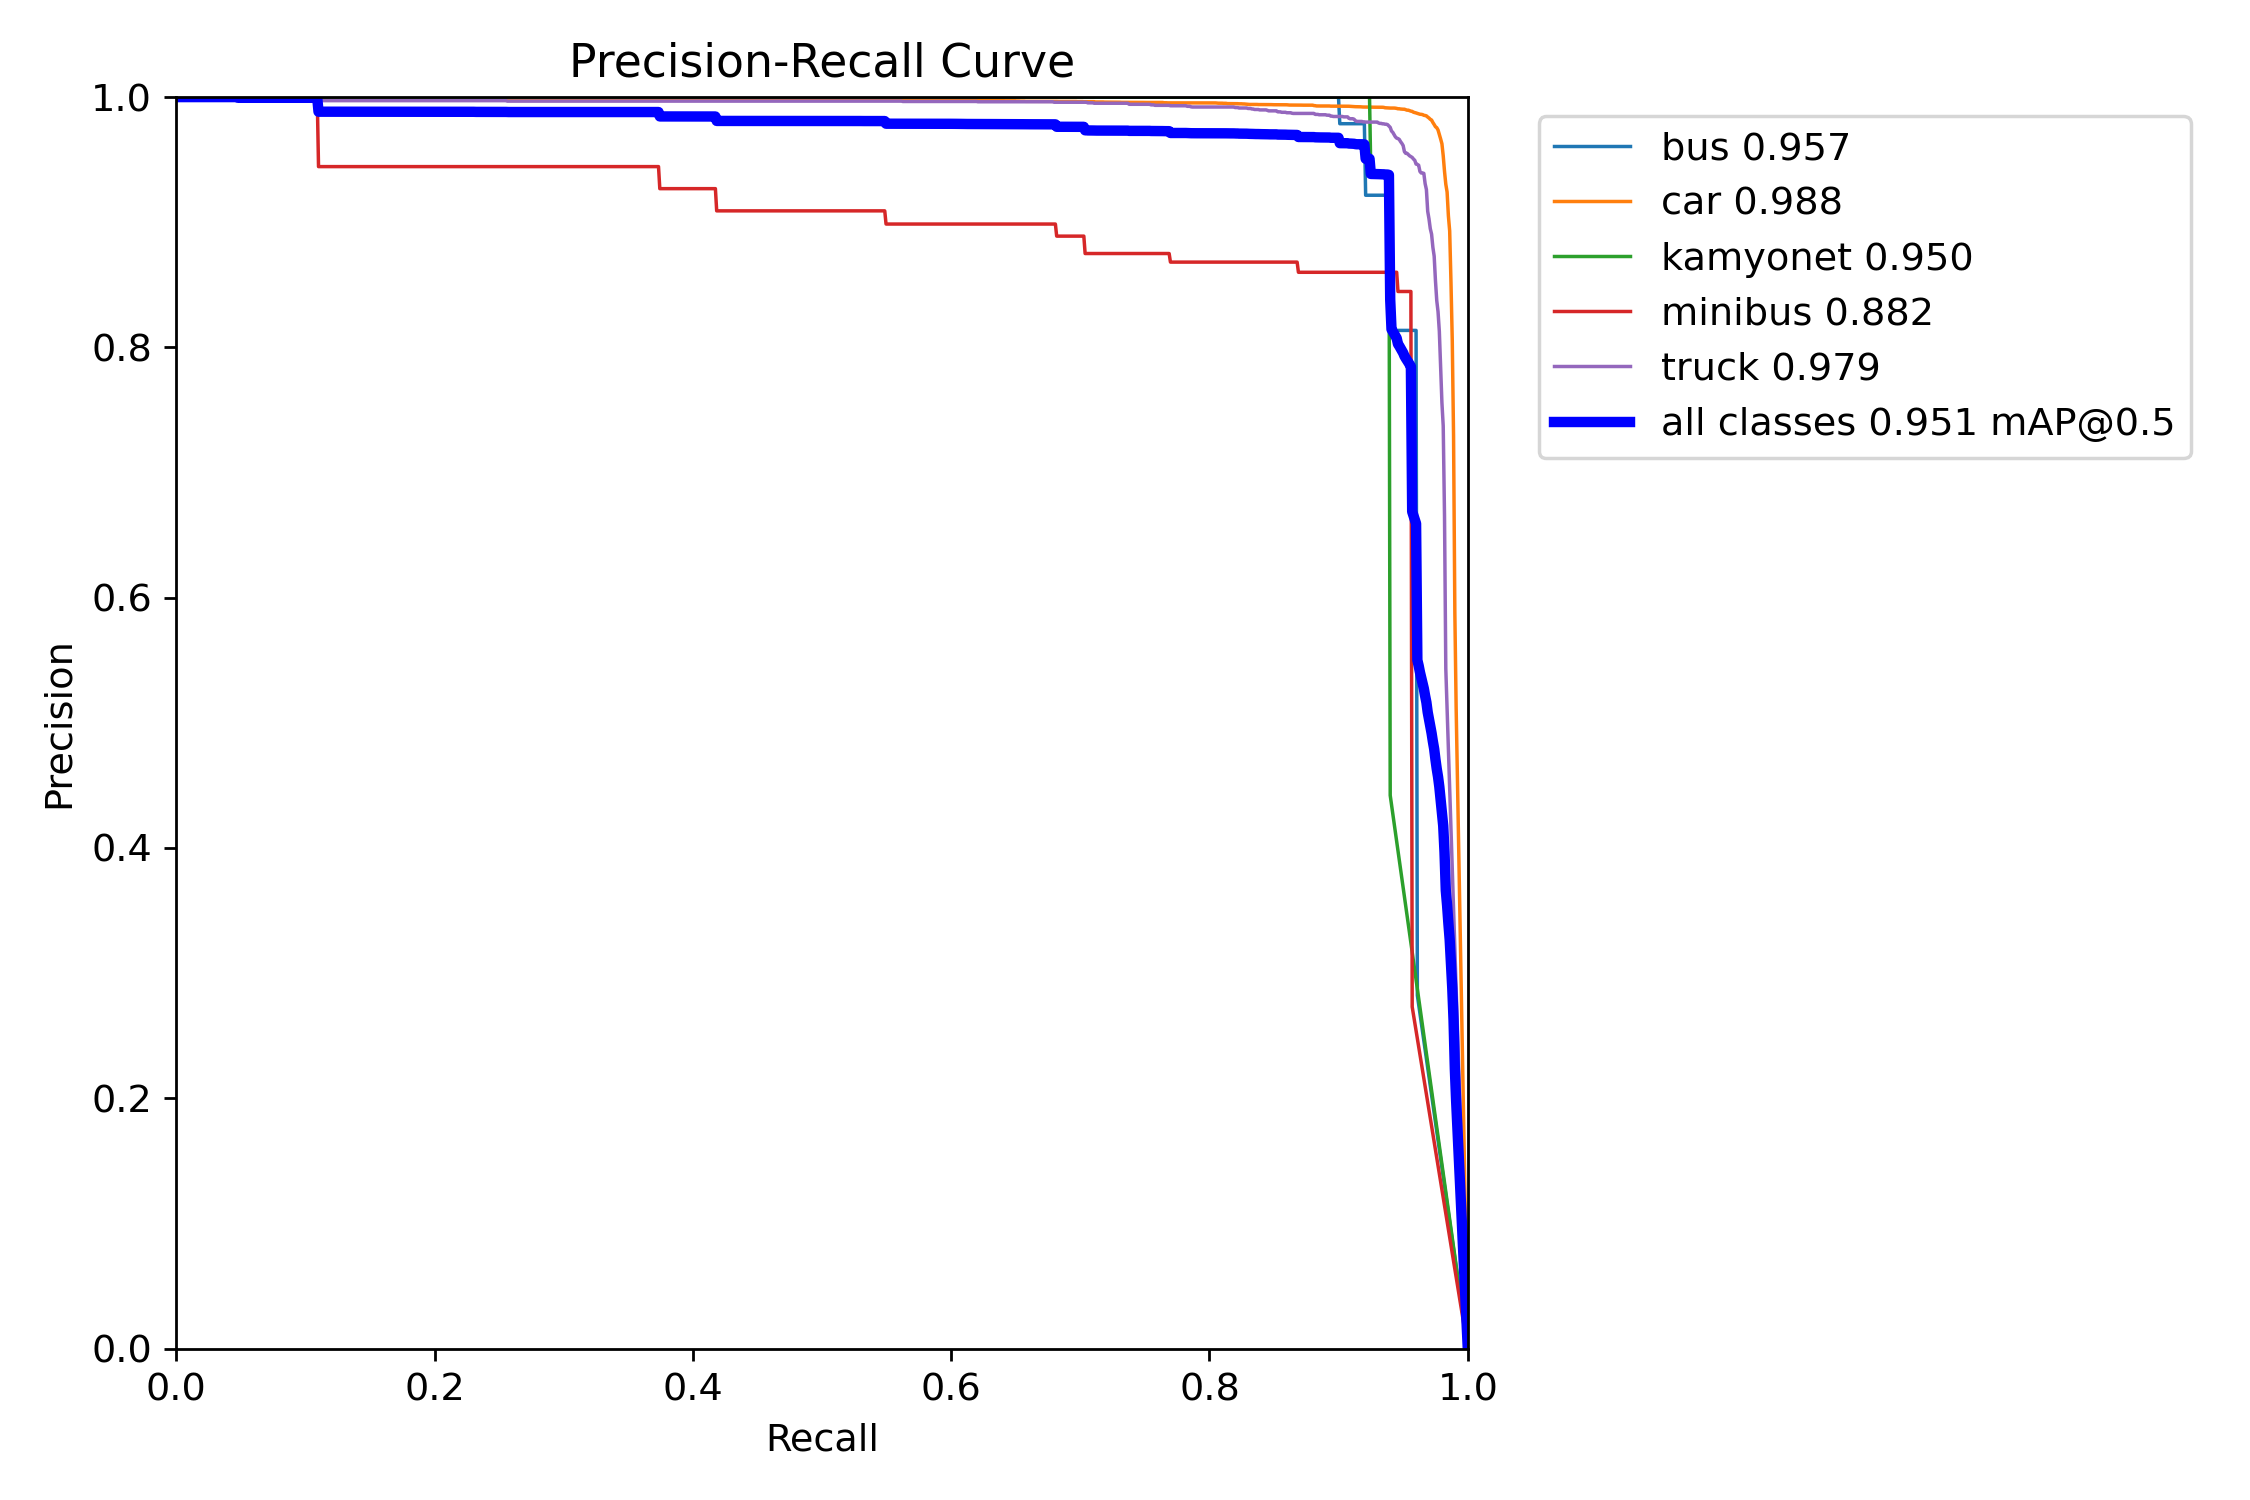

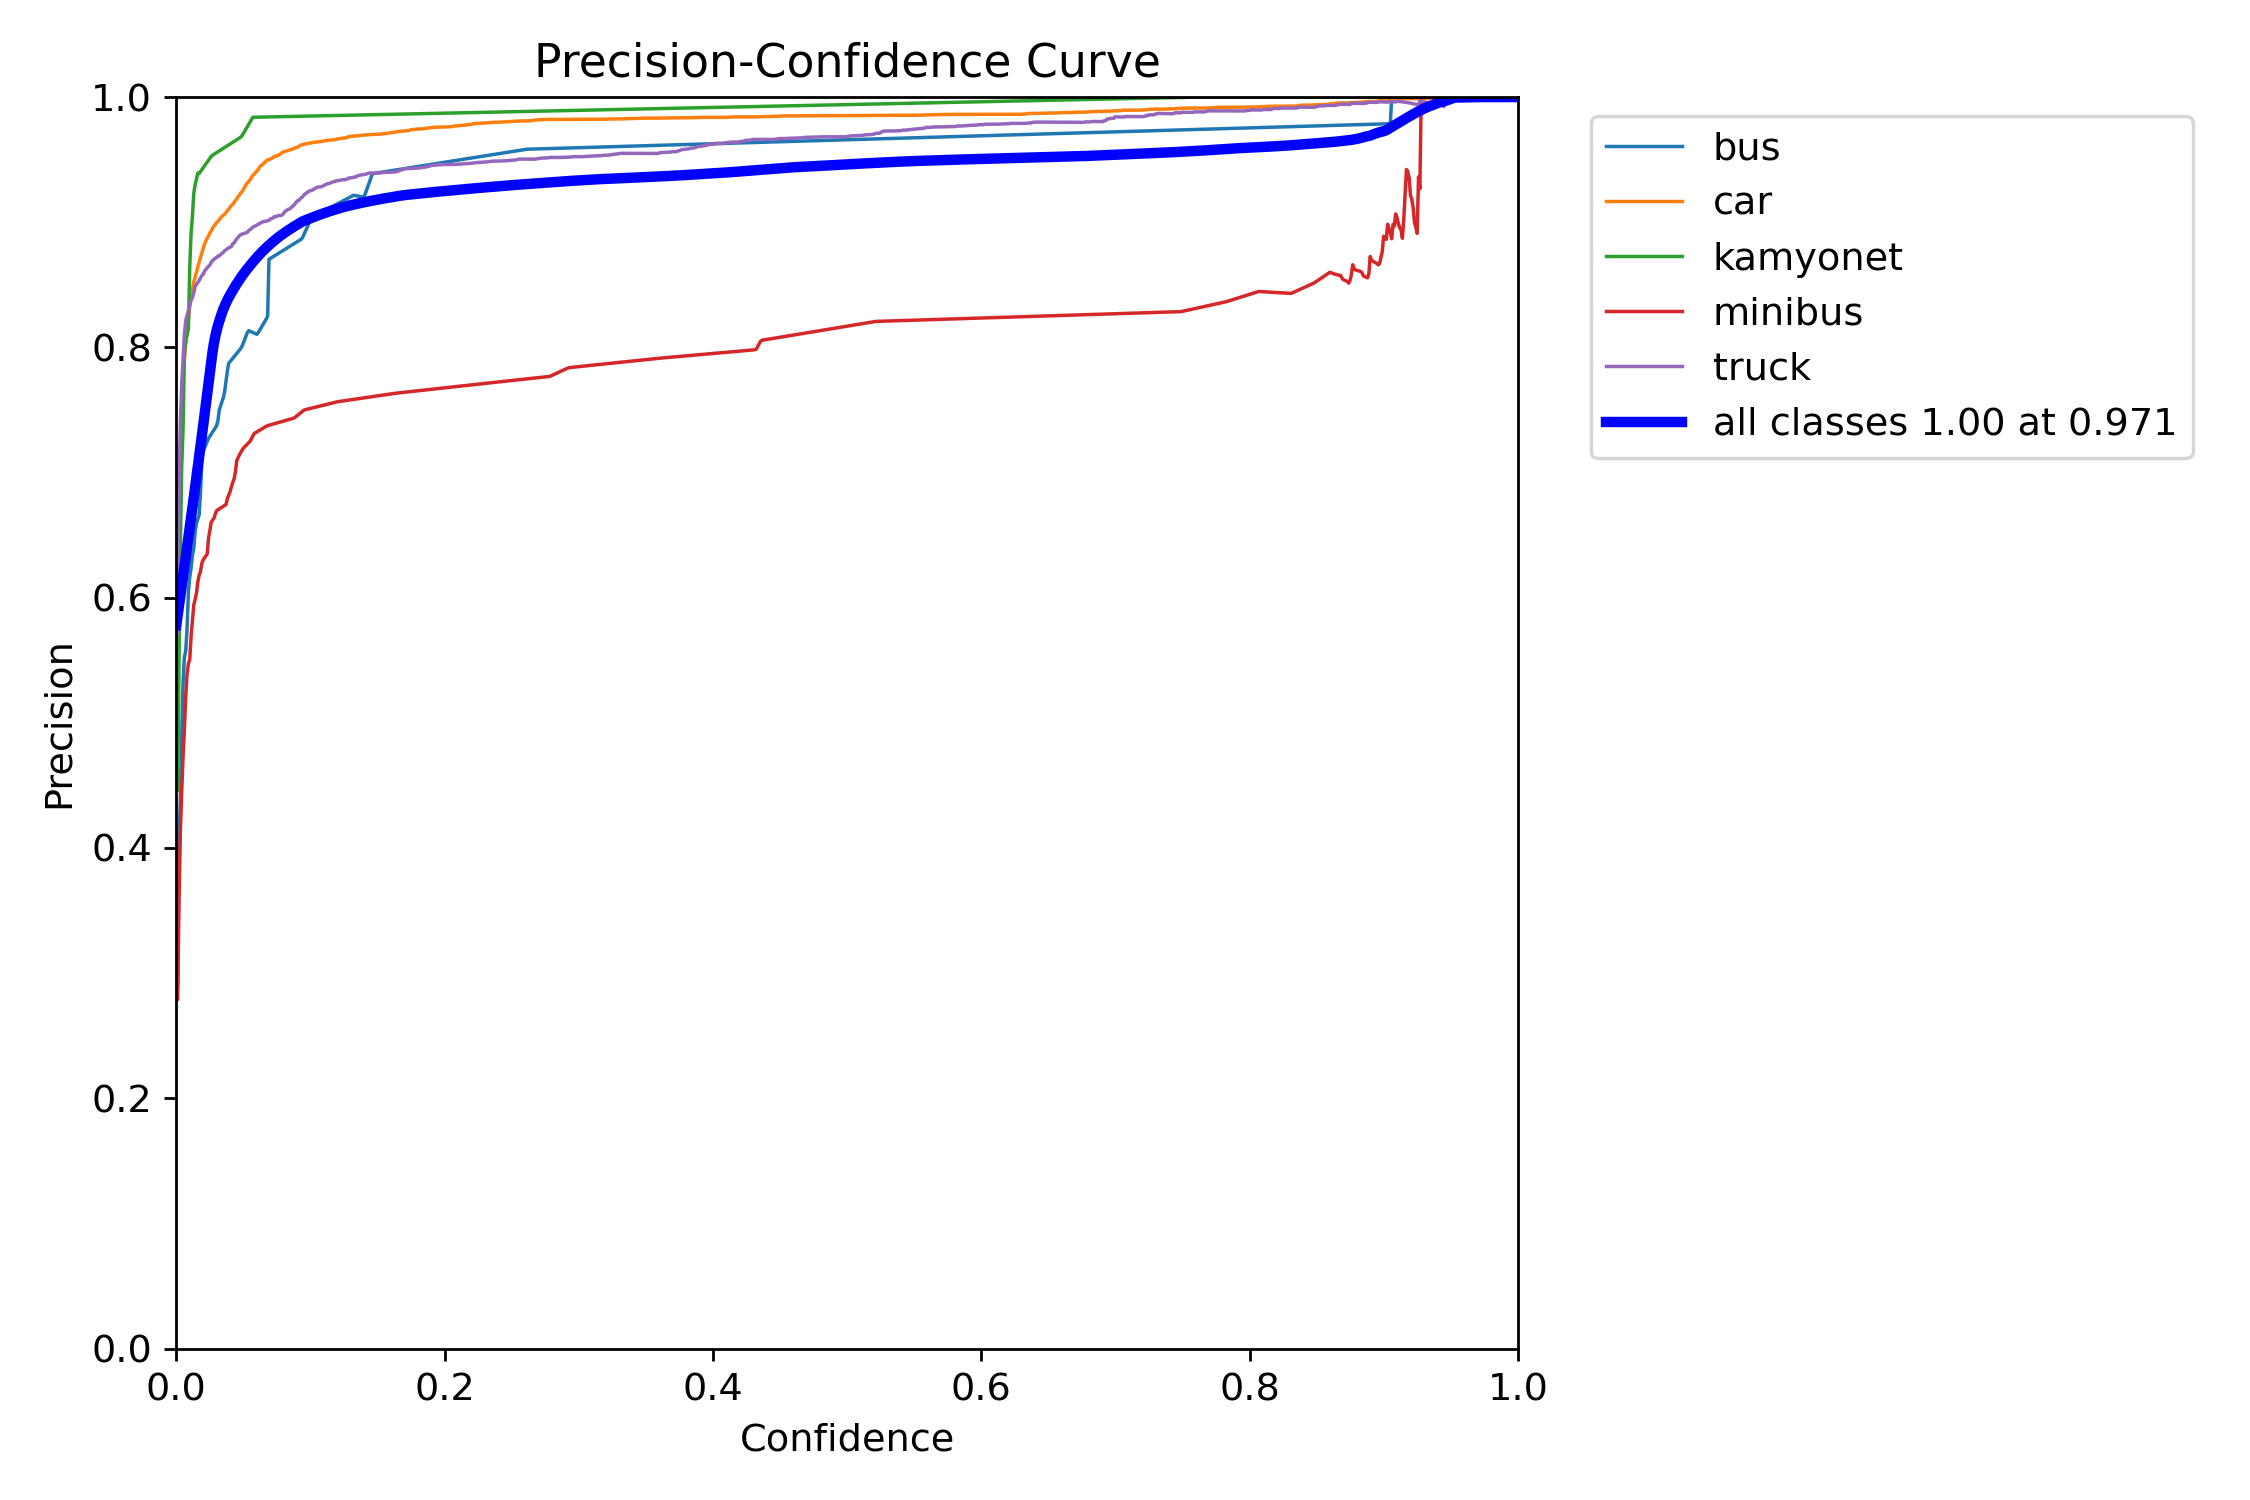

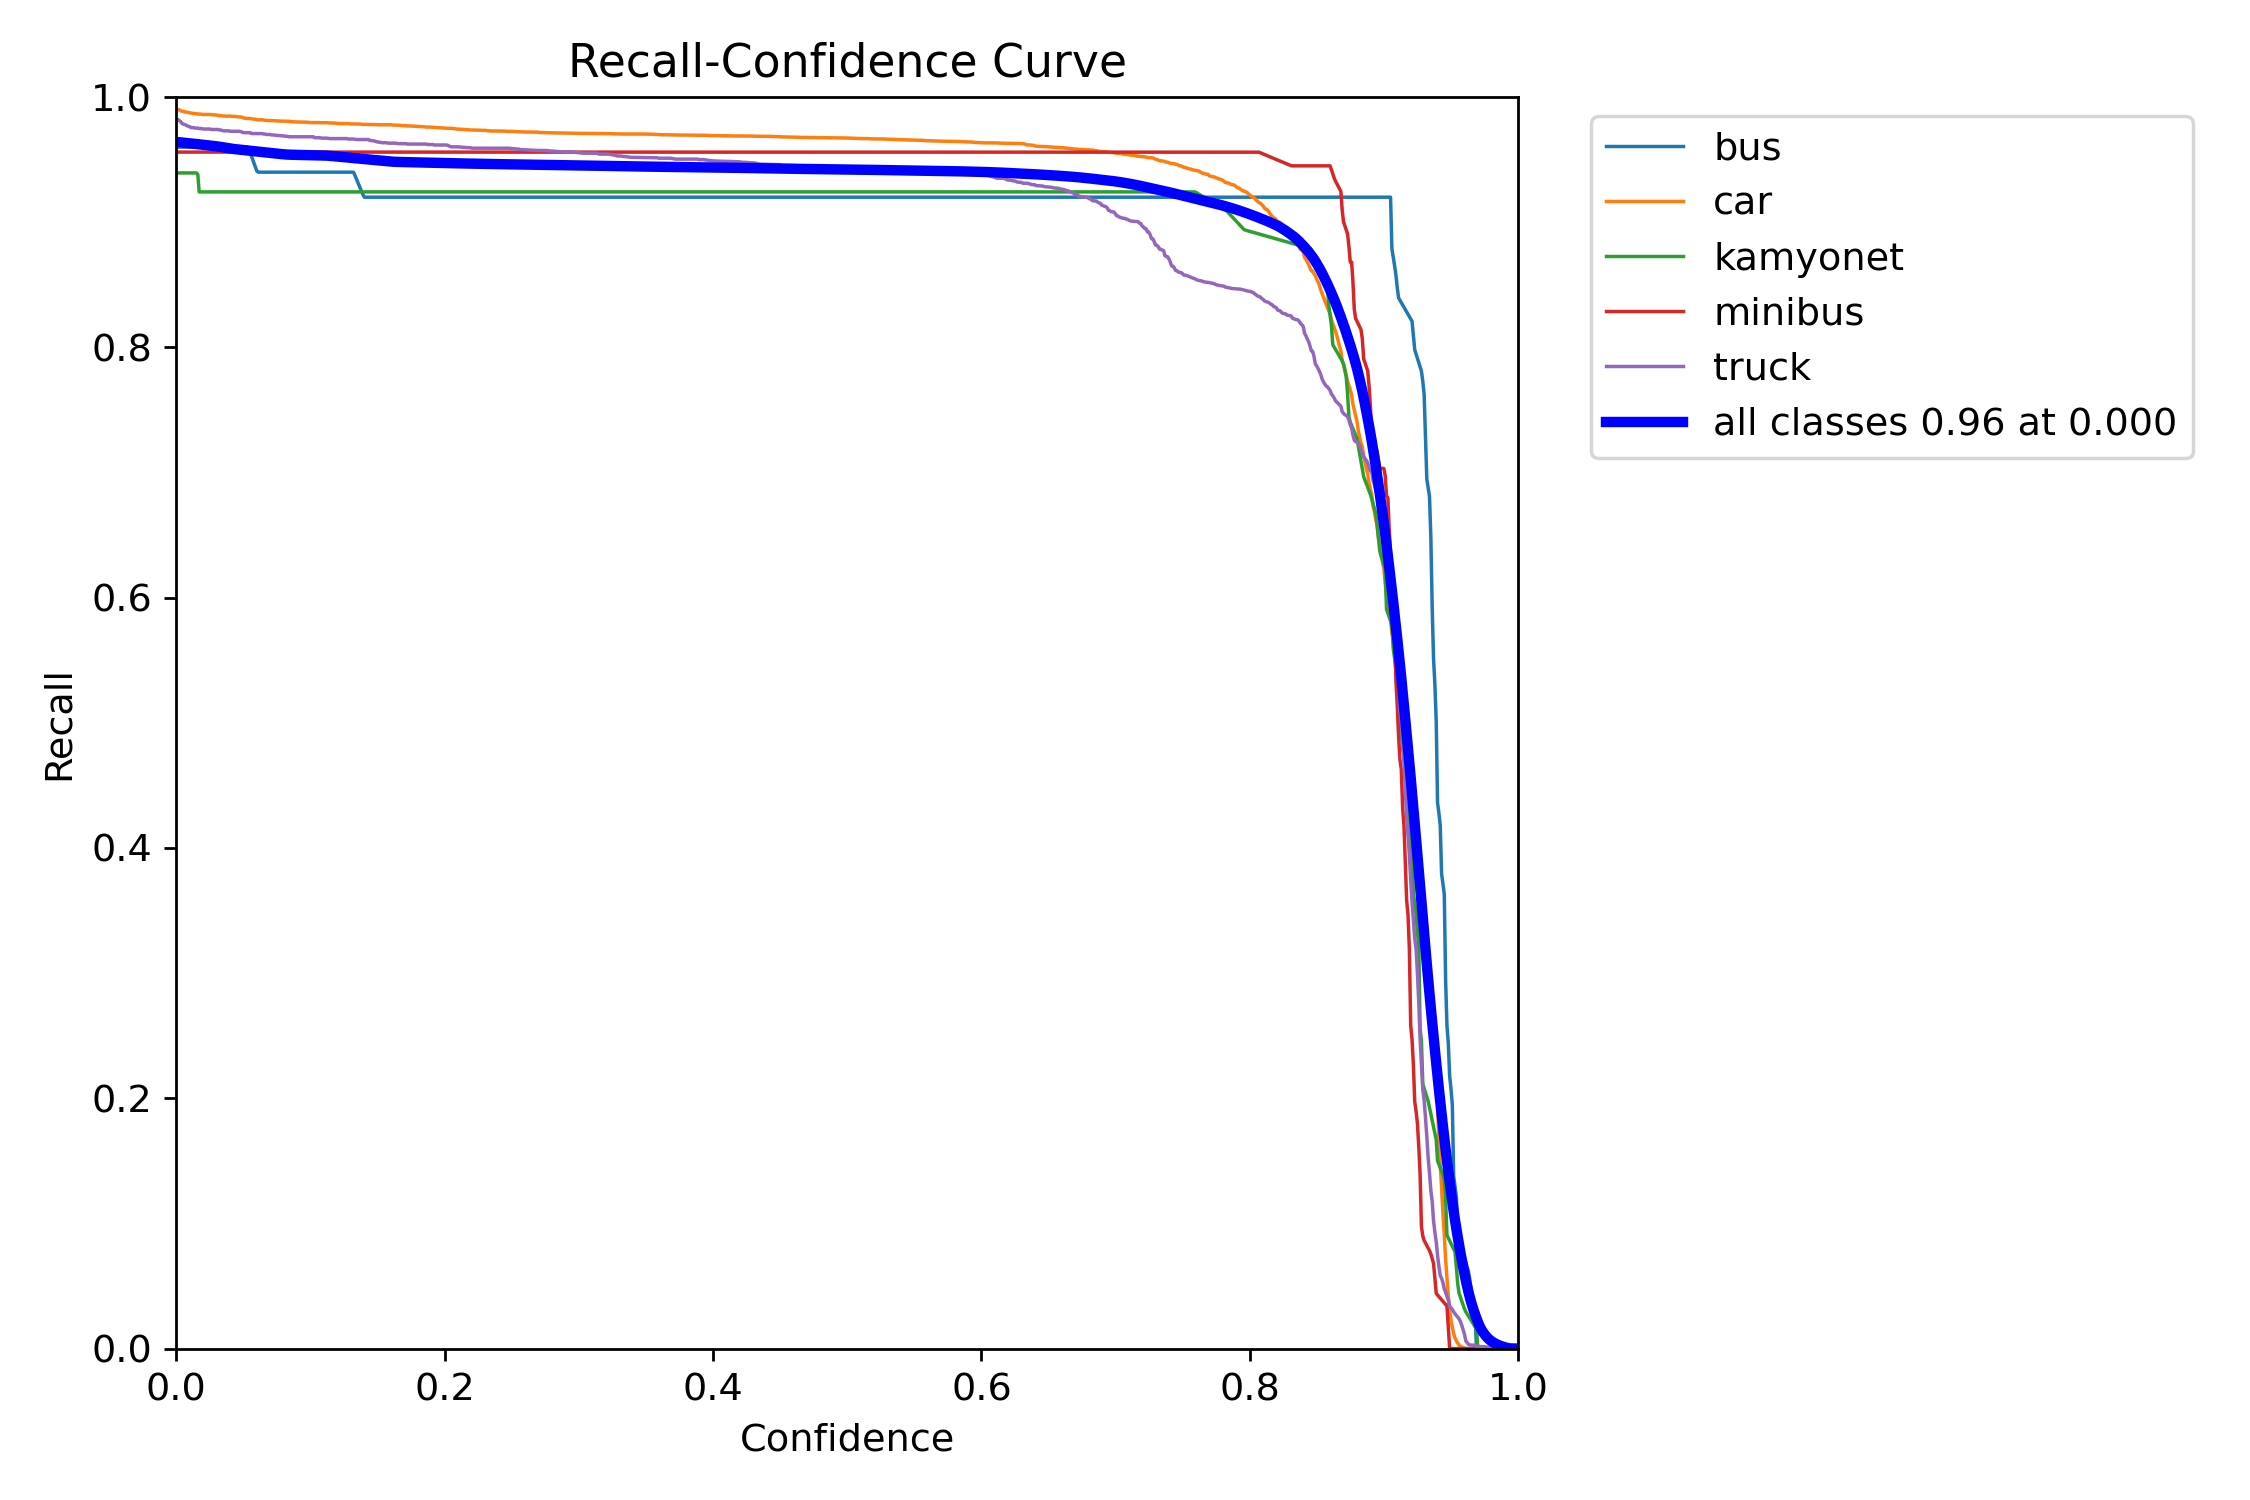

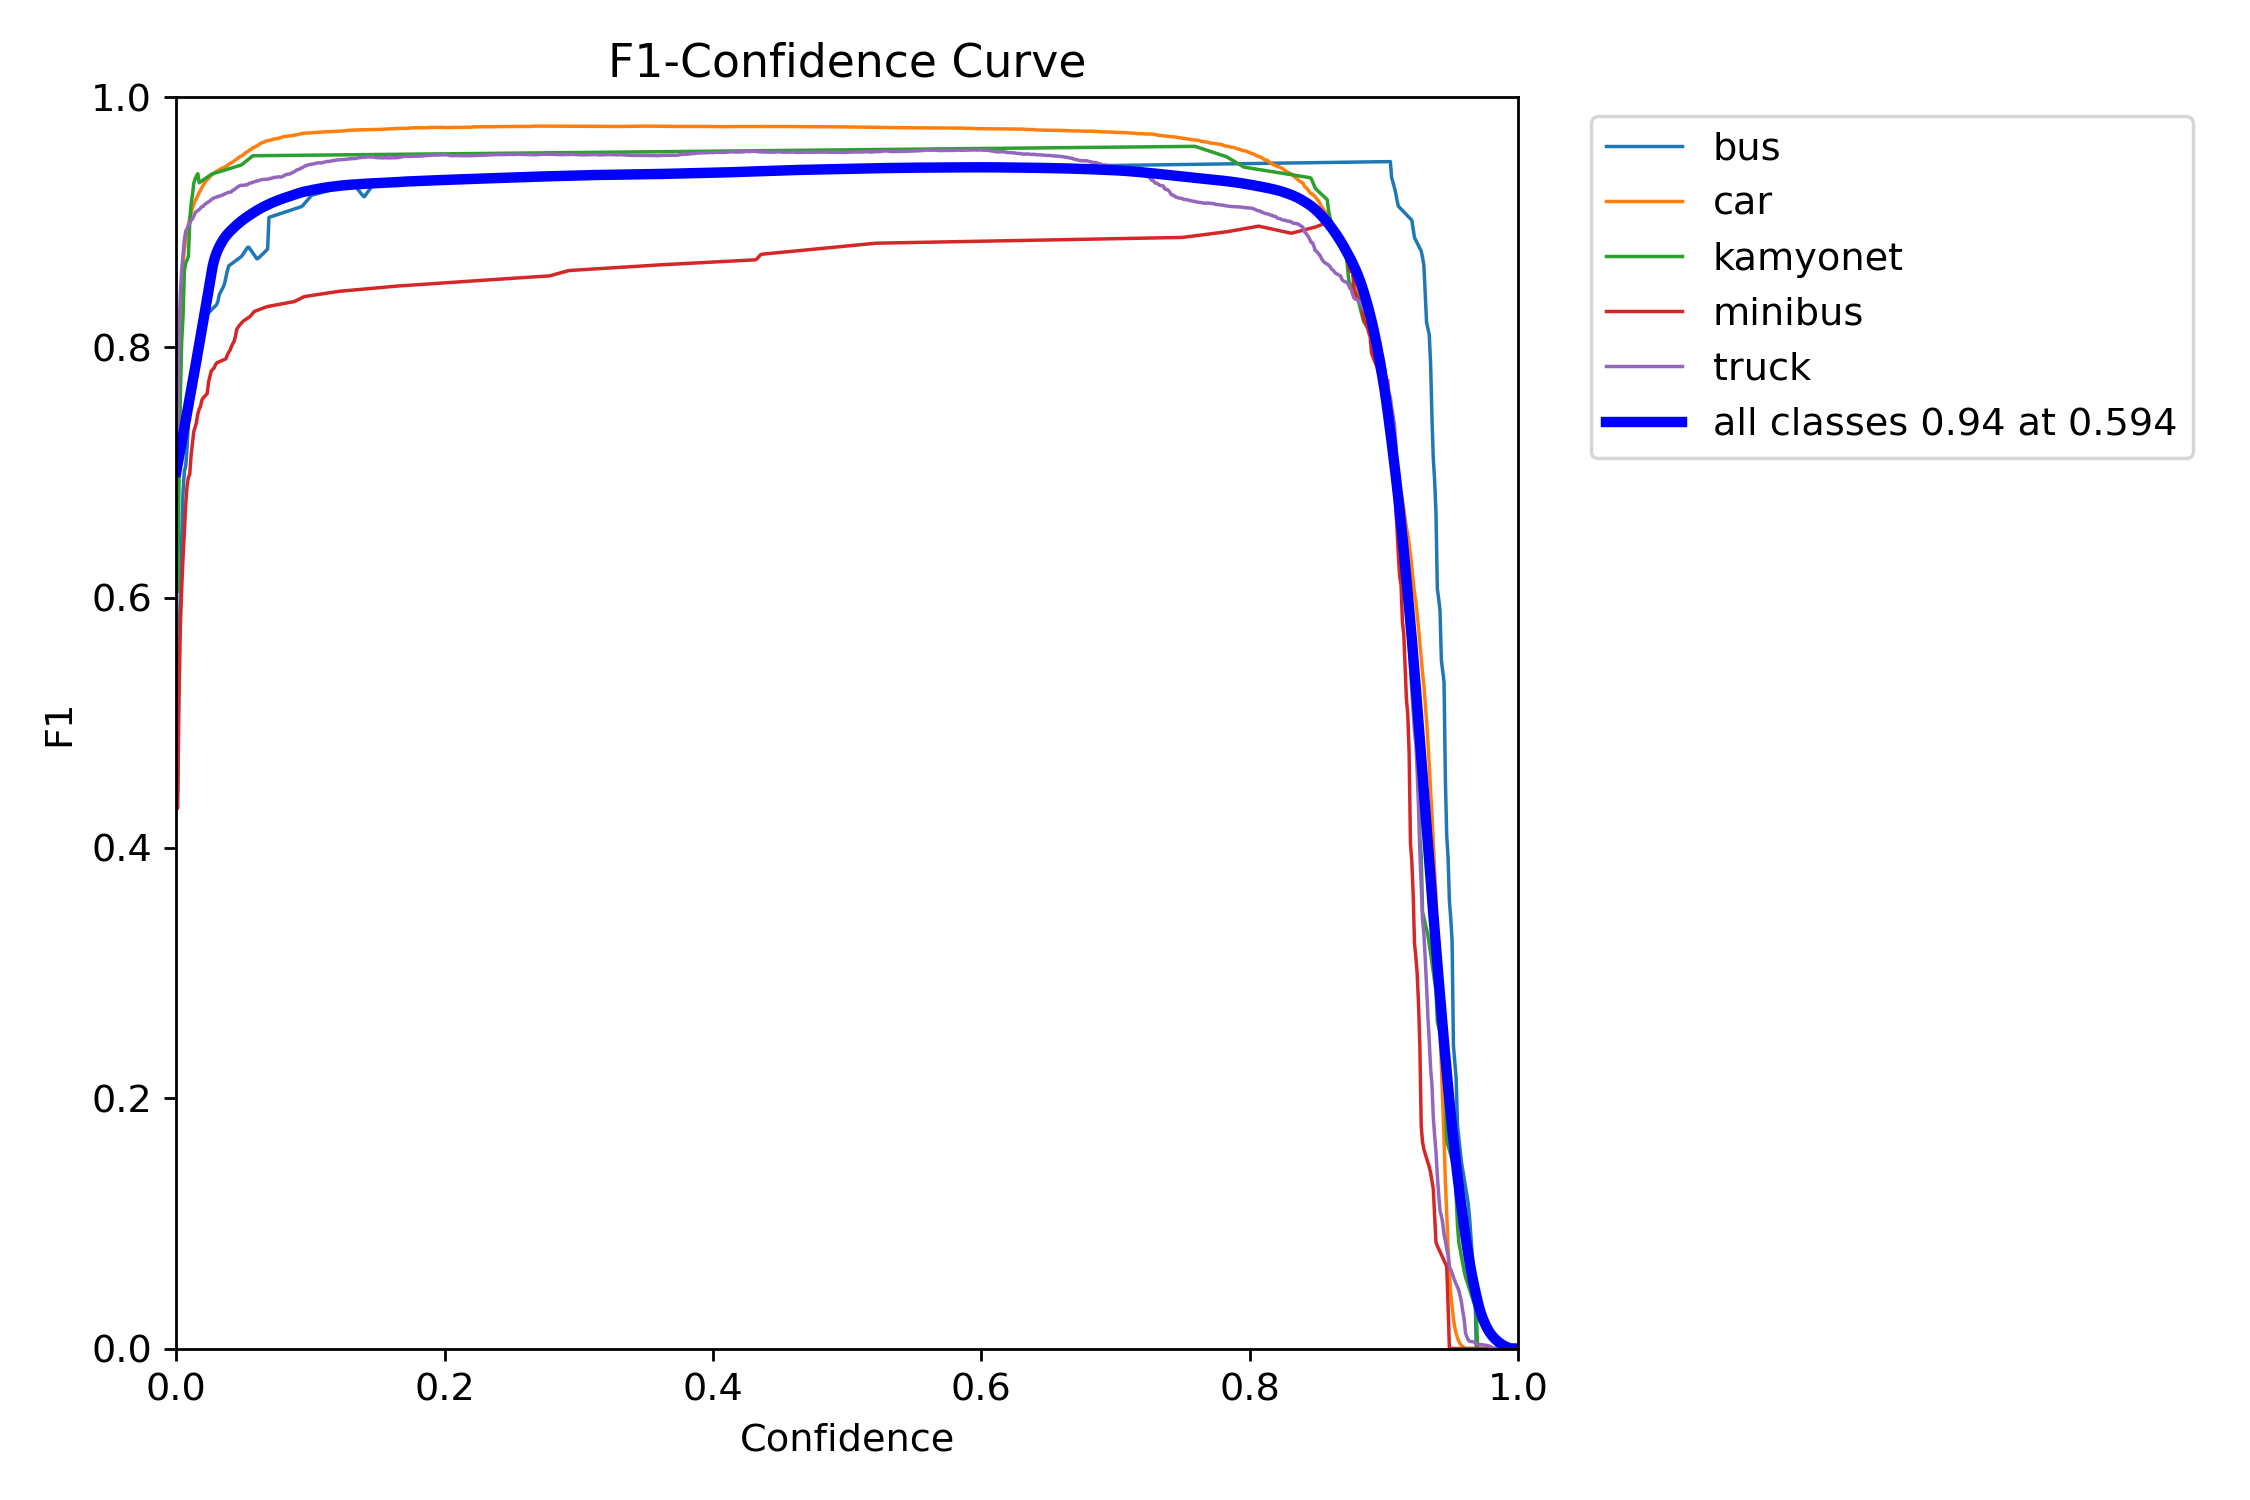

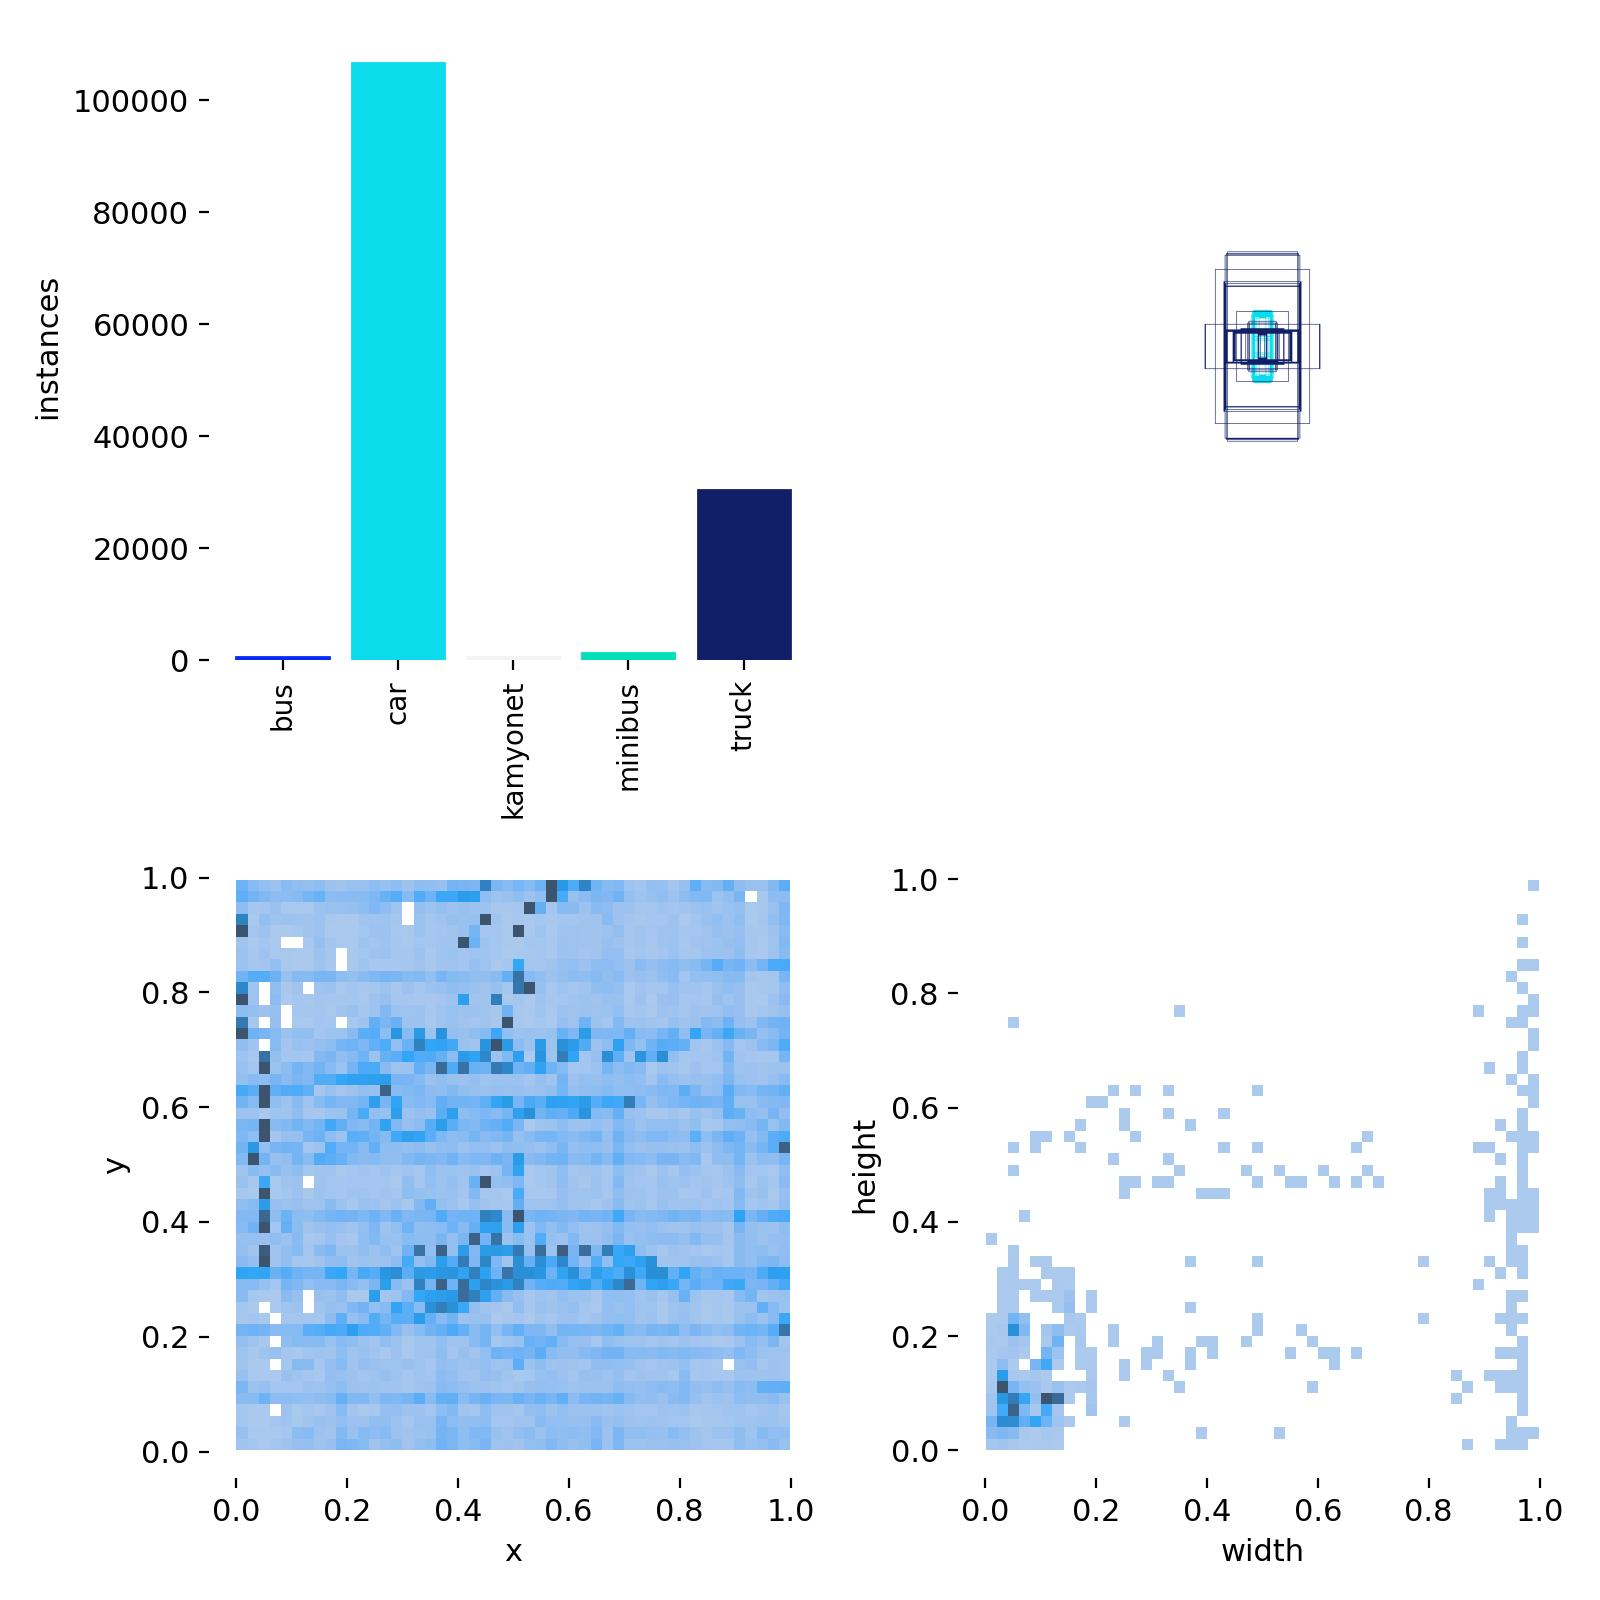

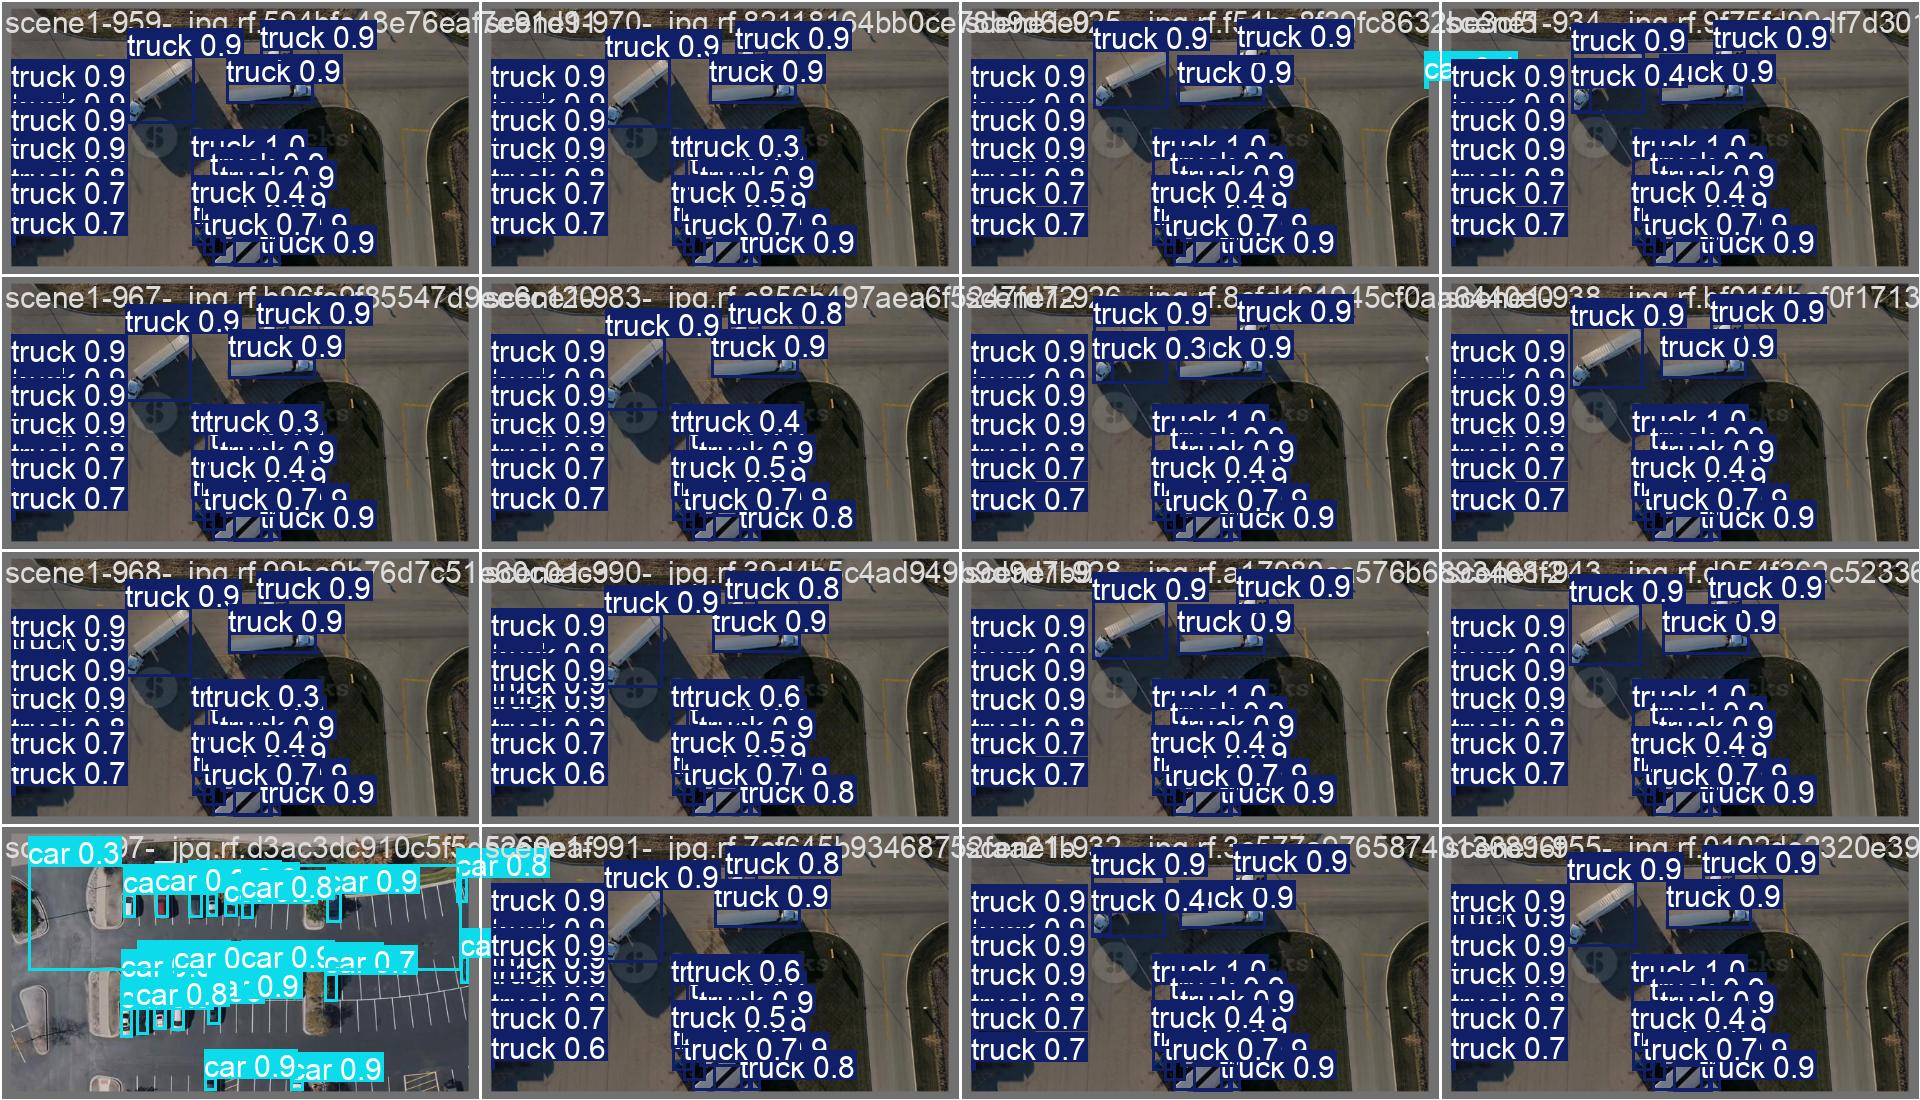

In [22]:
from IPython.display import Image, display

run_dir = "runs/nesne_sayimi"

files = [
    "results.png",
    "confusion_matrix.png",
    "confusion_matrix_normalized.png",
    "PR_curve.png",
    "P_curve.png",
    "R_curve.png",
    "F1_curve.png",
    "labels.jpg",
    "val_batch0_pred.jpg",
]

for f in files:
    display(Image(f"{run_dir}/{f}"))


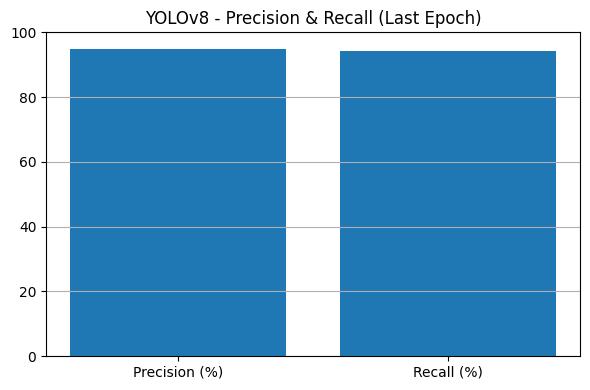

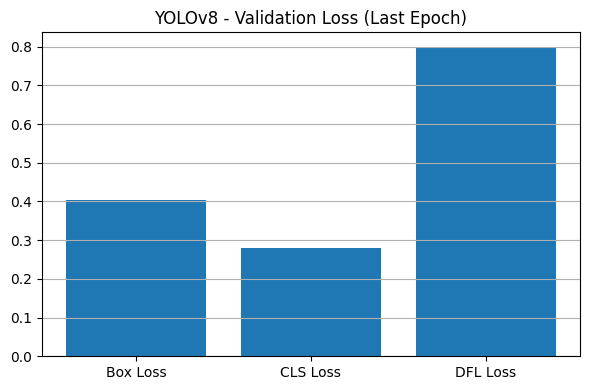

Kaydedildi: yolov8_precision_recall.png ve yolov8_val_losses.png
Özet:
{'Precision(%)': 94.87400000000001, 'Recall(%)': 94.367, 'BoxLoss': 0.40379, 'CLSLoss': 0.28067, 'DFLLoss': 0.79694}


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

run_dir = "runs/nesne_sayimi"
df = pd.read_csv(f"{run_dir}/results.csv")
df.columns = df.columns.str.strip()

last = df.iloc[-1]

precision = float(last["metrics/precision(B)"]) * 100
recall    = float(last["metrics/recall(B)"]) * 100

box_loss = float(last["val/box_loss"])
cls_loss = float(last["val/cls_loss"])
dfl_loss = float(last["val/dfl_loss"])

# 1) Precision/Recall bar
plt.figure(figsize=(6,4))
plt.bar(["Precision (%)","Recall (%)"], [precision, recall])
plt.title("YOLOv8 - Precision & Recall (Last Epoch)")
plt.ylim(0, 100)
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("yolov8_precision_recall.png", dpi=200)
plt.show()

# 2) Loss bar
plt.figure(figsize=(6,4))
plt.bar(["Box Loss","CLS Loss","DFL Loss"], [box_loss, cls_loss, dfl_loss])
plt.title("YOLOv8 - Validation Loss (Last Epoch)")
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("yolov8_val_losses.png", dpi=200)
plt.show()

print("Kaydedildi: yolov8_precision_recall.png ve yolov8_val_losses.png")
print("Özet:")
print({"Precision(%)": precision, "Recall(%)": recall, "BoxLoss": box_loss, "CLSLoss": cls_loss, "DFLLoss": dfl_loss})


In [24]:
from ultralytics import YOLO
import os, glob, random
from collections import Counter

# =========================
# AYARLAR (projene göre)
# =========================
DATASET_ROOT = "/content/datasets/Nesne-Sayimi-2"   # <-- sende bu klasör böyleydi
RUN_DIR      = "runs/nesne_sayimi"                 # eğitim çıktın
MODEL_PATH   = f"{RUN_DIR}/weights/best.pt"
SPLIT        = "valid"  # "test" de yapabilirsin (varsa)

N_TOTAL = 16            # toplam örnek görsel
RANDOM_SEED = 42
CONF = 0.25

# =========================
# Yardımcı fonksiyonlar
# =========================
def yolo_label_counts(label_path):
    """YOLO txt label içindeki class id'leri sayar."""
    c = Counter()
    if not os.path.exists(label_path):
        return c
    with open(label_path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            cls_id = int(float(line.split()[0]))
            c[cls_id] += 1
    return c

def pred_counts(results):
    """YOLO sonuçlarından class id sayar."""
    c = Counter()
    for b in results[0].boxes:
        cls_id = int(b.cls[0])
        c[cls_id] += 1
    return c

def total_abs_error(gt, pr, all_ids):
    """Toplam mutlak hata (sayıma göre)."""
    return sum(abs(gt.get(i,0) - pr.get(i,0)) for i in all_ids)

# =========================
# 1) Modeli yükle
# =========================
model = YOLO(MODEL_PATH)
names = model.names  # {0:'bus',1:'car',...}
all_ids = list(names.keys())

# =========================
# 2) Görselleri topla
# =========================
images_dir = os.path.join(DATASET_ROOT, SPLIT, "images")
labels_dir = os.path.join(DATASET_ROOT, SPLIT, "labels")

image_paths = sorted(glob.glob(os.path.join(images_dir, "*.*")))
print("Toplam görsel:", len(image_paths), "->", images_dir)

random.seed(RANDOM_SEED)

# Çok büyük setlerde hızlı olsun diye önce rastgele bir havuz seçebilirsin:
POOL = min(len(image_paths), 400)  # 400 görüntülük havuzdan iyi/kötü seçecek
pool_paths = random.sample(image_paths, POOL) if len(image_paths) > POOL else image_paths

# =========================
# 3) Etiket varsa hata hesaplayıp iyi/kötü seç
# =========================
scored = []
has_any_label = os.path.exists(labels_dir) and len(glob.glob(os.path.join(labels_dir, "*.txt"))) > 0

if has_any_label:
    print("Label bulundu -> iyi/kötü örnekler hataya göre seçilecek.")
    for img_path in pool_paths:
        base = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(labels_dir, base + ".txt")

        gt = yolo_label_counts(label_path)
        res = model(img_path, conf=CONF, verbose=False)
        pr = pred_counts(res)

        err = total_abs_error(gt, pr, all_ids)
        scored.append((err, img_path))
else:
    print("Label bulunamadı -> tamamen rastgele örnek seçilecek.")
    scored = [(0, p) for p in pool_paths]

# iyi: en düşük hata, kötü: en yüksek hata
scored.sort(key=lambda x: x[0])
n_good = N_TOTAL // 2
n_bad  = N_TOTAL - n_good

good_paths = [p for _, p in scored[:n_good]]
bad_paths  = [p for _, p in scored[-n_bad:]] if has_any_label else random.sample(pool_paths, n_bad)

selected = [("good", p) for p in good_paths] + [("bad", p) for p in bad_paths]
print("Seçilen örnekler:", len(selected), " (iyi:", len(good_paths), "kötü:", len(bad_paths), ")")

# =========================
# 4) Seçilen örnekleri çizdirip kaydet
# =========================
OUT_PROJECT = "runs/saha_test"
for tag, img_path in selected:
    # save=True -> tahminli görselleri kaydeder
    model.predict(
        source=img_path,
        conf=CONF,
        save=True,
        project=OUT_PROJECT,
        name=tag,     # good/ bad klasörleri ayrı olsun
        exist_ok=True,
        verbose=False
    )

print("Tahminli örnek görseller kaydedildi ->", OUT_PROJECT)
print("Good klasörü:", os.path.join(OUT_PROJECT, "good"))
print("Bad  klasörü:", os.path.join(OUT_PROJECT, "bad"))


Toplam görsel: 576 -> /content/datasets/Nesne-Sayimi-2/valid/images
Label bulundu -> iyi/kötü örnekler hataya göre seçilecek.
Seçilen örnekler: 16  (iyi: 8 kötü: 8 )
Results saved to runs/saha_test/good
Results saved to runs/saha_test/good
Results saved to runs/saha_test/good
Results saved to runs/saha_test/good
Results saved to runs/saha_test/good
Results saved to runs/saha_test/good
Results saved to runs/saha_test/good
Results saved to runs/saha_test/good
Results saved to runs/saha_test/bad
Results saved to runs/saha_test/bad
Results saved to runs/saha_test/bad
Results saved to runs/saha_test/bad
Results saved to runs/saha_test/bad
Results saved to runs/saha_test/bad
Results saved to runs/saha_test/bad
Results saved to runs/saha_test/bad
Tahminli örnek görseller kaydedildi -> runs/saha_test
Good klasörü: runs/saha_test/good
Bad  klasörü: runs/saha_test/bad


In [26]:
import os, glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

RUN_DIR = "runs/nesne_sayimi"
OUT_PROJECT = "runs/saha_test"
PDF_PATH = "tek_sayfa_ozet.pdf"

results_png = os.path.join(RUN_DIR, "results.png")
cm_png      = os.path.join(RUN_DIR, "confusion_matrix.png")
pr_png      = os.path.join(RUN_DIR, "PR_curve.png")

good_imgs = sorted(glob.glob(os.path.join(OUT_PROJECT, "good", "*.*")))
bad_imgs  = sorted(glob.glob(os.path.join(OUT_PROJECT, "bad",  "*.*")))

random.seed(42)
good_pick = random.sample(good_imgs, min(3, len(good_imgs))) if good_imgs else []
bad_pick  = random.sample(bad_imgs,  min(3, len(bad_imgs)))  if bad_imgs else []

def read_img(path):
    if path and os.path.exists(path):
        return mpimg.imread(path)
    return None

# A4 oranına yakın figür
fig = plt.figure(figsize=(8.27, 11.69))
gs = GridSpec(12, 6, figure=fig)

# Başlık
ax_title = fig.add_subplot(gs[0, :])
ax_title.axis("off")
ax_title.text(0.0, 0.7, "YOLOv8 Nesne Sayımı - Tek Sayfa Özet", fontsize=14, fontweight="bold")
ax_title.text(0.0, 0.25, f"Run: {RUN_DIR} | Saha test: {OUT_PROJECT}", fontsize=10)

# results.png (üst geniş)
ax_res = fig.add_subplot(gs[1:5, :])
ax_res.axis("off")
img = read_img(results_png)
if img is not None:
    ax_res.imshow(img)
    ax_res.set_title("Training / Validation Results (results.png)", fontsize=10)
else:
    ax_res.text(0.5, 0.5, f"Bulunamadı: {results_png}", ha="center", va="center")

# confusion_matrix ve PR_curve yan yana
ax_cm = fig.add_subplot(gs[5:8, :3]); ax_cm.axis("off")
img = read_img(cm_png)
if img is not None:
    ax_cm.imshow(img); ax_cm.set_title("Confusion Matrix", fontsize=10)
else:
    ax_cm.text(0.5, 0.5, f"Bulunamadı: {cm_png}", ha="center", va="center")

ax_pr = fig.add_subplot(gs[5:8, 3:]); ax_pr.axis("off")
img = read_img(pr_png)
if img is not None:
    ax_pr.imshow(img); ax_pr.set_title("PR Curve", fontsize=10)
else:
    ax_pr.text(0.5, 0.5, f"Bulunamadı: {pr_png}", ha="center", va="center")

# Alt: good ve bad örnekler (3+3)
ax_lbl = fig.add_subplot(gs[8, :])
ax_lbl.axis("off")
ax_lbl.text(0.0, 0.5, "Saha Test Örnekleri (Good / Bad)", fontsize=11, fontweight="bold")

# Good satırı
for i in range(3):
    ax = fig.add_subplot(gs[9, i*2:(i*2)+2])
    ax.axis("off")
    if i < len(good_pick):
        ax.imshow(read_img(good_pick[i]))
        ax.set_title("Good", fontsize=9)
    else:
        ax.text(0.5, 0.5, "Good yok", ha="center", va="center", fontsize=9)

# Bad satırı
for i in range(3):
    ax = fig.add_subplot(gs[10, i*2:(i*2)+2])
    ax.axis("off")
    if i < len(bad_pick):
        ax.imshow(read_img(bad_pick[i]))
        ax.set_title("Bad", fontsize=9)
    else:
        ax.text(0.5, 0.5, "Bad yok", ha="center", va="center", fontsize=9)

# Dipnot
ax_foot = fig.add_subplot(gs[11, :])
ax_foot.axis("off")
ax_foot.text(0.0, 0.4, "Not: Good/Bad seçimi için split içinde label olması gerekir.", fontsize=9)

plt.tight_layout()
plt.savefig(PDF_PATH, format="pdf", dpi=200)
plt.close(fig)

print("PDF üretildi:", PDF_PATH)


PDF üretildi: tek_sayfa_ozet.pdf


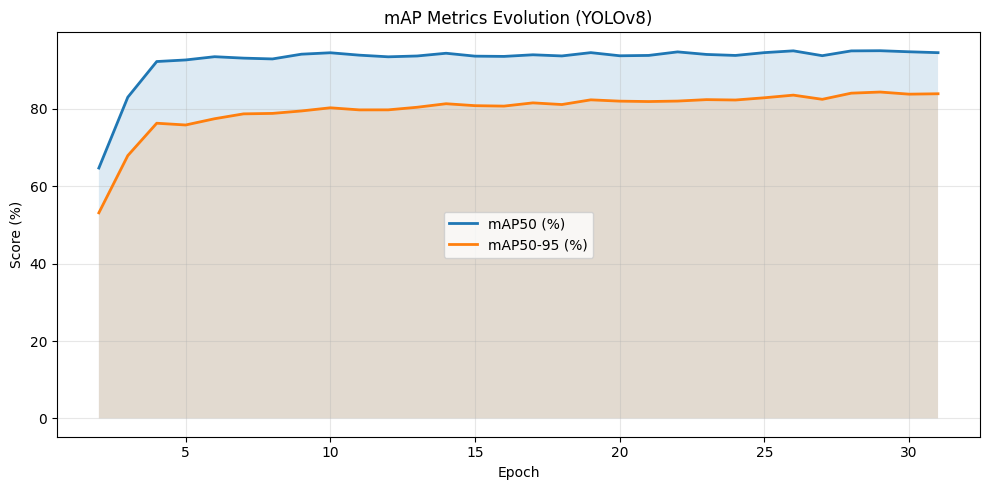

Kaydedildi: runs/nesne_sayimi/map_evolution.png
Kaydedildi: runs/nesne_sayimi/map_evolution.pdf
Son epoch mAP50(%): 94.56
Son epoch mAP50-95(%): 83.94


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

run_dir = "runs/nesne_sayimi"
csv_path = os.path.join(run_dir, "results.csv")

df = pd.read_csv(csv_path)
df.columns = [c.strip() for c in df.columns]  # boşluk temizliği

# YOLOv8 results.csv içinde bazen kolon isimleri küçük farklılık gösterebiliyor
def find_col(keyword_list):
    for k in keyword_list:
        for c in df.columns:
            if k in c:
                return c
    return None

col_epoch = find_col(["epoch"])
col_map50 = find_col(["metrics/mAP50(B)", "metrics/mAP50"])
col_map5095 = find_col(["metrics/mAP50-95(B)", "metrics/mAP50-95"])

if col_epoch is None:
    # Bazı sürümlerde epoch kolonu yoksa index'ten üret
    df["epoch"] = range(len(df))
    col_epoch = "epoch"

if col_map50 is None or col_map5095 is None:
    print("Kolonlar bulunamadı. Mevcut kolonlar:", df.columns.tolist())
    raise SystemExit

x = df[col_epoch].astype(int) + 1  # 1'den başlasın
y1 = df[col_map50].astype(float) * 100
y2 = df[col_map5095].astype(float) * 100

plt.figure(figsize=(10, 5))
plt.plot(x, y1, linewidth=2, label="mAP50 (%)")
plt.plot(x, y2, linewidth=2, label="mAP50-95 (%)")

# Alan dolgusu (senin örnekteki gibi)
plt.fill_between(x, y1, alpha=0.15)
plt.fill_between(x, y2, alpha=0.15)

plt.title("mAP Metrics Evolution (YOLOv8)")
plt.xlabel("Epoch")
plt.ylabel("Score (%)")
plt.grid(True, alpha=0.3)
plt.legend()

out_png = os.path.join(run_dir, "map_evolution.png")
out_pdf = os.path.join(run_dir, "map_evolution.pdf")
plt.tight_layout()
plt.savefig(out_png, dpi=200)
plt.savefig(out_pdf)
plt.show()

print("Kaydedildi:", out_png)
print("Kaydedildi:", out_pdf)

# İstersen son epoch değerlerini de yazdıralım:
print("Son epoch mAP50(%):", round(y1.iloc[-1], 2))
print("Son epoch mAP50-95(%):", round(y2.iloc[-1], 2))


Kolonlar: ['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


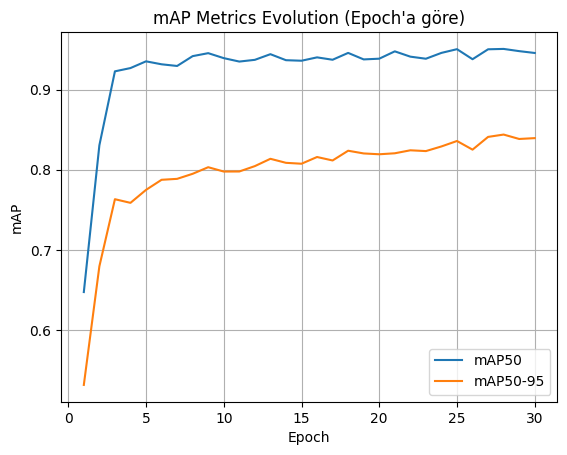

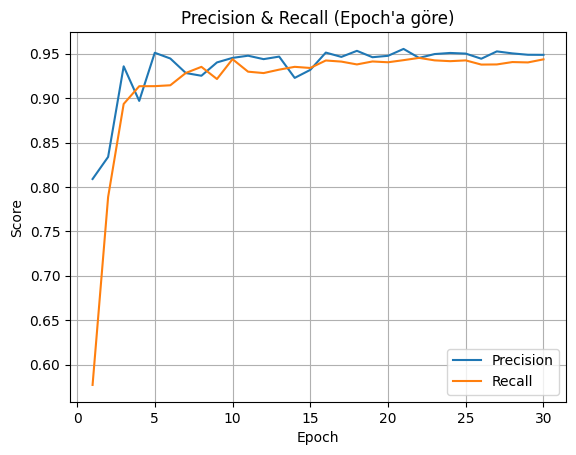

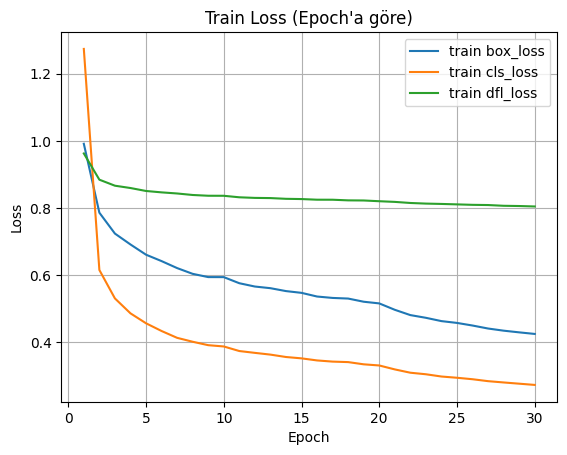

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

RUN_DIR = "runs/nesne_sayimi"
csv_path = f"{RUN_DIR}/results.csv"

df = pd.read_csv(csv_path)
df.columns = [c.strip() for c in df.columns]  # bazen başlıklar boşluklu gelir

print("Kolonlar:", df.columns.tolist())

# YOLOv8 results.csv'de genelde şu kolonlar olur:
# epoch, metrics/precision(B), metrics/recall(B), metrics/mAP50(B), metrics/mAP50-95(B),
# train/box_loss, train/cls_loss, train/dfl_loss, val/box_loss, val/cls_loss, val/dfl_loss

# 1) mAP grafiği (epoch'a göre)
plt.figure()
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("mAP Metrics Evolution (Epoch'a göre)")
plt.legend()
plt.grid(True)
plt.savefig(f"{RUN_DIR}/mAP_evolution.png", dpi=200, bbox_inches="tight")
plt.show()

# 2) Precision & Recall (epoch'a göre)
plt.figure()
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision & Recall (Epoch'a göre)")
plt.legend()
plt.grid(True)
plt.savefig(f"{RUN_DIR}/PR_evolution.png", dpi=200, bbox_inches="tight")
plt.show()

# 3) Losslar (train)
plt.figure()
plt.plot(df["epoch"], df["train/box_loss"], label="train box_loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="train cls_loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="train dfl_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train Loss (Epoch'a göre)")
plt.legend()
plt.grid(True)
plt.savefig(f"{RUN_DIR}/train_loss.png", dpi=200, bbox_inches="tight")
plt.show()


In [30]:
import os, glob, random, shutil
from ultralytics import YOLO

RUN_DIR = "runs/nesne_sayimi"
MODEL_PATH = f"{RUN_DIR}/weights/best.pt"
DATA_ROOT = "/content/datasets/Nesne-Sayimi-2"

VAL_IMG_DIR = os.path.join(DATA_ROOT, "valid", "images")
VAL_LBL_DIR = os.path.join(DATA_ROOT, "valid", "labels")

OUT_DIR = "runs/saha_test"
PRED_DIR = os.path.join(OUT_DIR, "preds")
GOOD_DIR = os.path.join(OUT_DIR, "good")
BAD_DIR  = os.path.join(OUT_DIR, "bad")

for d in [OUT_DIR, PRED_DIR, GOOD_DIR, BAD_DIR]:
    os.makedirs(d, exist_ok=True)

model = YOLO(MODEL_PATH)

# 1) valid görüntülerini al ve rastgele seç
all_imgs = sorted(glob.glob(os.path.join(VAL_IMG_DIR, "*.*")))
N = 20
sample_imgs = random.sample(all_imgs, min(N, len(all_imgs)))
print("Seçilen örnek sayısı:", len(sample_imgs))

def gt_count(img_path):
    base = os.path.splitext(os.path.basename(img_path))[0]
    lbl_path = os.path.join(VAL_LBL_DIR, base + ".txt")
    if not os.path.exists(lbl_path):
        return 0
    with open(lbl_path, "r") as f:
        lines = [ln.strip() for ln in f.readlines() if ln.strip()]
    return len(lines)

scores = []  # (error, img_path, saved_pred_path, gt, pred)

for img_path in sample_imgs:
    gt = gt_count(img_path)

    # tahmin al + görseli kaydet
    res = model.predict(img_path, conf=0.25, save=True, project=OUT_DIR, name="preds", exist_ok=True, verbose=False)
    pred = len(res[0].boxes)

    # YOLO kaydettiği dosya yolu (save=True ile) genelde:
    # runs/saha_test/preds/<orijinal_ad>.jpg
    saved_pred_path = os.path.join(PRED_DIR, os.path.basename(img_path))

    err = abs(gt - pred)
    scores.append((err, img_path, saved_pred_path, gt, pred))

# en iyi (hatası küçük) ve en kötü (hatası büyük) seç
scores_sorted = sorted(scores, key=lambda x: x[0])
K = 6  # rapora koyacağımız örnek sayısı (iyi 3-6, kötü 3-6 ideal)

good = scores_sorted[:K]
bad  = scores_sorted[-K:]

# klasörleri temizleyip yeniden doldurmak istersen:
for f in glob.glob(os.path.join(GOOD_DIR, "*")): os.remove(f)
for f in glob.glob(os.path.join(BAD_DIR, "*")):  os.remove(f)

def copy_with_tag(items, target_dir, tag):
    for err, img_path, saved_pred_path, gt, pred in items:
        if os.path.exists(saved_pred_path):
            base = os.path.splitext(os.path.basename(saved_pred_path))[0]
            new_name = f"{base}__{tag}__GT{gt}_PR{pred}_ERR{err}.jpg"
            shutil.copy(saved_pred_path, os.path.join(target_dir, new_name))

copy_with_tag(good, GOOD_DIR, "GOOD")
copy_with_tag(bad,  BAD_DIR,  "BAD")

print("GOOD örnekler:", len(glob.glob(os.path.join(GOOD_DIR,"*.jpg"))))
print("BAD örnekler :", len(glob.glob(os.path.join(BAD_DIR,"*.jpg"))))
print("Kayıt:", OUT_DIR)


Seçilen örnek sayısı: 20
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
Results saved to runs/saha_test/preds
GOOD örnekler: 6
BAD örnekler : 6
Kayıt: runs/saha_test


In [31]:
import os, glob
from PIL import Image, ImageDraw, ImageFont

RUN_DIR = "runs/nesne_sayimi"
OUT_DIR = "runs/saha_test"

results_png = f"{RUN_DIR}/results.png"
cm_png      = f"{RUN_DIR}/confusion_matrix.png"
pr_png      = f"{RUN_DIR}/PR_curve.png"

good_imgs = sorted(glob.glob(f"{OUT_DIR}/good/*.jpg"))[:3]
bad_imgs  = sorted(glob.glob(f"{OUT_DIR}/bad/*.jpg"))[:3]

assert os.path.exists(results_png), "results.png yok"
assert os.path.exists(cm_png), "confusion_matrix.png yok"
assert os.path.exists(pr_png), "PR_curve.png yok"

# A4 (yaklaşık) 200 DPI canvas
W, H = 1654, 2339  # A4'e yakın
canvas = Image.new("RGB", (W, H), "white")
draw = ImageDraw.Draw(canvas)

# Basit başlık
title = "YOLOv8 Nesne Sayımı - Tek Sayfa Özet"
draw.text((40, 30), title, fill="black")

def paste_fit(img_path, x, y, w, h):
    im = Image.open(img_path).convert("RGB")
    im.thumbnail((w, h))
    # ortalayarak yapıştır
    ox = x + (w - im.size[0]) // 2
    oy = y + (h - im.size[1]) // 2
    canvas.paste(im, (ox, oy))

# Üst: results.png (büyük)
paste_fit(results_png, 40, 80, W-80, 850)

# Orta: confusion + PR yan yana
paste_fit(cm_png,  40, 960, (W-120)//2, 520)
paste_fit(pr_png,  80 + (W-120)//2, 960, (W-120)//2, 520)

# Alt: GOOD ve BAD örnekleri
draw.text((40, 1500), "Saha testi örnekleri (iyi / kötü):", fill="black")

thumb_w = (W - 120) // 3
thumb_h = 280

# GOOD satırı
draw.text((40, 1540), "GOOD:", fill="black")
for i, p in enumerate(good_imgs):
    paste_fit(p, 40 + i*(thumb_w+20), 1570, thumb_w, thumb_h)

# BAD satırı
draw.text((40, 1870), "BAD:", fill="black")
for i, p in enumerate(bad_imgs):
    paste_fit(p, 40 + i*(thumb_w+20), 1900, thumb_w, thumb_h)

pdf_path = "tek_sayfa_ozet.pdf"
canvas.save(pdf_path, "PDF", resolution=200.0)
print("PDF üretildi:", pdf_path)


PDF üretildi: tek_sayfa_ozet.pdf


In [32]:
import os, glob, random, shutil
from pathlib import Path

# ---- SENİN PROJE YOLLARIN ----
RUN_DIR      = "runs/nesne_sayimi"                       # eğitim çıktın
WEIGHTS_PATH = f"{RUN_DIR}/weights/best.pt"              # model
DATA_YAML    = "/content/datasets/Nesne-Sayimi-2/data.yaml"  # data.yaml (sende bu görünüyor)

# Dataset kökü ve split seçimi (valid veya test)
DATASET_ROOT = "/content/datasets/Nesne-Sayimi-2"
SPLIT        = "valid"  # "test" de olabilir

IMG_DIR   = f"{DATASET_ROOT}/{SPLIT}/images"
LABEL_DIR = f"{DATASET_ROOT}/{SPLIT}/labels"

# Saha testi kaç örnek seçsin?
N_SAMPLES = 20

# İhracat klasörü
EXPORT_DIR = "export_proje_full"
SAHA_DIR   = "runs/saha_test"  # üretilecek

print("WEIGHTS:", WEIGHTS_PATH)
print("IMG_DIR:", IMG_DIR)
print("LABEL_DIR:", LABEL_DIR)


WEIGHTS: runs/nesne_sayimi/weights/best.pt
IMG_DIR: /content/datasets/Nesne-Sayimi-2/valid/images
LABEL_DIR: /content/datasets/Nesne-Sayimi-2/valid/labels


In [33]:
from ultralytics import YOLO

def read_yolo_label_counts(label_path: str):
    # YOLO label format: cls cx cy w h
    counts = {}
    if not os.path.exists(label_path):
        return counts
    with open(label_path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            cls = int(line.split()[0])
            counts[cls] = counts.get(cls, 0) + 1
    return counts

def pred_counts_from_results(results, names):
    counts = {}
    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        cls_name = names[cls_id]
        counts[cls_name] = counts.get(cls_name, 0) + 1
    return counts

# Model
model = YOLO(WEIGHTS_PATH)
names = model.names  # {id: name}

# Rastgele örnek seç
image_paths = sorted(glob.glob(os.path.join(IMG_DIR, "*")))
assert len(image_paths) > 0, "IMG_DIR boş görünüyor. Yol yanlış olabilir."

random.seed(42)
picked = random.sample(image_paths, k=min(N_SAMPLES, len(image_paths)))

# Klasörleri hazırla
good_dir = os.path.join(SAHA_DIR, "good")
bad_dir  = os.path.join(SAHA_DIR, "bad")
os.makedirs(good_dir, exist_ok=True)
os.makedirs(bad_dir, exist_ok=True)

summary_rows = []

for img_path in picked:
    base = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(LABEL_DIR, base + ".txt")

    # Tahmin (kaydetme işini biz yapacağız)
    results = model(img_path, conf=0.25, verbose=False)
    pred_counts = pred_counts_from_results(results, names)

    # GT sayımları (cls id üzerinden)
    gt_counts_id = read_yolo_label_counts(label_path)
    # GT'yi isimlere çevir
    gt_counts = {}
    for cls_id, c in gt_counts_id.items():
        cls_name = names.get(cls_id, str(cls_id))
        gt_counts[cls_name] = c

    # Hata hesabı (label yoksa "label_missing")
    if len(gt_counts) == 0 and not os.path.exists(label_path):
        decision = "label_missing"  # veri setinde label yoksa
        target_dir = good_dir
        err = None
    else:
        # toplam mutlak hata
        all_classes = set(gt_counts.keys()) | set(pred_counts.keys())
        err = sum(abs(pred_counts.get(k, 0) - gt_counts.get(k, 0)) for k in all_classes)

        # basit eşik: 0-1 hata good, 2+ hata bad (istersen değiştirirsin)
        decision = "good" if err <= 1 else "bad"
        target_dir = good_dir if decision == "good" else bad_dir

    # Annotated görseli kaydet
    annotated = results[0].plot()  # numpy array (BGR)
    out_path = os.path.join(target_dir, os.path.basename(img_path))
    import cv2
    cv2.imwrite(out_path, annotated)

    summary_rows.append({
        "image": os.path.basename(img_path),
        "decision": decision,
        "error_sumabs": err,
        "pred_counts": dict(pred_counts),
        "gt_counts": dict(gt_counts),
    })

print("Saha testi üretildi.")
print("Good:", len(glob.glob(good_dir+"/*")))
print("Bad :", len(glob.glob(bad_dir+"/*")))


Saha testi üretildi.
Good: 23
Bad : 9


In [34]:
import matplotlib.pyplot as plt
from PIL import Image

def find_first_existing(paths):
    for p in paths:
        if os.path.exists(p):
            return p
    return None

# Eğitim görselleri (senin run klasörüne göre)
results_png = find_first_existing([
    f"{RUN_DIR}/results.png",
    "runs/detect/train/results.png"
])

conf_png = find_first_existing([
    f"{RUN_DIR}/confusion_matrix.png",
    "runs/detect/train/confusion_matrix.png",
    "runs/detect/val/confusion_matrix.png"
])

pr_png = find_first_existing([
    f"{RUN_DIR}/PR_curve.png",
    "runs/detect/train/PR_curve.png"
])

assert results_png and conf_png and pr_png, "results/confusion/PR görsellerinden biri bulunamadı. RUN_DIR veya dosya adlarını kontrol et."

# Örnek görseller (good/bad’den seç)
good_imgs = sorted(glob.glob(os.path.join(good_dir, "*")))
bad_imgs  = sorted(glob.glob(os.path.join(bad_dir, "*")))

sample_imgs = []
sample_imgs += random.sample(good_imgs, k=min(2, len(good_imgs))) if len(good_imgs) else []
sample_imgs += random.sample(bad_imgs,  k=min(2, len(bad_imgs)))  if len(bad_imgs) else []

# Eğer bad yoksa good’dan tamamla
while len(sample_imgs) < 4 and len(good_imgs) > len(sample_imgs):
    # tekrar seçmemek için
    for p in good_imgs:
        if p not in sample_imgs:
            sample_imgs.append(p)
            break

# A4'e yakın boyut (inç)
fig = plt.figure(figsize=(8.27, 11.69))  # A4 portrait

# Üst: 3 grafik
ax1 = fig.add_axes([0.07, 0.68, 0.86, 0.26])
ax2 = fig.add_axes([0.07, 0.42, 0.41, 0.22])
ax3 = fig.add_axes([0.52, 0.42, 0.41, 0.22])

for ax, img_path, title in [
    (ax1, results_png, "Training / Validation Metrics (results.png)"),
    (ax2, conf_png, "Confusion Matrix"),
    (ax3, pr_png, "PR Curve"),
]:
    img = Image.open(img_path).convert("RGB")
    ax.imshow(img)
    ax.set_title(title, fontsize=10)
    ax.axis("off")

# Alt: 4 örnek (2x2)
positions = [
    [0.07, 0.23, 0.41, 0.16],
    [0.52, 0.23, 0.41, 0.16],
    [0.07, 0.05, 0.41, 0.16],
    [0.52, 0.05, 0.41, 0.16],
]
for i in range(4):
    ax = fig.add_axes(positions[i])
    ax.axis("off")
    if i < len(sample_imgs):
        img = Image.open(sample_imgs[i]).convert("RGB")
        ax.imshow(img)
        ax.set_title(os.path.basename(sample_imgs[i]), fontsize=8)

fig.suptitle("YOLOv8 - Tek Sayfalık Özet", fontsize=14, y=0.98)

pdf_path = "tek_sayfa_ozet.pdf"
fig.savefig(pdf_path, dpi=200, bbox_inches="tight")
plt.close(fig)

print("PDF üretildi:", pdf_path)


PDF üretildi: tek_sayfa_ozet.pdf


In [35]:
os.makedirs(f"{EXPORT_DIR}/scripts", exist_ok=True)

# 3.1 Görüntü klasörü sayım scripti
img_script = r'''
from ultralytics import YOLO
import os, glob
import pandas as pd

WEIGHTS_PATH = "weights/best.pt"
IMAGES_DIR   = "input_images"  # buraya görüntü klasörünü koy

model = YOLO(WEIGHTS_PATH)
names = model.names

image_paths = sorted(glob.glob(os.path.join(IMAGES_DIR, "*")))
print("Bulunan görüntü:", len(image_paths))

records = []
for img_path in image_paths:
    results = model(img_path, conf=0.25, verbose=False)
    counts = {}
    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        cls_name = names[cls_id]
        counts[cls_name] = counts.get(cls_name, 0) + 1

    row = {"image": os.path.basename(img_path), "total": sum(counts.values())}
    for cls_name in names.values():
        row[cls_name] = counts.get(cls_name, 0)
    records.append(row)

df = pd.DataFrame(records)
out_csv = "image_counts.csv"
df.to_csv(out_csv, index=False)
print("Kaydedildi:", out_csv)
print(df.head())
'''
Path(f"{EXPORT_DIR}/scripts/test_images_folder.py").write_text(img_script, encoding="utf-8")

# 3.2 Video sayım scripti (unique track id ile)
video_script = r'''
from ultralytics import YOLO
import os
from collections import defaultdict

WEIGHTS_PATH = "weights/best.pt"
VIDEO_PATH   = "input_video.mp4"     # videoyu buraya koy
OUT_VIDEO    = "annotated_video.mp4" # çıktıyı kaydeder

model = YOLO(WEIGHTS_PATH)
names = model.names

# unique track id ile sayım
seen = defaultdict(set)  # class_name -> {track_ids}

results = model.track(
    source=VIDEO_PATH,
    conf=0.25,
    tracker="bytetrack.yaml",
    persist=True,
    save=True,
    project=".",
    name="video_out",
    verbose=False
)

# YOLO track, save=True ile video_out klasörüne kaydeder.
# Sayım için: track çıktıları generator akışında daha net olur; burada basit yaklaşım:
# video_out içinden videoyu bulup OUT_VIDEO'ya kopyalayalım.
import glob, shutil
cand = glob.glob("video_out/*.mp4") + glob.glob("video_out/*.avi")
if cand:
    shutil.copy2(cand[0], OUT_VIDEO)
    print("Video kaydedildi:", OUT_VIDEO)

print("Not: Unique track sayımı için generator akışı ile frame-frame toplamak daha doğru.")
print("İstersen onu da ekleyebilirim.")
'''
Path(f"{EXPORT_DIR}/scripts/test_video_tracking.py").write_text(video_script, encoding="utf-8")

print("Scriptler yazıldı:", f"{EXPORT_DIR}/scripts")


Scriptler yazıldı: export_proje_full/scripts


In [36]:
import json

# Klasörleri hazırla
os.makedirs(EXPORT_DIR, exist_ok=True)
os.makedirs(f"{EXPORT_DIR}/weights", exist_ok=True)
os.makedirs(f"{EXPORT_DIR}/metrics", exist_ok=True)
os.makedirs(f"{EXPORT_DIR}/pdf", exist_ok=True)
os.makedirs(f"{EXPORT_DIR}/saha_test/good", exist_ok=True)
os.makedirs(f"{EXPORT_DIR}/saha_test/bad", exist_ok=True)
os.makedirs(f"{EXPORT_DIR}/dataset_sample/images", exist_ok=True)
os.makedirs(f"{EXPORT_DIR}/dataset_sample/labels", exist_ok=True)

# 1) weights
shutil.copy2(WEIGHTS_PATH, f"{EXPORT_DIR}/weights/best.pt")

# 2) data.yaml
if os.path.exists(DATA_YAML):
    shutil.copy2(DATA_YAML, f"{EXPORT_DIR}/data.yaml")

# 3) metrics görselleri
for p in glob.glob(f"{RUN_DIR}/*.png"):
    shutil.copy2(p, f"{EXPORT_DIR}/metrics/")
for p in glob.glob("runs/detect/val/*.png"):
    shutil.copy2(p, f"{EXPORT_DIR}/metrics/")

# 4) saha_test görselleri
for p in glob.glob(f"{good_dir}/*"):
    shutil.copy2(p, f"{EXPORT_DIR}/saha_test/good/")
for p in glob.glob(f"{bad_dir}/*"):
    shutil.copy2(p, f"{EXPORT_DIR}/saha_test/bad/")

# 5) PDF
shutil.copy2("tek_sayfa_ozet.pdf", f"{EXPORT_DIR}/pdf/tek_sayfa_ozet.pdf")

# 6) Saha test özet json
Path(f"{EXPORT_DIR}/saha_test_summary.json").write_text(json.dumps(summary_rows, ensure_ascii=False, indent=2), encoding="utf-8")

# 7) Dataset sample: picked görüntüler + label varsa
for img_path in picked:
    base = os.path.splitext(os.path.basename(img_path))[0]
    label_path = os.path.join(LABEL_DIR, base + ".txt")

    shutil.copy2(img_path, f"{EXPORT_DIR}/dataset_sample/images/")
    if os.path.exists(label_path):
        shutil.copy2(label_path, f"{EXPORT_DIR}/dataset_sample/labels/")

# 8) README
readme = f"""\
Bu paket şunları içerir:
- weights/best.pt
- data.yaml (varsa)
- metrics/  (results.png, confusion_matrix.png, PR_curve.png vb.)
- pdf/tek_sayfa_ozet.pdf
- saha_test/good, saha_test/bad (annotated örnekler)
- saha_test_summary.json (good/bad kararı + sayımlar)
- dataset_sample/ (N={len(picked)} örnek görüntü + varsa label)

Tekrar Colab'da kullanım:
1) export_proje_full.zip yükle
2) unzip -o export_proje_full.zip
3) ultralytics ile: YOLO("export_proje_full/weights/best.pt")

Scriptler:
- scripts/test_images_folder.py
- scripts/test_video_tracking.py
"""
Path(f"{EXPORT_DIR}/README.txt").write_text(readme, encoding="utf-8")

print("Export klasörü hazır:", EXPORT_DIR)
!find export_proje_full -maxdepth 3 -type f | sed 's|^| - |'


Export klasörü hazır: export_proje_full
 - export_proje_full/saha_test/bad/scene1-990-_jpg.rf.39d4b5c4ad949b9d9d7b9a12d407a0cb__BAD__GT22_PR23_ERR1.jpg
 - export_proje_full/saha_test/bad/scene1-1463-_jpg.rf.d3d1dce76dbd597eb33f43a55f4accc3__BAD__GT20_PR19_ERR1.jpg
 - export_proje_full/saha_test/bad/scene1-1499-_jpg.rf.e43dd5c98bb3a4123915f82a3ef68c75.jpg
 - export_proje_full/saha_test/bad/scene1-2077-_jpg.rf.f95003d2380c39342e43a384aa9f034e__BAD__GT22_PR20_ERR2.jpg
 - export_proje_full/saha_test/bad/scene1-1760-_jpg.rf.2c5c148bdf63f806e4c6905640e10b29__BAD__GT69_PR68_ERR1.jpg
 - export_proje_full/saha_test/bad/scene1-915-_jpg.rf.a312c328ef52009911033e4258bff154__BAD__GT19_PR23_ERR4.jpg
 - export_proje_full/saha_test/bad/scene1-915-_jpg.rf.a312c328ef52009911033e4258bff154.jpg
 - export_proje_full/saha_test/bad/scene1-2203-_jpg.rf.1b9880ff2a09660298b55884fcbbc6c5.jpg
 - export_proje_full/saha_test/bad/scene1-2330-_jpg.rf.05e35a5075db07cb17b8602cbf778a09__BAD__GT54_PR53_ERR1.jpg
 - export

In [37]:
import shutil, os
zip_path = shutil.make_archive(EXPORT_DIR, "zip", EXPORT_DIR)
print("ZIP oluştu:", zip_path, "boyut:", os.path.getsize(zip_path)/1024/1024, "MB")

from google.colab import files
files.download(zip_path)


ZIP oluştu: /content/export_proje_full.zip boyut: 23.24183464050293 MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
import os, zipfile, shutil, glob
from pathlib import Path

# ========= AYAR =========
ZIP_PATH = "/content/export_proje_full.zip"   # <-- burada zip adını/path'ini düzelt
OUT_DIR  = Path("/content/proje_kontrol")     # zip buraya açılacak
MAX_DEPTH = 4                                 # ağaç görünüm derinliği
MAX_ITEMS_PER_DIR = 40                        # çok kalabalık klasörleri kesmek için
# ========================

def safe_remove(p: Path):
    if p.exists():
        shutil.rmtree(p)

def unzip(zip_path: str, out_dir: Path):
    safe_remove(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(out_dir)
    return out_dir

def print_tree(root: Path, max_depth=4, max_items=40):
    root = root.resolve()
    print(f"\n📁 ROOT: {root}\n")
    def _walk(dir_path: Path, depth: int):
        if depth > max_depth:
            return
        items = sorted(list(dir_path.iterdir()), key=lambda x: (x.is_file(), x.name.lower()))
        if len(items) > max_items:
            items = items[:max_items] + ["__TRUNCATED__"]
        for it in items:
            indent = "  " * depth
            if it == "__TRUNCATED__":
                print(f"{indent}… (çok fazla öğe, kısaltıldı)")
                continue
            if it.is_dir():
                print(f"{indent}📂 {it.name}/")
                _walk(it, depth + 1)
            else:
                size_kb = it.stat().st_size / 1024
                print(f"{indent}📄 {it.name}  ({size_kb:.1f} KB)")
    _walk(root, 0)

def find_first_root_folder(out_dir: Path):
    # Bazı zipler iç içe tek klasörle gelir. Onu kök kabul edelim.
    children = [p for p in out_dir.iterdir()]
    if len(children) == 1 and children[0].is_dir():
        return children[0]
    return out_dir

def exists_any(root: Path, patterns):
    for pat in patterns:
        if list(root.rglob(pat)):
            return True
    return False

def list_matches(root: Path, pattern, limit=10):
    ms = [str(p.relative_to(root)) for p in root.rglob(pattern)]
    return ms[:limit], len(ms)

def dataset_stats(root: Path):
    # YOLO tipik klasör isimleri: train/valid/test veya images/labels
    stats = {}
    # olası dataset kökleri
    candidate_dirs = []
    for cand in ["data", "dataset", "datasets", "content", "Nesne-Sayimi-1", "Nesne-Sayimi-2"]:
        for p in root.rglob(cand):
            if p.is_dir():
                candidate_dirs.append(p)

    # ayrıca doğrudan train/valid/test geçen yerleri de yakala
    for p in root.rglob("*"):
        if p.is_dir() and p.name.lower() in ["train", "valid", "val", "test"]:
            candidate_dirs.append(p.parent)

    candidate_dirs = sorted(set(candidate_dirs), key=lambda x: len(str(x)))

    # en olası dataset kökünü bulmaya çalış: içinde images klasörü barındıran
    ds_root = None
    for cd in candidate_dirs:
        if any((cd / s / "images").exists() for s in ["train","valid","val","test"]) or any((cd / "images").exists() for _ in [0]):
            ds_root = cd
            break

    if ds_root is None:
        return None, {}

    splits = ["train","valid","val","test"]
    exts = ("*.jpg","*.jpeg","*.png","*.bmp","*.webp")
    for sp in splits:
        img_dir = ds_root / sp / "images"
        lbl_dir = ds_root / sp / "labels"
        if img_dir.exists():
            imgs = []
            for e in exts:
                imgs += list(img_dir.glob(e))
            lbls = list(lbl_dir.glob("*.txt")) if lbl_dir.exists() else []
            stats[sp] = {"images": len(imgs), "labels": len(lbls), "path": str(img_dir.relative_to(root))}
    return ds_root, stats

# 1) ZIP aç
assert Path(ZIP_PATH).exists(), f"ZIP bulunamadı: {ZIP_PATH}"
unzip_dir = unzip(ZIP_PATH, OUT_DIR)
project_root = find_first_root_folder(unzip_dir)

# 2) Yapıyı göster
print_tree(project_root, MAX_DEPTH, MAX_ITEMS_PER_DIR)

# 3) Kontrol listesi (proje için kritik olanlar)
checks = {
    "best.pt (ağırlık dosyası)": ["**/best.pt", "**/weights/best.pt"],
    "data.yaml (dataset config)": ["**/data.yaml", "**/dataset.yaml"],
    "Çalıştırma scriptleri (py)": ["**/*.py"],
    "Tek sayfa PDF (opsiyonel)": ["**/*.pdf"],
    "runs grafikleri (results/confusion/PR)": ["**/results.png", "**/confusion_matrix.png", "**/PR_curve.png"],
    "Saha test çıktıları (good/bad)": ["**/saha_test/good/*", "**/saha_test/bad/*"],
}

print("\n✅ KONTROL LİSTESİ\n" + "-"*60)
for k, pats in checks.items():
    ok = exists_any(project_root, pats)
    print(f"{'✅' if ok else '❌'} {k}")

# 4) Önemli dosyalardan örnek yolları da yazdır
print("\n🔎 ÖRNEK BULUNAN DOSYALAR\n" + "-"*60)
for pattern in ["**/best.pt", "**/data.yaml", "**/results.png", "**/confusion_matrix.png", "**/PR_curve.png", "**/*.pdf"]:
    matches, n = list_matches(project_root, pattern, limit=5)
    if n:
        print(f"\n{pattern}  -> {n} adet (ilk 5):")
        for m in matches:
            print("  -", m)

# 5) Dataset var mı? Split istatistikleri
ds_root, stats = dataset_stats(project_root)
print("\n📊 DATASET İSTATİSTİKLERİ\n" + "-"*60)
if ds_root is None or not stats:
    print("❌ Dataset yapısı otomatik bulunamadı (train/valid/test/images yok gibi).")
else:
    print("✅ Muhtemel dataset kökü:", ds_root.relative_to(project_root))
    for sp, s in stats.items():
        print(f"- {sp:5s} | images: {s['images']:5d} | labels: {s['labels']:5d} | dir: {s['path']}")



📁 ROOT: /content/proje_kontrol

📂 dataset_sample/
  📂 images/
    📄 scene1-1119-_jpg.rf.99d83574ba2bcc431f0304c3795d8283.jpg  (132.8 KB)
    📄 scene1-1126-_jpg.rf.75cf7ea82354070c3e7c4528c050057a.jpg  (132.6 KB)
    📄 scene1-116-_jpg.rf.9b948869426deffd8f0cc4b8997a5e5d.jpg  (142.7 KB)
    📄 scene1-1168-_jpg.rf.9b84200ca625dcd926dc9fd32cbf3b1f.jpg  (131.7 KB)
    📄 scene1-1442-_jpg.rf.d7caf86748a9f865204eaa2a01e0a066.jpg  (173.0 KB)
    📄 scene1-1463-_jpg.rf.d3d1dce76dbd597eb33f43a55f4accc3.jpg  (172.6 KB)
    📄 scene1-1499-_jpg.rf.e43dd5c98bb3a4123915f82a3ef68c75.jpg  (172.1 KB)
    📄 scene1-1530-_jpg.rf.75ff3acd64eabe1a352d2fc4b147b0ec.jpg  (156.1 KB)
    📄 scene1-1658-_jpg.rf.7cd1aedf8cea7f388d25463cfd3a2ad4.jpg  (147.2 KB)
    📄 scene1-1957-_jpg.rf.430dd06cc9ee4a019c8ebc8756b08b4d.jpg  (200.3 KB)
    📄 scene1-2068-_jpg.rf.43ce57fc98691212e9f085985ab4bb93.jpg  (111.0 KB)
    📄 scene1-2086-_jpg.rf.fc2eed7116da663c33b0c8e8565b41bc.jpg  (107.4 KB)
    📄 scene1-2158-_jpg.rf.2a105d7a0c76

In [39]:
import os
from pathlib import Path

ROOT = Path("/content/proje_kontrol")

def check_split(root):
    # train/valid/val/test/images var mı?
    candidates = []
    for base in [root] + [p for p in root.rglob("*") if p.is_dir()]:
        for vname in ["valid", "val"]:
            if (base/"train"/"images").exists() and (base/vname/"images").exists():
                candidates.append(base)
        if (base/"train"/"images").exists() and (base/"test"/"images").exists():
            candidates.append(base)
    return sorted(set(candidates), key=lambda x: len(str(x)))

splits = check_split(ROOT)
print("Bulunan olası dataset kökleri (train/val/test):")
for p in splits[:10]:
    print("-", p)

# dataset_sample özel kontrol
sample = ROOT/"dataset_sample"
print("\ndataset_sample var mı?", sample.exists())
print("dataset_sample/images var mı?", (sample/"images").exists())
print("dataset_sample/labels var mı?", (sample/"labels").exists())


Bulunan olası dataset kökleri (train/val/test):

dataset_sample var mı? True
dataset_sample/images var mı? True
dataset_sample/labels var mı? True


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 78.7MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 76.9MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 124.5ms
Speed: 17.1ms preprocess, 124.5ms inference, 2178.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


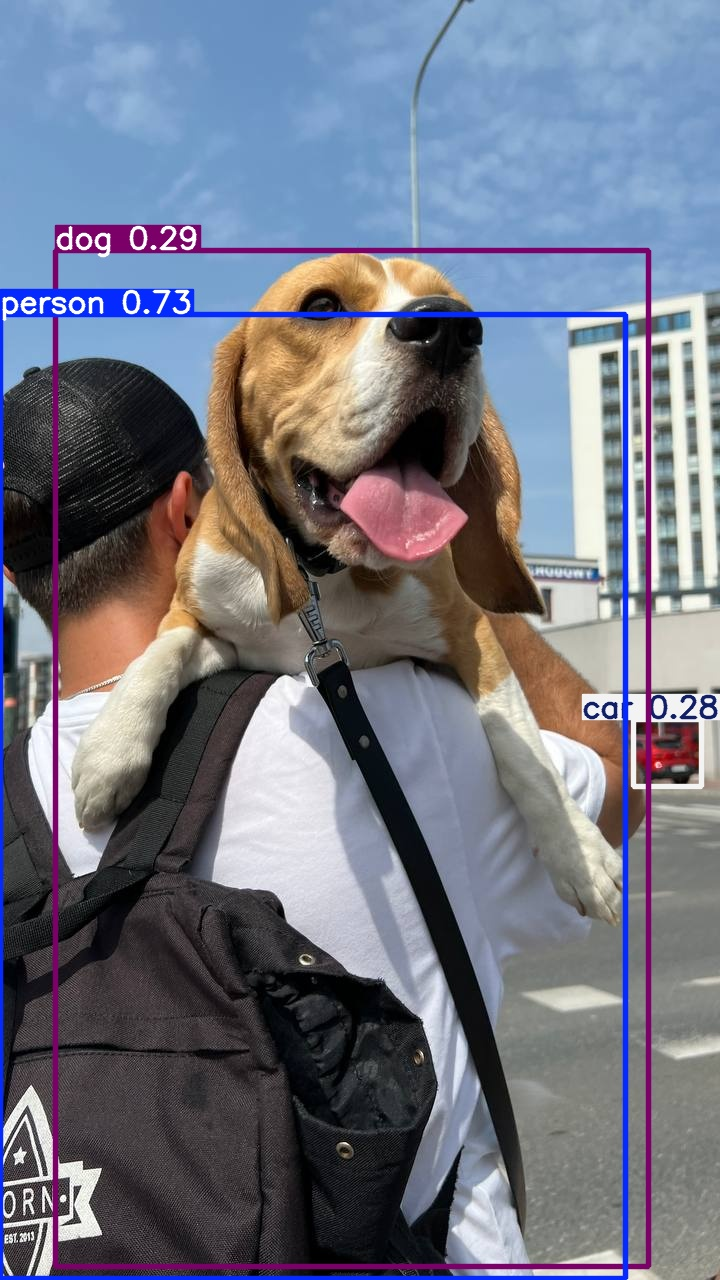

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 82.0ms
Speed: 3.4ms preprocess, 82.0ms inference, 1081.0ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a [supported format](https://roboflow.com/formats), the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format. (Formerly, we used to use `Yolov5`, as the gif shows)

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("model-examples").project("football-players-obj-detection")
dataset = project.version(2).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-obj-detection-2 in yolov8:: 100%|██████████| 756/756 [00:00<00:00, 6135.20it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content


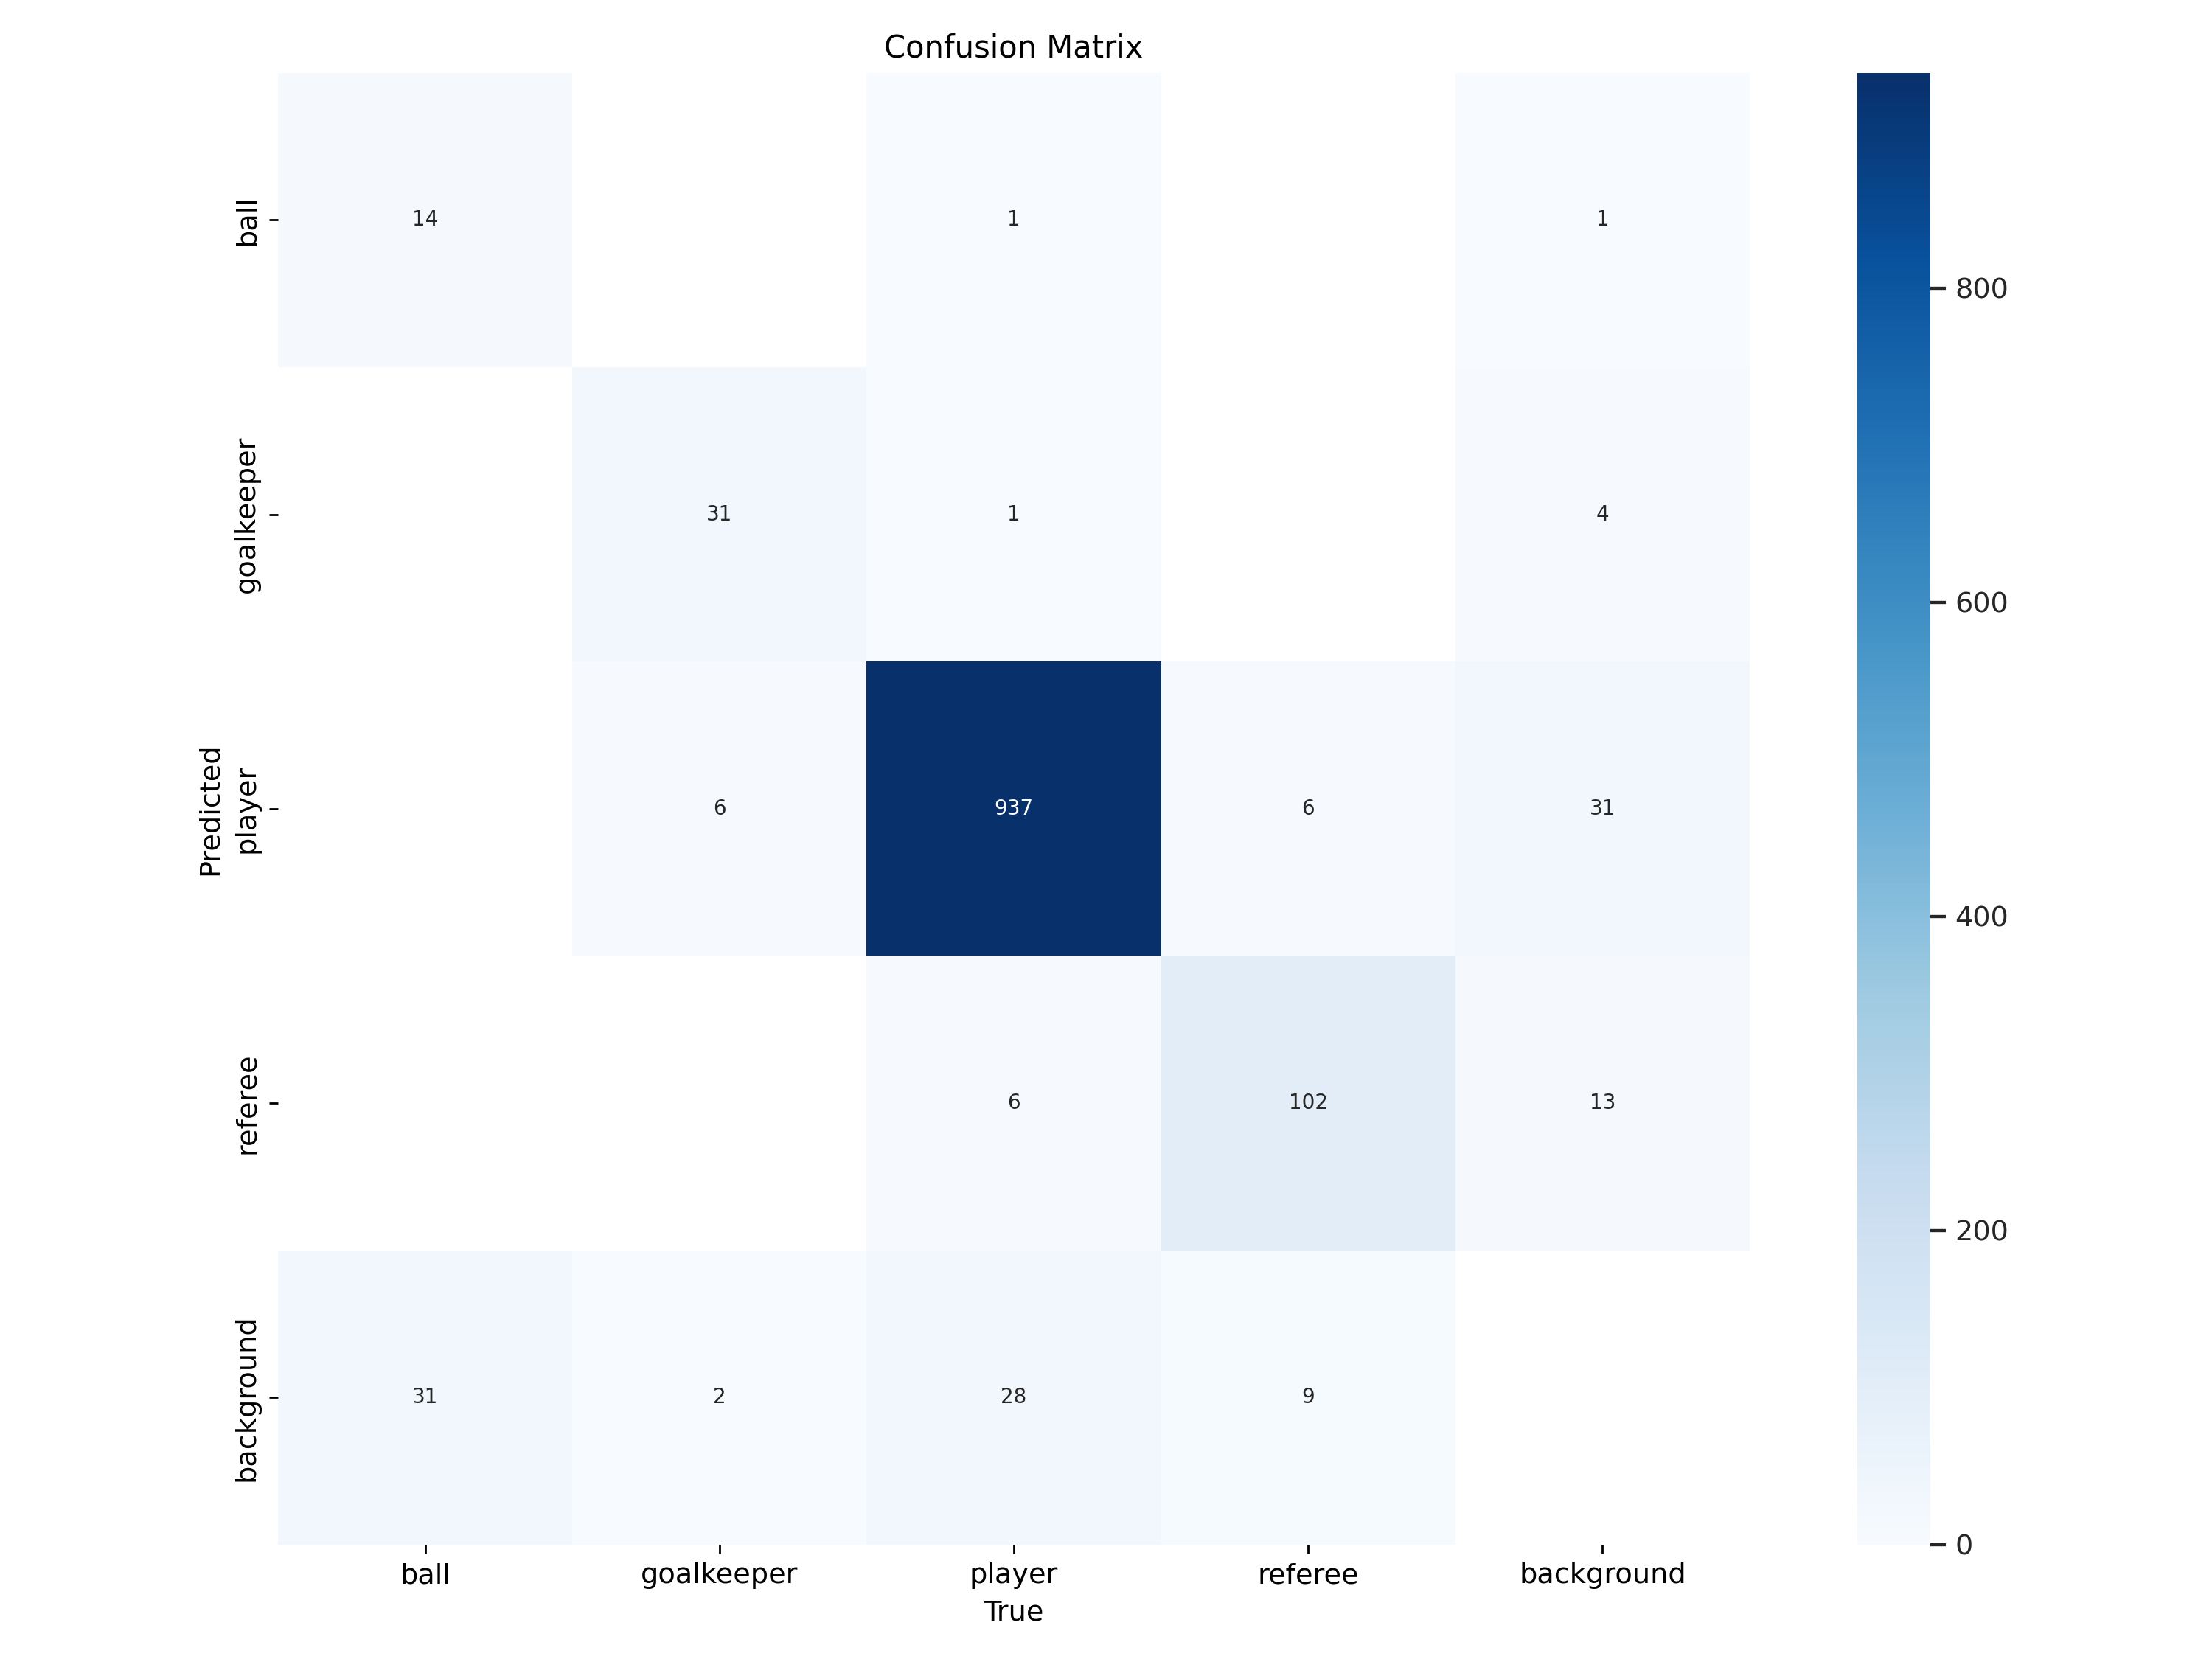

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


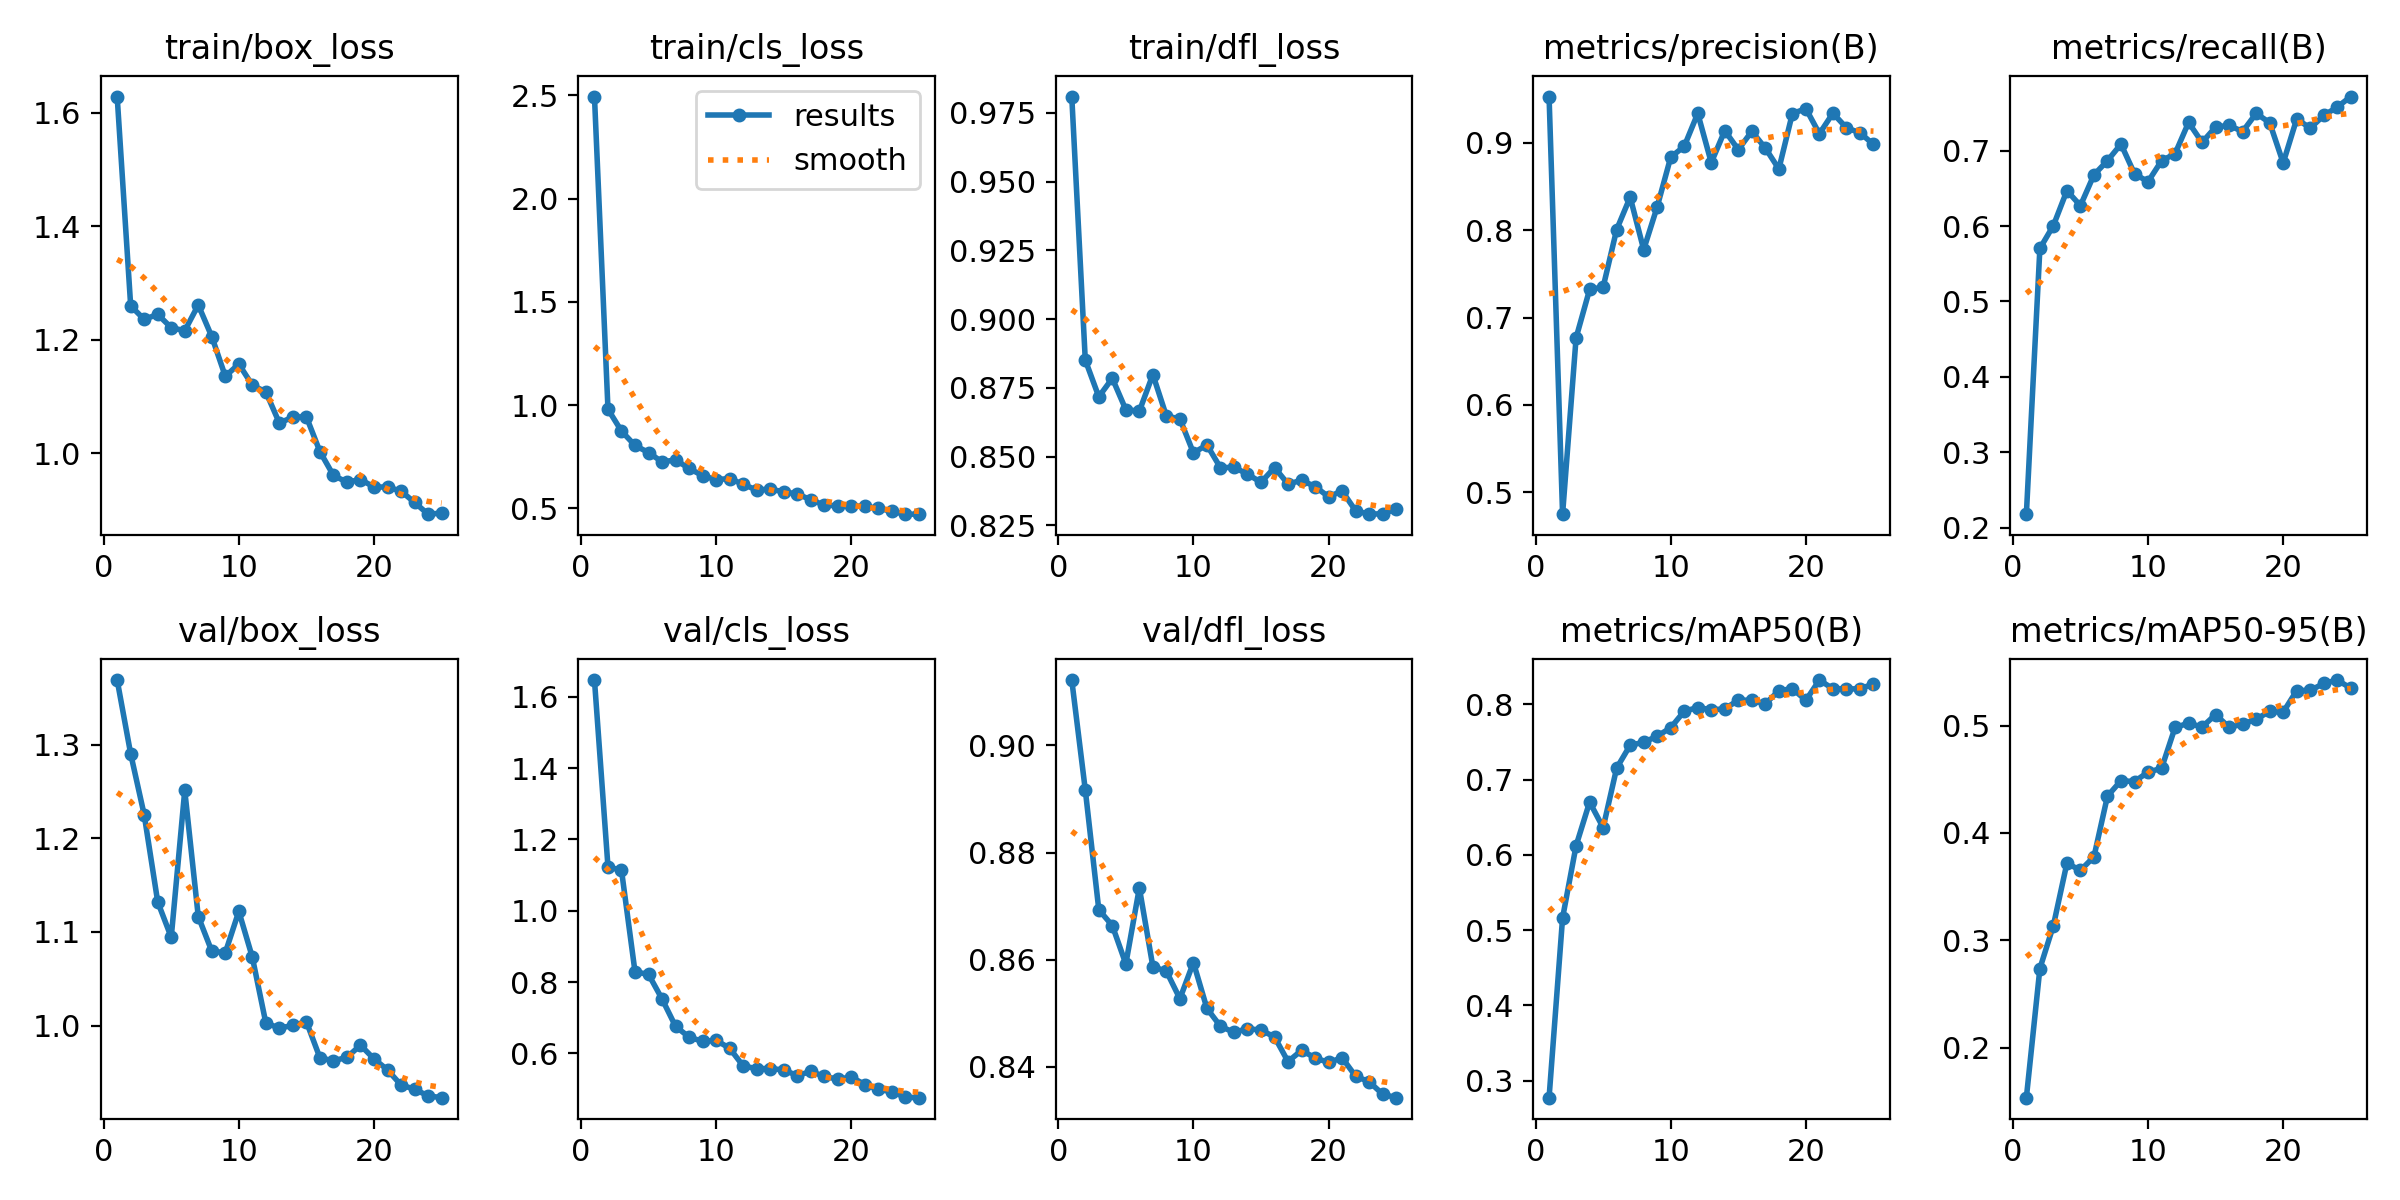

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


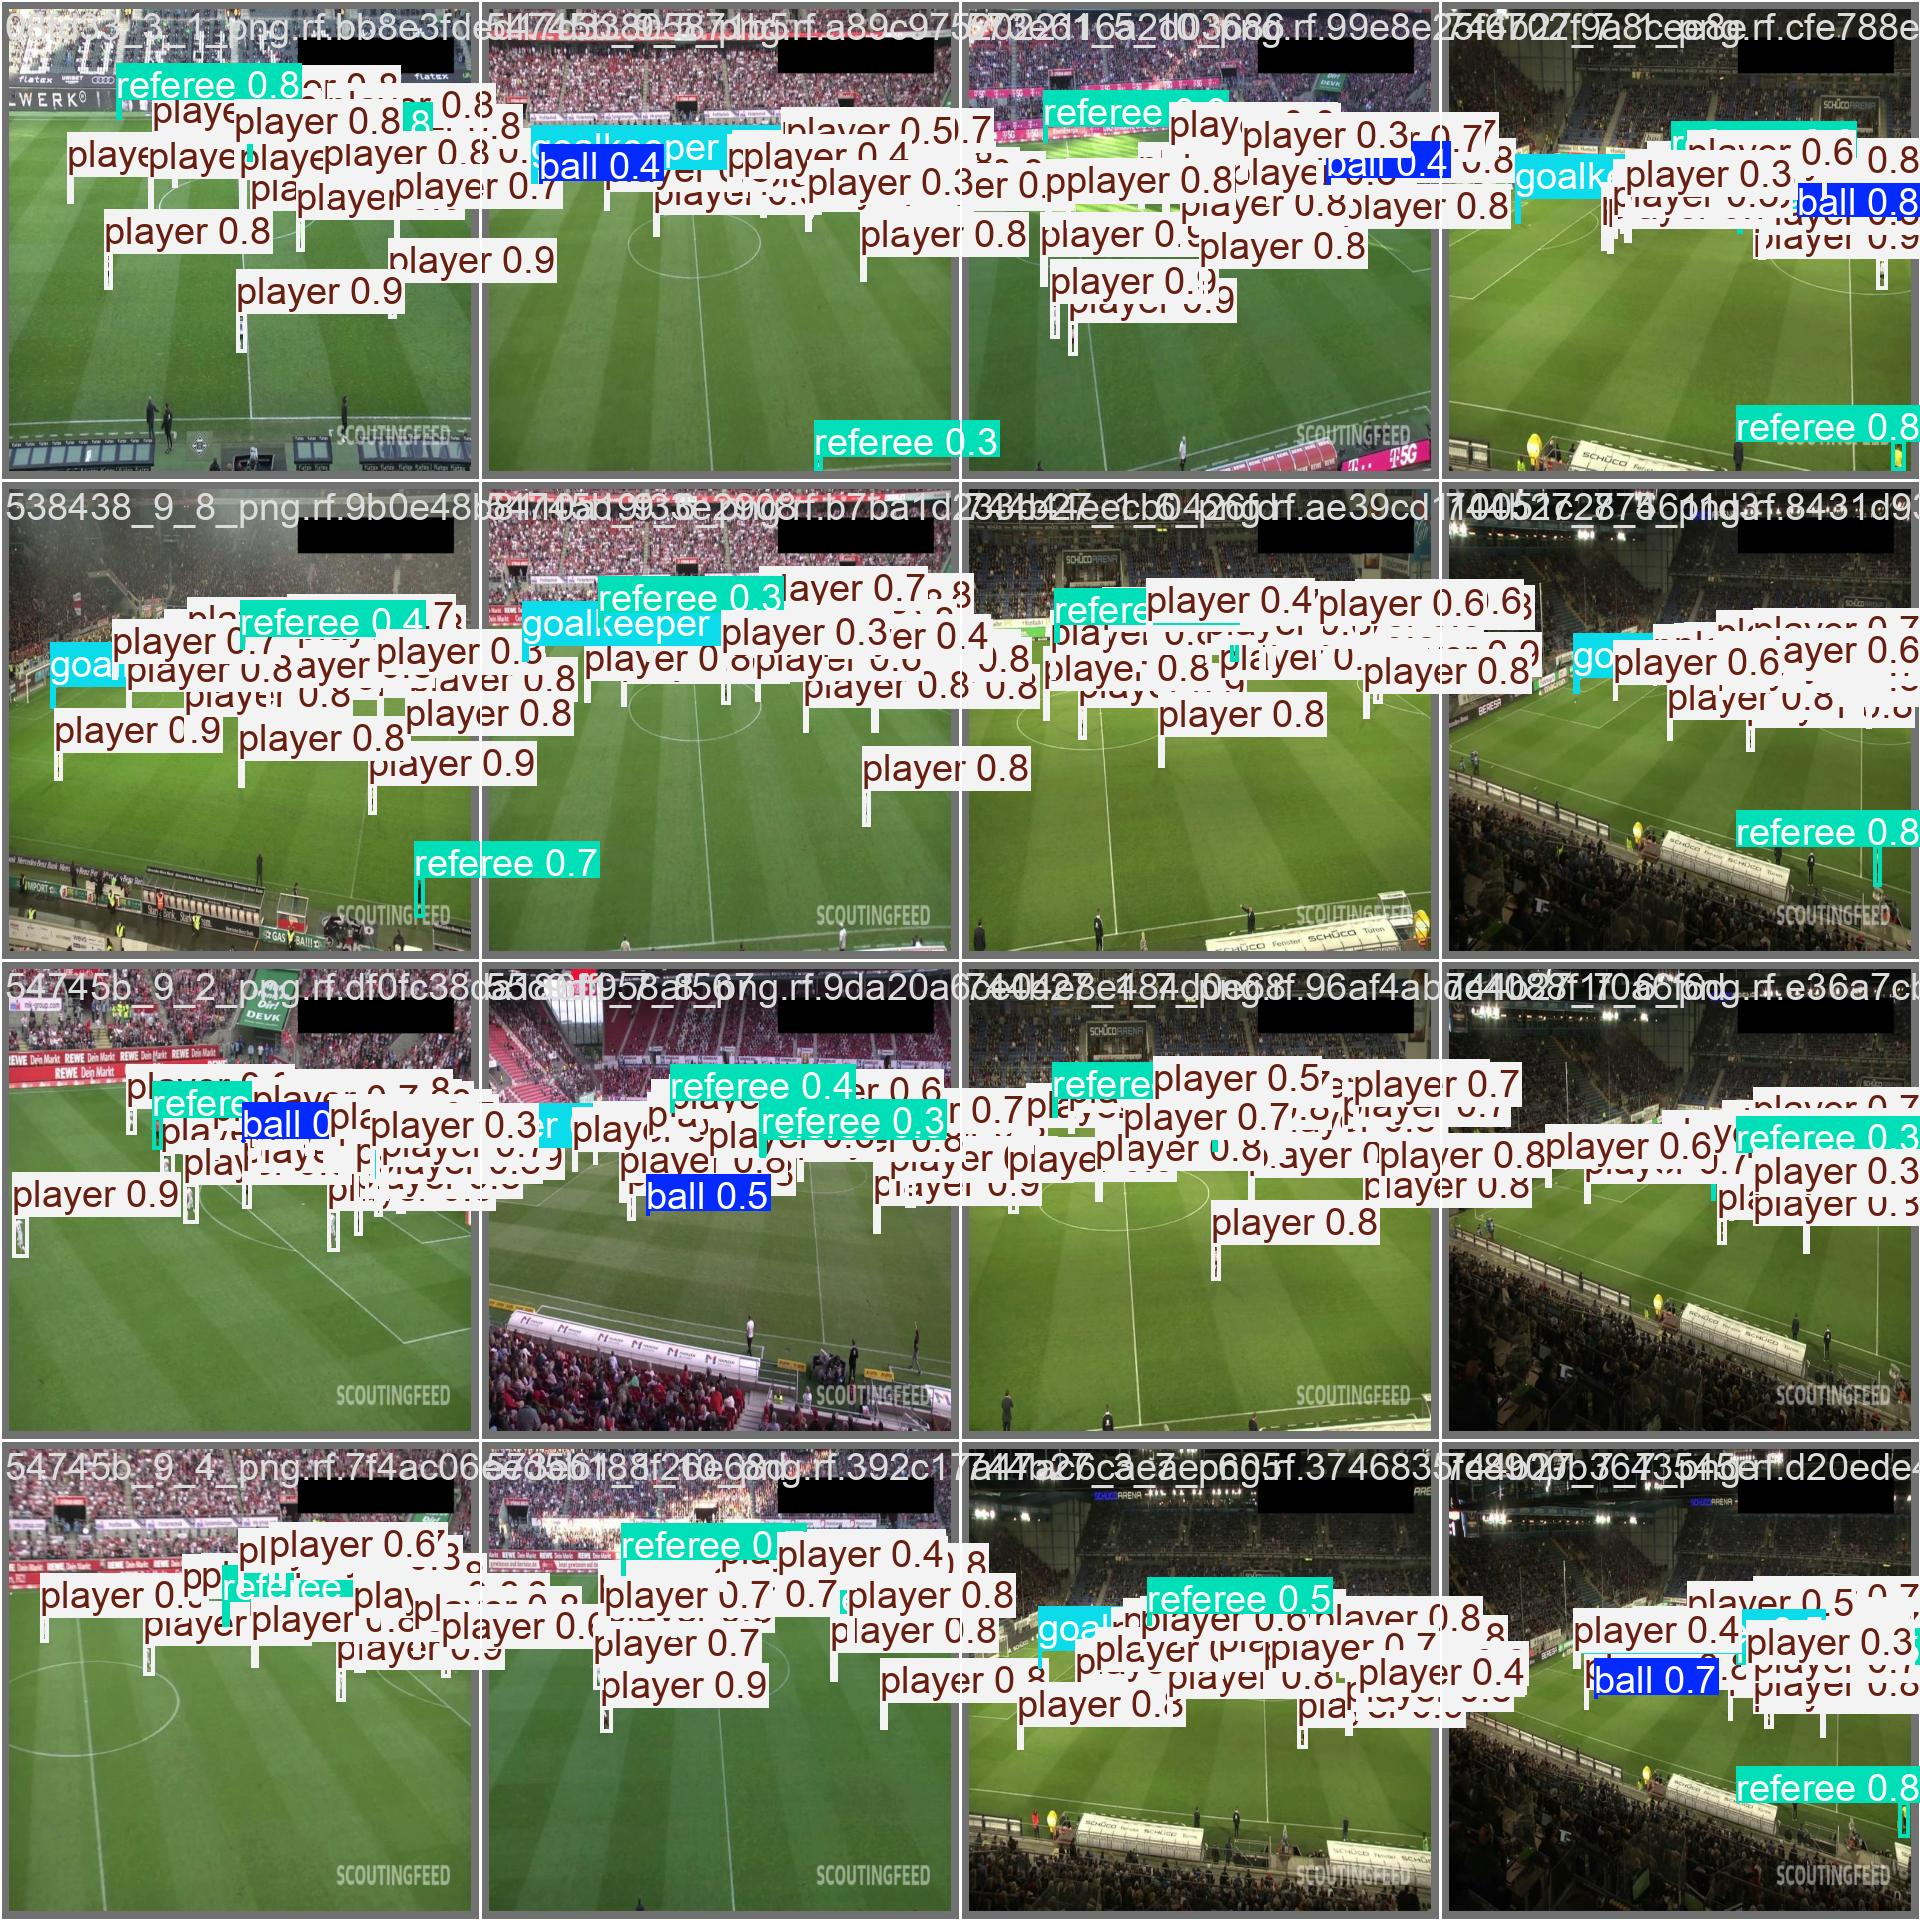

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-obj-detection-2/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.35s/it]
                   all         49       1174      0.928      0.741      0.825      0.547
                  ball         45         45      0.868      0.289      0.415      0.217
            goalkeeper         38         39      0.948      0.846      0.967      0.632
                player         49        973      0.977      0.962      0.988      0.749
               referee         49        117      0.919      0.867      0.931       0.59
Speed: 18.5ms preprocess, 26.6ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_3_6_png.rf.d031da4f257bbf91daf9845051fb9487.jpg: 800x800 1 ball, 19 players, 3 referees, 23.4ms
image 2/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_9_3_png.rf.509869506accd728341d8426de2f937a.jpg: 800x800 20 players, 1 referee, 22.9ms
image 3/25 /content/datasets/football-players-obj-detection-2/test/images/40cd38_7_6_png.rf.57bcce20df01cee3811f2b3576481f41.jpg: 800x800 1 goalkeeper, 20 players, 1 referee, 22.8ms
image 4/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_1_5_png.rf.ec272c23ac9c73ba68d85a630b6d2a22.jpg: 800x800 1 goalkeeper, 23 players, 2 referees, 22.8ms
image 5/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_5_5_png.rf.3fecd509745cf069d

**NOTE:** Let's take a look at few results.

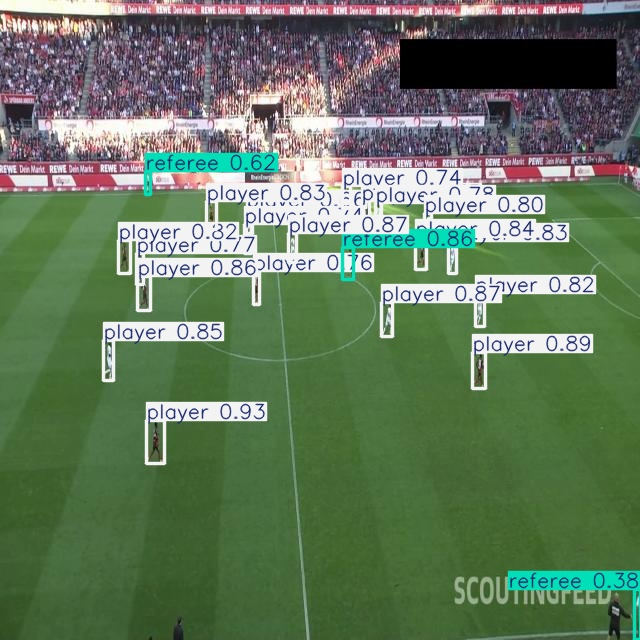

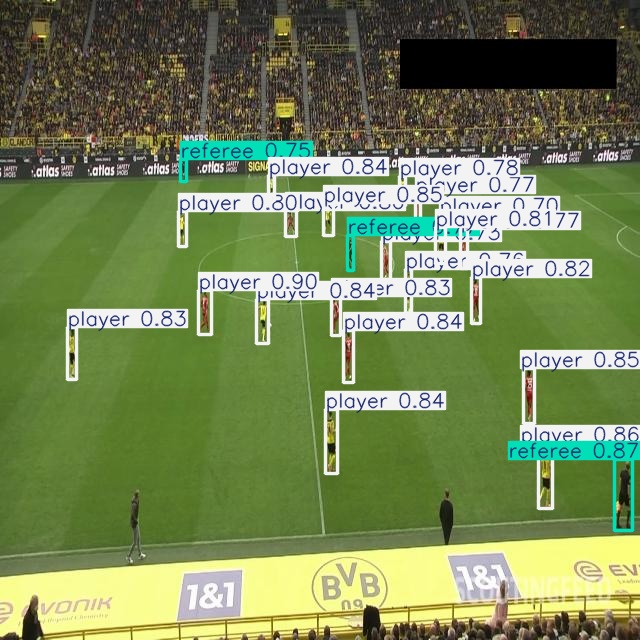

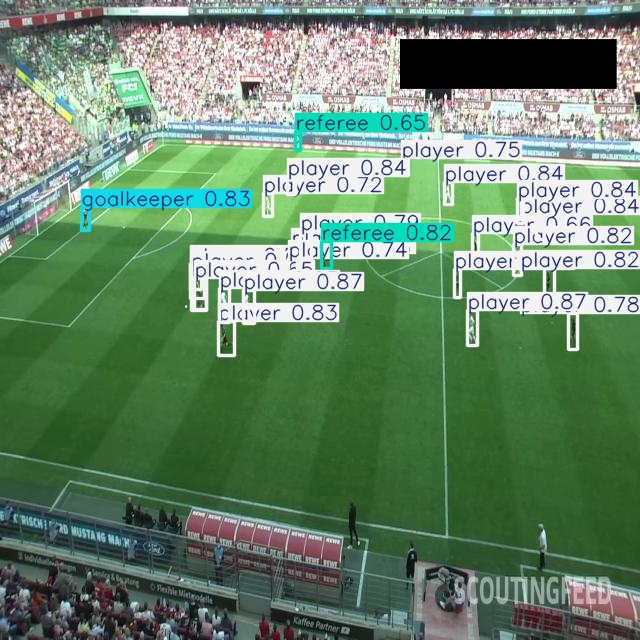

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/model-examples/football-players-obj-detection/2
Share your model with the world at: https://universe.roboflow.com/model-examples/football-players-obj-detection/model/2


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg


{'predictions': [{'x': 1227.0,
   'y': 527.5,
   'width': 50.0,
   'height': 77.0,
   'confidence': 0.9045102000236511,
   'class': 'player',
   'class_id': 2,
   'detection_id': '7bb0de78-c58d-454a-b693-c3f518f94f80',
   'image_path': '/content/datasets/football-players-obj-detection-1/test/images/4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 731.0,
   'y': 584.5,
   'width': 52.0,
   'height': 79.0,
   'confidence': 0.8924632668495178,
   'class': 'player',
   'class_id': 2,
   'detection_id': 'b3ea8a5a-5294-45c9-9221-ba8a6f0884b5',
   'image_path': '/content/datasets/football-players-obj-detection-1/test/images/4b770a_3_9_png.rf.26fd0dc802e143501b91eddef365a94d.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 1397.5,
   'y': 344.5,
   'width': 31.0,
   'height': 55.0,
   'confidence': 0.8912790417671204,
   'class': 'player',
   'class_id': 2,
   'detection_id': '5ef87756-163e-442c-ad88-35f3572750d5',
   '

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.